In [1]:
import time
import re
import pylab as pl
import numpy as np
import pylab as pl

from datetime import datetime, timedelta

import subprocess

import os
import pandas as pd

import concurrent.futures


from joblib import Parallel, delayed
import shutil


from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor

In [2]:

os.system('gcloud compute instances delete --zone=europe-west3-c --quiet $(gcloud compute instances list --format="value(name)")')
os.system('gcloud compute instances delete --zone=asia-south1-c --quiet $(gcloud compute instances list --format="value(name)")')
os.system('gcloud compute instances delete --zone=us-west1-b --quiet $(gcloud compute instances list --format="value(name)")')   


ERROR: (gcloud.compute.instances.delete) argument INSTANCE_NAMES [INSTANCE_NAMES ...]: Must be specified.
Usage: gcloud compute instances delete INSTANCE_NAMES [INSTANCE_NAMES ...] [optional flags]
  optional flags may be  --delete-disks | --help | --keep-disks | --zone

For detailed information on this command and its flags, run:
  gcloud compute instances delete --help
ERROR: (gcloud.compute.instances.delete) argument INSTANCE_NAMES [INSTANCE_NAMES ...]: Must be specified.
Usage: gcloud compute instances delete INSTANCE_NAMES [INSTANCE_NAMES ...] [optional flags]
  optional flags may be  --delete-disks | --help | --keep-disks | --zone

For detailed information on this command and its flags, run:
  gcloud compute instances delete --help
ERROR: (gcloud.compute.instances.delete) argument INSTANCE_NAMES [INSTANCE_NAMES ...]: Must be specified.
Usage: gcloud compute instances delete INSTANCE_NAMES [INSTANCE_NAMES ...] [optional flags]
  optional flags may be  --delete-disks | --help | --k

512

In [3]:

def str2datetime(s):
    parts = s.split('.')
    dt = datetime.strptime(parts[0], "%Y-%m-%d %H:%M:%S")
    return dt.replace(microsecond=int(parts[1]))


def remove_outliers(x, outlierConstant = 1.5):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    resultList = []
    removedList = []
    for y in a.tolist():
        if y >= quartileSet[0] and y <= quartileSet[1]:
            resultList.append(y)
        else:
            removedList.append(y)
    return (resultList, removedList)
def getThroughput(experiment):

    result = subprocess.check_output('cat ../'+experiment+'/nohup_client_*', shell=True)


    result = result.decode("utf-8") 

    lines = result.split('\n')

    commit_pat = re.compile('([^[].*) \[hotstuff info\] ([0-9.]*)$')
#     commit_pat = re.compile('([^[].*) \[hotstuff info\] got*')

    Times = []
    lats = []

    for line in lines:
        m = commit_pat.match(line)
        if m:
            try:

                time_item = float((line.split(' ')[1]).split(':')[0])*3600 + float((line.split(' ')[1]).split(':')[1])*60 + \
                float((line.split(' ')[1]).split(':')[2])
                Times.append(time_item)        

                lats.append(float(m.group(2)))
            except:
                continue


    begin_time = None
    values = []
    interval = 1
    cnt = 0
    Times.sort()
    for timestamp in Times:
        if begin_time is None:
            begin_time = timestamp
            next_begin_time = timestamp +interval

        while timestamp >= next_begin_time:
            begin_time = next_begin_time
            next_begin_time += interval
            values.append(cnt)
            cnt = 0
        cnt += 1
    values.append(cnt)

#     lats, _ = remove_outliers(lats)
#     print(len(values))


    return np.arange(len(values))*interval,np.array(values)/interval, lats

In [4]:
# p = subprocess.Popen(['../../hotstuff-keygen', ' --num', '--n', str(4)],
#                      stdout=subprocess.PIPE, stderr=open(os.devnull, 'w'))

In [5]:
# print([[t[4:] for t in l.decode('ascii').split()] for l in p.stdout])
# # [[t for t in l.decode('ascii').split()] for l in p.stdout.read()]

In [6]:
# os.system('echo 3108 | sudo -S sh job_mini.sh '+ 'test')


In [7]:
# regions= ['us-west-1', 'ap-south-1']
# regions= ['ap-south-1', 'eu-central-1', 'us-west-2']
# regions= ['ap-south-1', 'eu-central-1']
regions= ['ap-south-1']


instance_type = 't2.small'

In [8]:

config_list = [\
               'local_12cls',\
               'global_8cls',\
               'global_12cls',\
#                'local_2cls'\
               ]




Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-30].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.



NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-30  us-west1-b  e2-highmem-2               10.138.0.5   34.82.172.41  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-25].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-49].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-03].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-35].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-08].


NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP     STATUS
resdb-25  us-west1-b  e2-highmem-2               10.138.0.8   34.118.195.119  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP     STATUS
resdb-49  us-west1-b  e2-highmem-2               10.138.0.9   35.227.145.181  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.



NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP     STATUS
resdb-08  us-west1-b  e2-highmem-2               10.138.0.46  35.203.130.156  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-35  us-west1-b  e2-highmem-2               10.138.0.6   34.127.75.102  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-03  us-west1-b  e2-highmem-2               10.138.0.16  35.247.35.204  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-53].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-16].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-58].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-01].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-45].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.



NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-53  us-west1-b  e2-highmem-2               10.138.0.26  34.127.1.196  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-16  us-west1-b  e2-highmem-2               10.138.0.35  34.168.52.101  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-12].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-21].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-18].


NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-58  us-west1-b  e2-highmem-2               10.138.0.61  34.82.144.74  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP      STATUS
resdb-01  us-west1-b  e2-highmem-2               10.138.0.44  104.199.127.102  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-45  us-west1-b  e2-highmem-2               10.138.0.3   34.105.125.38  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-21  us-west1-b  e2-highmem-2               10.138.0.71  34.82.187.173  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-12  us-west1-b  e2-highmem-2               10.138.0.47  35.197.77.126  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

Created [h

NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-18  us-west1-b  e2-highmem-2               10.138.0.21  34.83.184.64  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-43].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-32].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-00].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-38].


NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP     STATUS
resdb-42  us-west1-b  e2-highmem-2               10.138.0.77  35.233.243.130  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-07  us-west1-b  e2-highmem-2               10.138.0.7   35.197.22.86  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-57  us-west1-b  e2-highmem-2               10.138.0.69  34.83.170.170  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-15].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-55].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images

NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-43  us-west1-b  e2-highmem-2               10.138.0.91  34.168.50.199  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-00  us-west1-b  e2-highmem-2               10.138.0.17  34.83.137.112  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP   EXTERNAL_IP   STATUS
resdb-32  us-west1-b  e2-highmem-2               10.138.0.103  35.203.136.6  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP  STATUS
resdb-38  us-west1-b  e2-highmem-2               10.138.0.86  34.83.34.41  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-15  us-west1-b  e2-highmem-2               10.138.0.57  35.233.130.53  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-52].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-29].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-14].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

Created [https://www.googleapis.com/compute/v1

NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-55  us-west1-b  e2-highmem-2               10.138.0.70  34.145.59.249  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP     STATUS
resdb-52  us-west1-b  e2-highmem-2               10.138.0.75  104.196.245.88  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-29  us-west1-b  e2-highmem-2               10.138.0.24  34.83.205.24  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-09].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/

NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-14  us-west1-b  e2-highmem-2               10.138.0.10  34.83.240.90  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-24  us-west1-b  e2-highmem-2               10.138.0.12  34.83.232.95  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-33  us-west1-b  e2-highmem-2               10.138.0.30  34.83.156.169  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP    EXTERNAL_IP   STATUS
resdb-04  us-west1-b  e2-highmem-2               10.138.15.222  35.247.89.56  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-23].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-20].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-02].


NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-37  us-west1-b  e2-highmem-2               10.138.0.50  34.83.94.235  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-09  us-west1-b  e2-highmem-2               10.138.0.34  34.83.16.108  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-23  us-west1-b  e2-highmem-2               10.138.0.51  34.127.86.106  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-26].


NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP     STATUS
resdb-19  us-west1-b  e2-highmem-2               10.138.0.28  35.233.152.177  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-44].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-47].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-10].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-46].


NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP   EXTERNAL_IP    STATUS
resdb-20  us-west1-b  e2-highmem-2               10.138.0.101  35.197.34.238  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP   EXTERNAL_IP    STATUS
resdb-02  us-west1-b  e2-highmem-2               10.138.0.104  34.145.110.79  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP  STATUS
resdb-26  us-west1-b  e2-highmem-2               10.138.0.45  34.127.2.31  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-56].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.



NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-10  us-west1-b  e2-highmem-2               10.138.0.23  34.82.14.136  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-47  us-west1-b  e2-highmem-2               10.138.0.18  34.83.57.157  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-44  us-west1-b  e2-highmem-2               10.138.0.54  34.83.129.102  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP    EXTERNAL_IP    STATUS
resdb-46  us-west1-b  e2-highmem-2               10.138.15.224  34.83.121.136  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-17].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-11].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.



NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-56  us-west1-b  e2-highmem-2               10.138.0.95  34.82.115.32  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP  STATUS
resdb-17  us-west1-b  e2-highmem-2               10.138.0.87  34.127.59.0  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-22].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-28].


NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP     STATUS
resdb-11  us-west1-b  e2-highmem-2               10.138.0.80  34.168.181.245  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-22  us-west1-b  e2-highmem-2               10.138.0.83  35.227.171.93  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-34].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-05].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-27].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

 - The resource 'projects/ubuntu-os-cloud/glob

NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP  STATUS
resdb-28  us-west1-b  e2-highmem-2               10.138.0.41  34.83.3.91   RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-34  us-west1-b  e2-highmem-2               10.138.0.96  35.230.87.212  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-06].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-39].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-40].


NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-27  us-west1-b  e2-highmem-2               10.138.0.66  34.168.83.180  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-05  us-west1-b  e2-highmem-2               10.138.0.33  34.83.141.10  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-50].


NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP     STATUS
resdb-06  us-west1-b  e2-highmem-2               10.138.0.89  35.227.159.119  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP   EXTERNAL_IP     STATUS
resdb-39  us-west1-b  e2-highmem-2               10.138.0.111  35.233.144.146  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.



NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP   EXTERNAL_IP    STATUS
resdb-40  us-west1-b  e2-highmem-2               10.138.0.110  35.203.130.62  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-50  us-west1-b  e2-highmem-2               10.138.0.99  34.127.123.32  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-59].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-31].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.



NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-59  us-west1-b  e2-highmem-2               10.138.0.81  34.83.212.108  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-41].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.



NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP    EXTERNAL_IP    STATUS
resdb-31  us-west1-b  e2-highmem-2               10.138.15.225  34.83.238.147  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-54].


NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP   EXTERNAL_IP    STATUS
resdb-41  us-west1-b  e2-highmem-2               10.138.0.102  34.127.127.48  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-48].


NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP    EXTERNAL_IP     STATUS
resdb-54  us-west1-b  e2-highmem-2               10.138.15.223  35.203.182.141  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.



NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-48  us-west1-b  e2-highmem-2               10.138.0.93  34.168.39.19  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-51].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.



NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP     STATUS
resdb-51  us-west1-b  e2-highmem-2               10.138.0.92  35.227.189.182  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-13].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.



NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-13  us-west1-b  e2-highmem-2               10.138.0.68  34.82.134.145  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-36].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.



NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-36  us-west1-b  e2-highmem-2               10.138.0.76  34.82.88.190  RUNNING
10.138.0.17
10.138.0.44
10.138.0.104
10.138.0.16
10.138.15.222
10.138.0.33
10.138.0.89
10.138.0.7
10.138.0.46
10.138.0.34
10.138.0.23
10.138.0.80
10.138.0.47
10.138.0.68
10.138.0.10
10.138.0.57
10.138.0.35
10.138.0.87
10.138.0.21
10.138.0.28
10.138.0.101
10.138.0.71
10.138.0.83
10.138.0.51
10.138.0.12
10.138.0.8
10.138.0.45
10.138.0.66
10.138.0.41
10.138.0.24
10.138.0.5
10.138.15.225
10.138.0.103
10.138.0.30
10.138.0.96
10.138.0.6
10.138.0.76
10.138.0.50
10.138.0.86
10.138.0.111
10.138.0.110
10.138.0.102
10.138.0.77
10.138.0.91
10.138.0.54
10.138.0.3
10.138.15.224
10.138.0.18
10.138.0.93
10.138.0.9
10.138.0.99
10.138.0.92
10.138.0.75
10.138.0.26
10.138.15.223
10.138.0.70
10.138.0.95
10.138.0.69
10.138.0.61
10.138.0.81
 
10.138.0.17    10.138.0.17
10.138.0.44    10.138.0.44
10.138.0.104    10.138.0.104
10.138.0.16    10.13

[sudo] password for tejas: 

-- Found OpenSSL: /usr/lib/x86_64-linux-gnu/libcrypto.so (found suitable version "3.0.2", minimum required is "1.1.0")  
-- Found OpenSSL: /usr/lib/x86_64-linux-gnu/libcrypto.so (found version "3.0.2")  


CMake Warning:
  No source or binary directory provided.  Both will be assumed to be the
  same as the current working directory, but note that this warning will
  become a fatal error in future CMake releases.




-- Could NOT find Doxygen (missing: DOXYGEN_EXECUTABLE) 
-- Configuring done
-- Generating done
-- Build files have been written to: /home/tejas/work/hotstuffO
[ 21%] Built target libsecp256k1
Consolidate compiler generated dependencies of target hotstuff
Consolidate compiler generated dependencies of target salticidae
[ 37%] Built target hotstuff
[ 62%] Built target salticidae
[ 64%] Built target salticidae_static
[ 67%] Built target salticidae_shared
[ 70%] Built target hotstuff_static
[ 72%] Built target hotstuff_shared
Consolidate compiler generated dependencies of target test_secp256k1
Consolidate compiler generated dependencies of target hotstuff-keygen
Consolidate compiler generated dependencies of target hotstuff-tls-keygen
Consolidate compiler generated dependencies of target hotstuff-app
[ 78%] Built target test_secp256k1
[ 83%] Built target hotstuff-keygen
[ 89%] Built target hotstuff-tls-keygen
[ 94%] Built target hotstuff-app
Consolidate compiler generated dependencies of 

To github.com:tmane002/hotstuffO.git
   ec85f7a..6ebd983  main -> main




Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]


Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]


Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu f

Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe Translation-en [5124 kB]
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/u









apt does not have a stable CLI interface. Use with caution in scripts.



Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main Translation-en [493 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 c-n-f Metadata [17.2 kB]
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [2619 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]
Get:5 http://us-west1.gce.archive.

Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 c-n-f Metadata [265 kB]
Get:23 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/main amd64 Packages [45.7 kB]
Get:24 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/main Translation-en [16.3 kB]
Get:25 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/main amd64 c-n-f Metadata [1420 B]
Get:26 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/restricted amd64 c-n-f Metadata [116 B]
Get:27 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/universe amd64 Packages [25.0 kB]
Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [144 kB]
Get:28 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/universe Translation-en [16.3 kB]
Get:29 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/universe amd64 c-n-f Metadata [880 B]
Get:30 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/multiverse amd64 

Get:17 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1158 kB]
Get:23 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/main amd64 Packages [45.7 kB]
Get:24 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/main Translation-en [16.3 kB]
Get:25 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/main amd64 c-n-f Metadata [1420 B]
Get:26 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/restricted amd64 c-n-f Metadata [116 B]
Get:27 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/universe amd64 Packages [25.0 kB]
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 c-n-f Metadata [17.2 kB]
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [2619 kB]
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 c-n-f Metadata [17.2 kB]
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricte

Get:27 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/universe amd64 Packages [25.0 kB]
Get:28 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/universe Translation-en [16.3 kB]
Get:29 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/universe amd64 c-n-f Metadata [880 B]
Get:30 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/multiverse amd64 c-n-f Metadata [116 B]
Get:19 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 c-n-f Metadata [25.7 kB]
Get:20 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/multiverse amd64 Packages [26.1 kB]
Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 c-n-f Metadata [265 kB]
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 c-n-f Metadata [17.2 kB]
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [2619 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/univers

Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [144 kB]
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main Translation-en [493 kB]
Get:23 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/main amd64 Packages [45.7 kB]
Get:23 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/main amd64 Packages [45.7 kB]
Get:9 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse Translation-en [104 kB]
Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 c-n-f Metadata [9136 B]
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3059 kB]
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main Translation-en [493 kB]
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted Translation-en [365 kB]
Get:16 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted amd64 c-n-f Metadata [552 B]
Get:17 http://us-w

Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 c-n-f Metadata [265 kB]
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted Translation-en [365 kB]
Get:23 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/main amd64 Packages [45.7 kB]
Get:16 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted amd64 c-n-f Metadata [552 B]
Get:24 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/main Translation-en [16.3 kB]
Get:17 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1158 kB]
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted Translation-en [365 kB]
Get:25 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/main amd64 c-n-f Metadata [1420 B]
Get:26 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/restricted amd64 c-n-f Metadata [116 B]
Get:27 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/universe am

Get:35 http://security.ubuntu.com/ubuntu focal-security/restricted Translation-en [349 kB]
Get:36 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 c-n-f Metadata [552 B]
Get:37 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [933 kB]
Get:32 http://security.ubuntu.com/ubuntu focal-security/main Translation-en [410 kB]
Get:33 http://security.ubuntu.com/ubuntu focal-security/main amd64 c-n-f Metadata [13.2 kB]
Get:34 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [2508 kB]
Get:32 http://security.ubuntu.com/ubuntu focal-security/main Translation-en [410 kB]
Get:33 http://security.ubuntu.com/ubuntu focal-security/main amd64 c-n-f Metadata [13.2 kB]
Get:34 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [2508 kB]
Get:31 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2678 kB]
Get:38 http://security.ubuntu.com/ubuntu focal-security/universe Translation-en [197 kB]
Get:39 http

Get:32 http://security.ubuntu.com/ubuntu focal-security/main Translation-en [410 kB]
Get:32 http://security.ubuntu.com/ubuntu focal-security/main Translation-en [410 kB]
Get:33 http://security.ubuntu.com/ubuntu focal-security/main amd64 c-n-f Metadata [13.2 kB]
Get:34 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [2508 kB]
Get:32 http://security.ubuntu.com/ubuntu focal-security/main Translation-en [410 kB]
Get:33 http://security.ubuntu.com/ubuntu focal-security/main amd64 c-n-f Metadata [13.2 kB]
Get:34 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [2508 kB]
Get:33 http://security.ubuntu.com/ubuntu focal-security/main amd64 c-n-f Metadata [13.2 kB]
Get:34 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [2508 kB]
Get:32 http://security.ubuntu.com/ubuntu focal-security/main Translation-en [410 kB]
Get:23 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/main amd64 Packages [45.7 kB]
Get:24 ht

Get:35 http://security.ubuntu.com/ubuntu focal-security/restricted Translation-en [349 kB]
Get:38 http://security.ubuntu.com/ubuntu focal-security/universe Translation-en [197 kB]
Get:39 http://security.ubuntu.com/ubuntu focal-security/universe amd64 c-n-f Metadata [19.2 kB]
Get:40 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 Packages [23.9 kB]
Get:41 http://security.ubuntu.com/ubuntu focal-security/multiverse Translation-en [5796 B]
Get:42 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 c-n-f Metadata [548 B]
Get:35 http://security.ubuntu.com/ubuntu focal-security/restricted Translation-en [349 kB]
Get:36 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 c-n-f Metadata [552 B]
Get:37 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [933 kB]
Get:36 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 c-n-f Metadata [552 B]
Get:37 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Pa

Reading package lists...Building dependency tree...Fetched 29.9 MB in 6s (4762 kB/s)
Reading package lists...
Reading state information...

90 packages can be upgraded. Run 'apt list --upgradable' to see them.

Building dependency tree...Building dependency tree...

Reading package lists...
Building dependency tree...Fetched 29.9 MB in 6s (4616 kB/s)
Reading package lists...

Building dependency tree...
Reading state information...
Building dependency tree...90 packages can be upgraded. Run 'apt list --upgradable' to see them.


Reading state information...
Reading package lists...Building dependency tree...
Building dependency tree...
Building dependency tree...
Reading state information...
Fetched 29.9 MB in 7s (4383 kB/s)
Reading package lists...90 packages can be upgraded. Run 'apt list --upgradable' to see them.



Reading state information...

Reading state information...

90 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists...90 packages can be upgraded. Run 'apt list --upgradable' to see them.

Building dependency tree...Building dependency tree...
Reading package lists...Building dependency tree...
Building dependency tree...Reading package lists...


Reading state information...
Building dependency tree...The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu cpp cpp-9 dp


Reading state information...
Reading package lists...The following NEW packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu build-essential cpp cpp-9
  dpkg-dev fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan5 libatomic1
  libbinutils libc-dev-bin libc6-dev libcc1-0 libcrypt-dev libctf-nobfd0
  libctf0 libdpkg-perl libfakeroot libfile-fcntllock-perl libgcc-9-dev
  libgomp1 libisl22 libitm1 liblsan0 libmpc3 libquadmath0 libstdc++-9-dev

90 packages can be upgraded. Run 'apt list --upgradable' to see them.
  libtsan0 libubsan1 linux-libc-dev make manpages-dev
The following packages will be upgraded:
  libc6

Building dependency tree...Building dependency tree...1 upgraded, 41 newly installed, 0 to remove and 89 not upgraded.

Reading state information...
Reading package lists...
90 packages can be upgraded. Run 'apt list --upgradable' to see them.

Building dependency tree...Building d



Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils-common amd64 2.34-6ubuntu1.8 [208 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libbinutils amd64 2.34-6ubuntu1.8 [475 kB]
Building dependency tree...Get:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libctf-nobfd0 amd64 2.34-6ubuntu1.8 [48.1 kB]

Reading state information...

Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libctf0 amd64 2.34-6ubuntu1.8 [46.7 kB]

Reading state information...
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils-x86-64-linux-gnu amd64 2.34-6ubuntu1.8 [1614 kB]
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  

Get:19 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libitm1 amd64 10.5.0-1ubuntu1~20.04 [26.2 kB]
Get:20 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libatomic1 amd64 10.5.0-1ubuntu1~20.04 [9284 B]
Get:21 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libasan5 amd64 9.4.0-1ubuntu1~20.04.2 [2752 kB]
Reading package lists...90 packages can be upgraded. Run 'apt list --upgradable' to see them.

Need to get 48.2 MB of archives.
After this operation, 203 MB of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc6 amd64 2.31-0ubuntu9.14 [2725 kB]
Building dependency tree...
Reading state information...
Get:22 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 liblsan0 amd64 10.5.0-1ubuntu1~20.04 [835 kB]

Reading state information...
Get:23 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libtsan0 amd64 10.5.0-1

The following NEW packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu build-essential cpp cpp-9
  dpkg-dev fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan5 libatomic1
  libbinutils libc-dev-bin libc6-dev libcc1-0 libcrypt-dev libctf-nobfd0
  libctf0 libdpkg-perl libfakeroot libfile-fcntllock-perl libgcc-9-dev
  libgomp1 libisl22 libitm1 liblsan0 libmpc3 libquadmath0 libstdc++-9-dev
  libtsan0 libubsan1 linux-libc-dev make manpages-dev
The following packages will be upgraded:

  libc6
90 packages can be upgraded. Run 'apt list --upgradable' to see them.
Building dependency tree...
Reading state information...

Reading state information...
Reading package lists...Get:28 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 gcc amd64 4:9.3.0-1ubuntu2 [5208 B]
Get:29 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libstdc++-9-dev amd64 9.4.0-1ubuntu1~20.04

Get:31 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 g++ amd64 4:9.3.0-1ubuntu2 [1604 B]
Get:32 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 make amd64 4.2.1-1.2 [162 kB]
Get:33 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libdpkg-perl all 1.19.7ubuntu3.2 [231 kB]
Get:27 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9 amd64 9.4.0-1ubuntu1~20.04.2 [8276 kB]
Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libcrypt-dev amd64 1:4.4.10-10ubuntu4 [104 kB]
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc6-dev amd64 2.31-0ubuntu9.14 [2519 kB]
Get:34 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 dpkg-dev all 1.19.7ubuntu3.2 [679 kB]
The following NEW packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu build-essential cpp cpp-9
  dpkg-dev fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-per

Building dependency tree...
Reading state information...
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils-common amd64 2.34-6ubuntu1.8 [208 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libbinutils amd64 2.34-6ubuntu1.8 [475 kB]
Need to get 48.2 MB of archives.
After this operation, 203 MB of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc6 amd64 2.31-0ubuntu9.14 [2725 kB]
Get:22 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 liblsan0 amd64 10.5.0-1ubuntu1~20.04 [835 kB]
1 upgraded, 41 newly installed, 0 to remove and 89 not upgraded.
Get:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libctf-nobfd0 amd64 2.34-6ubuntu1.8 [48.1 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libctf0 amd64 2.34-6ubuntu1.8 [46.7 kB]
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu f

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 






Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc-dev-bin amd64 2.31-0ubuntu9.14 [71.8 kB]
Get:9 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 linux-libc-dev amd64 5.4.0-170.188 [1125 kB]
Need to get 48.2 MB of archives.
After this operation, 203 MB of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc6 amd64 2.31-0ubuntu9.14 [2725 kB]

The following NEW packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu build-essential cpp cpp-9
  dpkg-dev fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan5 libatomic1
  libbinutils libc-dev-bin libc6-dev libcc1-0 libcrypt-dev libctf-nobfd0
  libctf0 libdpkg-perl libfakeroot libfile-fcntllock-perl libgcc-9-dev
  libgomp1 libisl22 libitm1 liblsan0 libmpc3 libquadmath0 libstdc++-9-dev
  libtsan0 libubsan1 linux-libc-dev make manpage

Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libcrypt-dev amd64 1:4.4.10-10ubuntu4 [104 kB]
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc6-dev amd64 2.31-0ubuntu9.14 [2519 kB]
Get:27 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9 amd64 9.4.0-1ubuntu1~20.04.2 [8276 kB]

Reading state information...
Get:25 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libquadmath0 amd64 10.5.0-1ubuntu1~20.04 [146 kB]
Get:26 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libgcc-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [2359 kB]
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils-common amd64 2.34-6ubuntu1.8 [208 kB]
The following NEW packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu build-essential cpp cpp-9
  dpkg-dev fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl 

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 




Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc6-dev amd64 2.31-0ubuntu9.14 [2519 kB]
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cpp-9 amd64 9.4.0-1ubuntu1~20.04.2 [7502 kB]
Get:16 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 cpp amd64 4:9.3.0-1ubuntu2 [27.6 kB]
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9-base amd64 9.4.0-1ubuntu1~20.04.2 [18.9 kB]
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libisl22 amd64 0.22.1-1 [592 kB]
Get:27 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9 amd64 9.4.0-1ubuntu1~20.04.2 [8276 kB]
Get:17 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libcc1-0 amd64 10.5.0-1ubuntu1~20.04 [48.8 kB]
Get:22 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 liblsan0 amd64 10.5.0-1ubuntu1~20.04 [835 kB]
Get:18 http://us-west1.gce.archive.ubuntu.com/

Get:27 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9 amd64 9.4.0-1ubuntu1~20.04.2 [8276 kB]
Get:28 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 gcc amd64 4:9.3.0-1ubuntu2 [5208 B]
Unpacking libc6:amd64 (2.31-0ubuntu9.14) over (2.31-0ubuntu9.9) ...
Get:29 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libstdc++-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [1722 kB]
Get:16 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 cpp amd64 4:9.3.0-1ubuntu2 [27.6 kB]
Get:17 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libcc1-0 amd64 10.5.0-1ubuntu1~20.04 [48.8 kB]
Get:18 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libgomp1 amd64 10.5.0-1ubuntu1~20.04 [102 kB]


Reading state information...
Get:19 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libitm1 amd64 10.5.0-1ubuntu1~20.04 [26.2 kB]
Get:20 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
The following NEW packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu build-essential cpp cpp-9
  dpkg-dev fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan5 libatomic1
  libbinutils libc-dev-bin libc6-dev libcc1-0 libcrypt-dev libctf-nobfd0
  libctf0 libdpkg-perl libfakeroot libfile-fcntllock-perl libgcc-9-dev
  libgomp1 libisl22 libitm1 liblsan0 libmpc3 libquadmath0 libstdc++-9-dev
The following NEW packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu build-essential cpp cpp-9
  dpkg-dev fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan5 libatomic1
  libbinutils libc-dev-bin lib

Need to get 48.2 MB of archives.
After this operation, 203 MB of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc6 amd64 2.31-0ubuntu9.14 [2725 kB]
Get:22 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 liblsan0 amd64 10.5.0-1ubuntu1~20.04 [835 kB]
Get:35 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 build-essential amd64 12.8ubuntu1.1 [4664 B]
Get:36 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libfakeroot amd64 1.24-1 [25.7 kB]
Get:37 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 fakeroot amd64 1.24-1 [62.6 kB]
Get:38 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libalgorithm-diff-perl all 1.19.03-2 [46.6 kB]
Get:39 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libalgorithm-diff-xs-perl amd64 0.04-6 [11.3 kB]
Get:40 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libalgorithm-merge-perl

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Get:30 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 g++-9 amd64 9.4.0-1ubuntu1~20.04.2 [8421 kB]
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Get:25 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libquadmath0 amd64 10.5.0-1ubuntu1~20.04 [146 kB]
Get:31 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 g++ amd64 4:9.3.0-1ubuntu2 [1604 B]
Get:32 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 make amd64 4.2.1-1.2 [162 kB]
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libmpc3 amd64 1.1.0-1 [40.8 kB]
Get:26 http://us-west

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to fronten

Get:31 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 g++ amd64 4:9.3.0-1ubuntu2 [1604 B]

Reading state information...
Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libcrypt-dev amd64 1:4.4.10-10ubuntu4 [104 kB]
Get:32 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 make amd64 4.2.1-1.2 [162 kB]
Get:33 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libdpkg-perl all 1.19.7ubuntu3.2 [231 kB]
Get:34 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 dpkg-dev all 1.19.7ubuntu3.2 [679 kB]
Selecting previously unselected package libbinutils:amd64.
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc6-dev amd64 2.31-0ubuntu9.14 [2519 kB]
Preparing to unpack .../01-libbinutils_2.34-6ubuntu1.8_amd64.deb ...
Unpacking libbinutils:amd64 (2.34-6ubuntu1.8) ...
Get:28 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 gcc amd64 4:9.3.0-1ubuntu2 [5208 B]
Get:29

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to fronten

Get:23 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libtsan0 amd64 10.5.0-1ubuntu1~20.04 [2016 kB]
Get:28 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 gcc amd64 4:9.3.0-1ubuntu2 [5208 B]
Get:29 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libstdc++-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [1722 kB]
Get:31 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 g++ amd64 4:9.3.0-1ubuntu2 [1604 B]
Get:32 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 make amd64 4.2.1-1.2 [162 kB]
Get:33 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libdpkg-perl all 1.19.7ubuntu3.2 [231 kB]
Get:16 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 cpp amd64 4:9.3.0-1ubuntu2 [27.6 kB]
Get:17 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libcc1-0 amd64 10.5.0-1ubuntu1~20.04 [48.8 kB]
Get:34 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 

The following packages will be upgraded:
  libc6
Fetched 48.2 MB in 2s (31.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Selecting previously unselected package libctf-nobfd0:amd64.
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Get:27 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9 amd64 9.4.0-1ubuntu1~20.04.2 [8276 kB]
Preparing to unpack .../02-libctf-nobfd0_2.34-6ubuntu1.8_amd64.deb ...
Unpacking libctf-nobfd0:amd64 (2.34-6ubuntu1.8) ...
1 upgraded, 41 newly installed, 0 to remove and 89 not upgraded.
Get:31 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 g++ amd64 4:9.3.0-1ubuntu2 [1604 B]
Get:32 http://us-we

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to fronten

Get:24 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libubsan1 amd64 10.5.0-1ubuntu1~20.04 [785 kB]
Get:24 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libubsan1 amd64 10.5.0-1ubuntu1~20.04 [785 kB]
Get:41 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libfile-fcntllock-perl amd64 0.22-3build4 [33.1 kB]
Get:42 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 manpages-dev all 5.05-1 [2266 kB]
Selecting previously unselected package linux-libc-dev:amd64.
Get:25 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libquadmath0 amd64 10.5.0-1ubuntu1~20.04 [146 kB]
Get:26 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libgcc-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [2359 kB]
Get:25 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libquadmath0 amd64 10.5.0-1ubuntu1~20.04 [146 kB]
Get:26 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd6

Get:35 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 build-essential amd64 12.8ubuntu1.1 [4664 B]
Get:36 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libfakeroot amd64 1.24-1 [25.7 kB]
Get:37 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 fakeroot amd64 1.24-1 [62.6 kB]
Get:38 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libalgorithm-diff-perl all 1.19.03-2 [46.6 kB]
Get:39 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libalgorithm-diff-xs-perl amd64 0.04-6 [11.3 kB]
Get:40 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libalgorithm-merge-perl all 0.08-3 [12.0 kB]
Selecting previously unselected package binutils.
Preparing to unpack .../05-binutils_2.34-6ubuntu1.8_amd64.deb ...
Unpacking binutils (2.34-6ubuntu1.8) ...
(Reading database ... 62221 files and directories currently installed.)
Preparing to unpack .../libc6_2.31-0ubuntu9.14_amd64.deb ...
Unpacking libc6:amd64 (2.31-0

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to fronten

Setting up libc6:amd64 (2.31-0ubuntu9.14) ...
Get:25 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libquadmath0 amd64 10.5.0-1ubuntu1~20.04 [146 kB]
Get:26 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libgcc-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [2359 kB]
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9-base amd64 9.4.0-1ubuntu1~20.04.2 [18.9 kB]
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libisl22 amd64 0.22.1-1 [592 kB]
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libmpc3 amd64 1.1.0-1 [40.8 kB]
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cpp-9 amd64 9.4.0-1ubuntu1~20.04.2 [7502 kB]
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Get:41 http://us-west1.gce.arc

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
dpkg-preconfigure: unable to re-o

Preparing to unpack .../08-libcrypt-dev_1%3a4.4.10-10ubuntu4_amd64.deb ...
Unpacking libc6:amd64 (2.31-0ubuntu9.14) over (2.31-0ubuntu9.9) ...
Unpacking libcrypt-dev:amd64 (1:4.4.10-10ubuntu4) ...
Get:30 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 g++-9 amd64 9.4.0-1ubuntu1~20.04.2 [8421 kB]
Fetched 48.2 MB in 1s (35.4 MB/s)
Get:22 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 liblsan0 amd64 10.5.0-1ubuntu1~20.04 [835 kB]
Fetched 48.2 MB in 2s (24.1 MB/s)
Selecting previously unselected package binutils.
Get:23 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libtsan0 amd64 10.5.0-1ubuntu1~20.04 [2016 kB]
Preparing to unpack .../05-binutils_2.34-6ubuntu1.8_amd64.deb ...
Unpacking binutils (2.34-6ubuntu1.8) ...
Selecting previously unselected package libc6-dev:amd64.
Get:24 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libubsan1 amd64 10.5.0-1ubuntu1~20.04 [785 kB]
Preparing to unpack .../

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to fronten

Preparing to unpack .../01-libbinutils_2.34-6ubuntu1.8_amd64.deb ...
Unpacking libbinutils:amd64 (2.34-6ubuntu1.8) ...
Get:28 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 gcc amd64 4:9.3.0-1ubuntu2 [5208 B]
Get:29 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libstdc++-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [1722 kB]
Fetched 48.2 MB in 1s (36.4 MB/s)
Selecting previously unselected package libbinutils:amd64.
Preparing to unpack .../01-libbinutils_2.34-6ubuntu1.8_amd64.deb ...
Get:30 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 g++-9 amd64 9.4.0-1ubuntu1~20.04.2 [8421 kB]
Unpacking libbinutils:amd64 (2.34-6ubuntu1.8) ...
Selecting previously unselected package gcc-9-base:amd64.
Preparing to unpack .../10-gcc-9-base_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
(Reading

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Preparing to unpack .../libc6_2.31-0ubuntu9.14_amd64.deb ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Unpacking libc6:amd64 (2.31-0ubuntu9.14) over (2.31-0ubuntu9.9) ...
Selecting previously unselected package libctf-nobfd0:amd64.
Selecting previously unselected package libctf-nobfd0:amd64.
Preparing to unpack .../02-libctf-nobfd0_2.34-6ubuntu1.8_amd64.deb ...
Unpacking libctf-nobfd0:amd64 (2.34-6ubuntu1.8) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Preparing to unpack .../02-libctf-nobfd0_2.34-6ubuntu1.8_amd64.deb ...
Selecting previously unselected package binutils-common:amd64.
Unpacking libctf-nobfd0:amd64 (2.34-6ubuntu1.8) ...
Selecting previously

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 



Unpacking libc6:amd64 (2.31-0ubuntu9.14) over (2.31-0ubuntu9.9) ...
Preparing to unpack .../01-libbinutils_2.34-6ubuntu1.8_amd64.deb ...
Unpacking libbinutils:amd64 (2.34-6ubuntu1.8) ...
Selecting previously unselected package binutils-x86-64-linux-gnu.
Preparing to unpack .../04-binutils-x86-64-linux-gnu_2.34-6ubuntu1.8_amd64.deb ...
Unpacking binutils-x86-64-linux-gnu (2.34-6ubuntu1.8) ...
Selecting previously unselected package libc-dev-bin.
Preparing to unpack .../06-libc-dev-bin_2.31-0ubuntu9.14_amd64.deb ...
(Reading database ... 62221 files and directories currently installed.)
Preparing to unpack .../00-binutils-common_2.34-6ubuntu1.8_amd64.deb ...
Unpacking binutils-common:amd64 (2.34-6ubuntu1.8) ...
Unpacking libc-dev-bin (2.31-0ubuntu9.14) ...
Selecting previously unselected package linux-libc-dev:amd64.
Fetched 48.2 MB in 1s (61.7 MB/s)
(Reading database ... 62221 files and directories currently installed.)
Preparing to unpack .../00-binutils-common_2.34-6ubuntu1.8_amd64.d

Setting up libc6:amd64 (2.31-0ubuntu9.14) ...
(Reading database ... 62221 files and directories currently installed.)
Preparing to unpack .../00-binutils-common_2.34-6ubuntu1.8_amd64.deb ...
Unpacking binutils-common:amd64 (2.34-6ubuntu1.8) ...
Selecting previously unselected package binutils-common:amd64.
(Reading database ... 62221 files and directories currently installed.)
Preparing to unpack .../00-binutils-common_2.34-6ubuntu1.8_amd64.deb ...
Unpacking binutils-common:amd64 (2.34-6ubuntu1.8) ...
Selecting previously unselected package libbinutils:amd64.
Preparing to unpack .../01-libbinutils_2.34-6ubuntu1.8_amd64.deb ...
Unpacking libbinutils:amd64 (2.34-6ubuntu1.8) ...
Selecting previously unselected package binutils.
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Preparing to unpack .../05-binutils_2.34-6ubuntu1.8_amd

Preparing to unpack .../10-gcc-9-base_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Selecting previously unselected package libctf0:amd64.
Unpacking gcc-9-base:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../03-libctf0_2.34-6ubuntu1.8_amd64.deb ...
Unpacking libctf0:amd64 (2.34-6ubuntu1.8) ...
Selecting previously unselected package libbinutils:amd64.
Preparing to unpack .../01-libbinutils_2.34-6ubuntu1.8_amd64.deb ...
Selecting previously unselected package libatomic1:amd64.
Selecting previously unselected package binutils-common:amd64.
Unpacking libbinutils:amd64 (2.34-6ubuntu1.8) ...
Preparing to unpack .../18-libatomic1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libatomic1:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libisl22:amd64.
Selecting previously unselected package binutils-common:amd64.
Preparing to unpack .../11-libisl22_0.22.1-1_amd64.deb ...
Selecting previously unselected package binutils-x86-64-linux-gnu.
Selecting previously unselecte

Unpacking libc-dev-bin (2.31-0ubuntu9.14) ...
Selecting previously unselected package binutils-x86-64-linux-gnu.
Preparing to unpack .../04-binutils-x86-64-linux-gnu_2.34-6ubuntu1.8_amd64.deb ...
Unpacking binutils-x86-64-linux-gnu (2.34-6ubuntu1.8) ...
Selecting previously unselected package gcc-9-base:amd64.
Preparing to unpack .../10-gcc-9-base_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking gcc-9-base:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package libisl22:amd64.
Preparing to unpack .../11-libisl22_0.22.1-1_amd64.deb ...
Unpacking libisl22:amd64 (0.22.1-1) ...
Selecting previously unselected package linux-libc-dev:amd64.
Selecting previously unselected package libctf-nobfd0:amd64.
Preparing to unpack .../07-linux-libc-dev_5.4.0-170.188_amd64.deb ...
Unpacking linux-libc-dev:amd64 (5.4.0-170.188) ...
Preparing to unpack .../02-libctf-nobfd0_2.34-6ubuntu1.8_amd64.deb ...
Unpacking libctf-nobfd0:amd64 (2.34-6ubuntu1.8) ...
debconf: unable to initialize front

Selecting previously unselected package linux-libc-dev:amd64.
Unpacking libisl22:amd64 (0.22.1-1) ...
Selecting previously unselected package gcc-9-base:amd64.
Preparing to unpack .../12-libmpc3_1.1.0-1_amd64.deb ...
Unpacking libmpc3:amd64 (1.1.0-1) ...
Preparing to unpack .../07-linux-libc-dev_5.4.0-170.188_amd64.deb ...
Unpacking linux-libc-dev:amd64 (5.4.0-170.188) ...
Preparing to unpack .../10-gcc-9-base_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking gcc-9-base:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package linux-libc-dev:amd64.
Preparing to unpack .../07-linux-libc-dev_5.4.0-170.188_amd64.deb ...
Unpacking linux-libc-dev:amd64 (5.4.0-170.188) ...
Selecting previously unselected package linux-libc-dev:amd64.
Selecting previously unselected package libmpc3:amd64.
Preparing to unpack .../07-linux-libc-dev_5.4.0-170.188_amd64.deb ...
Unpacking linux-libc-dev:amd64 (5.4.0-170.188) ...
Selecting previously unselected package libc6-dev:amd64.
Preparing to un

Preparing to unpack .../12-libmpc3_1.1.0-1_amd64.deb ...
Unpacking linux-libc-dev:amd64 (5.4.0-170.188) ...
Preparing to unpack .../11-libisl22_0.22.1-1_amd64.deb ...
Preparing to unpack .../23-libquadmath0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libmpc3:amd64 (1.1.0-1) ...
Unpacking libisl22:amd64 (0.22.1-1) ...
Selecting previously unselected package libgomp1:amd64.
Unpacking libquadmath0:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../16-libgomp1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Selecting previously unselected package libatomic1:amd64.
Unpacking libgomp1:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../18-libatomic1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libatomic1:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libmpc3:amd64.
Selecting previously unselected package cpp-9.
Preparing to unpack .../12-libmpc3_1.1.0-1_amd64.deb ...
Preparing to unpack .../13-cpp-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking libmpc3:amd64 (

Preparing to unpack .../13-cpp-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking cpp-9 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package cpp-9.
Selecting previously unselected package liblsan0:amd64.
Preparing to unpack .../20-liblsan0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Preparing to unpack .../13-cpp-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Selecting previously unselected package libatomic1:amd64.
Unpacking cpp-9 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../18-libatomic1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking liblsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libgomp1:amd64.
Selecting previously unselected package libitm1:amd64.
Selecting previously unselected package cpp.
Preparing to unpack .../16-libgomp1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libgomp1:amd64 (10.5.0-1ubuntu1~20.04) ...
Unpacking libatomic1:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../17-libitm1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unp

Preparing to unpack .../21-libtsan0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Preparing to unpack .../24-libgcc-9-dev_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Preparing to unpack .../21-libtsan0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Selecting previously unselected package libcc1-0:amd64.
Unpacking libitm1:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../20-liblsan0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libtsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Unpacking libgcc-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Unpacking libtsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libasan5:amd64.
Preparing to unpack .../19-libasan5_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking libasan5:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package libatomic1:amd64.
Selecting previously unselected package libgomp1:amd64.
Preparing to unpack .../18-libatomic1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libatomic1:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting

Unpacking libitm1:amd64 (10.5.0-1ubuntu1~20.04) ...
Unpacking libquadmath0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libtsan0:amd64.
Preparing to unpack .../26-gcc_4%3a9.3.0-1ubuntu2_amd64.deb ...
Preparing to unpack .../21-libtsan0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libtsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Unpacking gcc (4:9.3.0-1ubuntu2) ...
Selecting previously unselected package g++-9.
Preparing to unpack .../28-g++-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Selecting previously unselected package libatomic1:amd64.
Unpacking g++-9 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../18-libatomic1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libatomic1:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libquadmath0:amd64.
Selecting previously unselected package libatomic1:amd64.
Selecting previously unselected package libasan5:amd64.
Preparing to unpack .../18-libatomic1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Preparing to

Selecting previously unselected package libgcc-9-dev:amd64.
Selecting previously unselected package libubsan1:amd64.
Preparing to unpack .../22-libubsan1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Selecting previously unselected package libatomic1:amd64.
Unpacking libubsan1:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../24-libgcc-9-dev_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking libgcc-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package libtsan0:amd64.
Preparing to unpack .../21-libtsan0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Preparing to unpack .../18-libatomic1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libatomic1:amd64 (10.5.0-1ubuntu1~20.04) ...
Unpacking libtsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libtsan0:amd64.
Preparing to unpack .../21-libtsan0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libtsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libasan5:amd64.
Preparing to unp

Unpacking libgcc-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Unpacking gcc-9 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../23-libquadmath0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libquadmath0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package dpkg-dev.
Preparing to unpack .../32-dpkg-dev_1.19.7ubuntu3.2_all.deb ...
Unpacking dpkg-dev (1.19.7ubuntu3.2) ...
Selecting previously unselected package libquadmath0:amd64.
Preparing to unpack .../23-libquadmath0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Selecting previously unselected package fakeroot.
Preparing to unpack .../35-fakeroot_1.24-1_amd64.deb ...
Unpacking fakeroot (1.24-1) ...
Unpacking libquadmath0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package g++-9.
Preparing to unpack .../28-g++-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking g++-9 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package gcc.
Preparing to unpack .../26-gcc_4%3a9.3.0-1ubuntu2_amd64.deb ...
Select

Selecting previously unselected package libstdc++-9-dev:amd64.
Selecting previously unselected package gcc.
Selecting previously unselected package libalgorithm-merge-perl.
Preparing to unpack .../27-libstdc++-9-dev_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Preparing to unpack .../26-gcc_4%3a9.3.0-1ubuntu2_amd64.deb ...
Preparing to unpack .../38-libalgorithm-merge-perl_0.08-3_all.deb ...
Unpacking libstdc++-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Unpacking libalgorithm-merge-perl (0.08-3) ...
Unpacking gcc (4:9.3.0-1ubuntu2) ...
update-alternatives: using /usr/bin/fakeroot-sysv to provide /usr/bin/fakeroot (fakeroot) in auto mode
Setting up make (4.2.1-1.2) ...
Setting up libquadmath0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libfile-fcntllock-perl.
Preparing to unpack .../39-libfile-fcntllock-perl_0.22-3build4_amd64.deb ...
Setting up libmpc3:amd64 (1.1.0-1) ...
Unpacking libfile-fcntllock-perl (0.22-3build4) ...
Selecting previously unselected package lib

Setting up gcc (4:9.3.0-1ubuntu2) ...
Unpacking libstdc++-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../29-g++_4%3a9.3.0-1ubuntu2_amd64.deb ...
Unpacking g++ (4:9.3.0-1ubuntu2) ...
Setting up linux-libc-dev:amd64 (5.4.0-170.188) ...
Setting up libctf-nobfd0:amd64 (2.34-6ubuntu1.8) ...Setting up g++-9 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package g++-9.

Selecting previously unselected package make.Setting up g++ (4:9.3.0-1ubuntu2) ...
Setting up libgomp1:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../28-g++-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking g++-9 (9.4.0-1ubuntu1~20.04.2) ...

Selecting previously unselected package dpkg-dev.
Preparing to unpack .../30-make_4.2.1-1.2_amd64.deb ...
Preparing to unpack .../32-dpkg-dev_1.19.7ubuntu3.2_all.deb ...
Unpacking make (4.2.1-1.2) ...
Setting up libfakeroot:amd64 (1.24-1) ...
Setting up fakeroot (1.24-1) ...
Unpacking dpkg-dev (1.19.7ubuntu3.2) ...
Selecting previously unselected 

Unpacking build-essential (12.8ubuntu1.1) ...
Preparing to unpack .../38-libalgorithm-merge-perl_0.08-3_all.deb ...
Unpacking libalgorithm-merge-perl (0.08-3) ...
Selecting previously unselected package build-essential.
Preparing to unpack .../33-build-essential_12.8ubuntu1.1_amd64.deb ...
Preparing to unpack .../32-dpkg-dev_1.19.7ubuntu3.2_all.deb ...
Unpacking dpkg-dev (1.19.7ubuntu3.2) ...
Unpacking build-essential (12.8ubuntu1.1) ...
Selecting previously unselected package libfakeroot:amd64.
Preparing to unpack .../34-libfakeroot_1.24-1_amd64.deb ...
Unpacking build-essential (12.8ubuntu1.1) ...
Unpacking libfakeroot:amd64 (1.24-1) ...
Selecting previously unselected package g++-9.
Selecting previously unselected package libfile-fcntllock-perl.
Selecting previously unselected package libfakeroot:amd64.
Preparing to unpack .../39-libfile-fcntllock-perl_0.22-3build4_amd64.deb ...
Preparing to unpack .../34-libfakeroot_1.24-1_amd64.deb ...
Preparing to unpack .../28-g++-9_9.4.0-1ubunt

Selecting previously unselected package manpages-dev.
Preparing to unpack .../31-libdpkg-perl_1.19.7ubuntu3.2_all.deb ...
Unpacking libdpkg-perl (1.19.7ubuntu3.2) ...
update-alternatives: using /usr/bin/fakeroot-sysv to provide /usr/bin/fakeroot (fakeroot) in auto mode
Selecting previously unselected package libfile-fcntllock-perl.
Selecting previously unselected package libdpkg-perl.
Preparing to unpack .../39-libfile-fcntllock-perl_0.22-3build4_amd64.deb ...
Preparing to unpack .../40-manpages-dev_5.05-1_all.deb ...
Selecting previously unselected package libalgorithm-merge-perl.
Preparing to unpack .../38-libalgorithm-merge-perl_0.08-3_all.deb ...
Unpacking manpages-dev (5.05-1) ...
Setting up make (4.2.1-1.2) ...
Preparing to unpack .../31-libdpkg-perl_1.19.7ubuntu3.2_all.deb ...
Unpacking libfile-fcntllock-perl (0.22-3build4) ...
Unpacking libalgorithm-merge-perl (0.08-3) ...
Unpacking libdpkg-perl (1.19.7ubuntu3.2) ...
Setting up libquadmath0:amd64 (10.5.0-1ubuntu1~20.04) ...
Set

Setting up binutils-x86-64-linux-gnu (2.34-6ubuntu1.8) ...
Unpacking libdpkg-perl (1.19.7ubuntu3.2) ...
Setting up libalgorithm-diff-xs-perl (0.04-6) ...
Unpacking libalgorithm-merge-perl (0.08-3) ...
Unpacking libalgorithm-diff-perl (1.19.03-2) ...
Setting up manpages-dev (5.05-1) ...
Selecting previously unselected package dpkg-dev.
Setting up libcc1-0:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up binutils (2.34-6ubuntu1.8) ...
Selecting previously unselected package g++.
Preparing to unpack .../29-g++_4%3a9.3.0-1ubuntu2_amd64.deb ...
Setting up libfile-fcntllock-perl (0.22-3build4) ...Setting up g++ (4:9.3.0-1ubuntu2) ...

Setting up libalgorithm-diff-perl (1.19.03-2) ...
Setting up libfile-fcntllock-perl (0.22-3build4) ...
Setting up binutils-common:amd64 (2.34-6ubuntu1.8) ...
Setting up dpkg-dev (1.19.7ubuntu3.2) ...
Preparing to unpack .../32-dpkg-dev_1.19.7ubuntu3.2_all.deb ...
Unpacking g++ (4:9.3.0-1ubuntu2) ...
Setting up libalgorithm-diff-perl (1.19.03-2) ...
Selecting previo

Preparing to unpack .../30-make_4.2.1-1.2_amd64.deb ...
Unpacking make (4.2.1-1.2) ...Unpacking libdpkg-perl (1.19.7ubuntu3.2) ...
Setting up libgcc-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up gcc (4:9.3.0-1ubuntu2) ...
Selecting previously unselected package libalgorithm-diff-xs-perl.
Selecting previously unselected package fakeroot.
Preparing to unpack .../35-fakeroot_1.24-1_amd64.deb ...
Unpacking fakeroot (1.24-1) ...
Selecting previously unselected package libfakeroot:amd64.
Preparing to unpack .../37-libalgorithm-diff-xs-perl_0.04-6_amd64.deb ...
Unpacking libalgorithm-diff-xs-perl (0.04-6) ...
Setting up g++-9 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../34-libfakeroot_1.24-1_amd64.deb ...
Unpacking libfakeroot:amd64 (1.24-1) ...
Setting up g++ (4:9.3.0-1ubuntu2) ...
Selecting previously unselected package libalgorithm-merge-perl.
Preparing to unpack .../38-libalgorithm-merge-perl_0.08-3_all.deb ...
Unpacking libalgorithm-merge-perl (0.08-3) ...
Setting up cpp (4

Setting up libalgorithm-diff-xs-perl (0.04-6) ...
Setting up libubsan1:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up libctf0:amd64 (2.34-6ubuntu1.8) ...
Preparing to unpack .../40-manpages-dev_5.05-1_all.deb ...
Unpacking manpages-dev (5.05-1) ...
Selecting previously unselected package fakeroot.
Selecting previously unselected package libalgorithm-diff-xs-perl.
Setting up libcrypt-dev:amd64 (1:4.4.10-10ubuntu4) ...
Preparing to unpack .../37-libalgorithm-diff-xs-perl_0.04-6_amd64.deb ...
Preparing to unpack .../35-fakeroot_1.24-1_amd64.deb ...
Unpacking fakeroot (1.24-1) ...
Setting up libcc1-0:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up libasan5:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Unpacking libalgorithm-diff-xs-perl (0.04-6) ...
Setting up cpp-9 (9.4.0-1ubuntu1~20.04.2) ...
update-alternatives: using /usr/bin/fakeroot-sysv to provide /usr/bin/fakeroot (fakeroot) in auto mode
Setting up libisl22:amd64 (0.22.1-1) ...
Setting up libbinutils:amd64 (2.34-6ubuntu1.8) ...
Setting up liblsan0

Setting up linux-libc-dev:amd64 (5.4.0-170.188) ...
Setting up libmpc3:amd64 (1.1.0-1) ...
Setting up libatomic1:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up libgcc-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up libctf-nobfd0:amd64 (2.34-6ubuntu1.8) ...
update-alternatives: using /usr/bin/fakeroot-sysv to provide /usr/bin/fakeroot (fakeroot) in auto mode
Setting up libatomic1:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up cpp (4:9.3.0-1ubuntu2) ...
Setting up libdpkg-perl (1.19.7ubuntu3.2) ...
Setting up libgomp1:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up g++-9 (9.4.0-1ubuntu1~20.04.2) ...
Setting up libdpkg-perl (1.19.7ubuntu3.2) ...
Setting up libubsan1:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up gcc-9 (9.4.0-1ubuntu1~20.04.2) ...
Setting up make (4.2.1-1.2) ...
Setting up libfakeroot:amd64 (1.24-1) ...
Setting up g++ (4:9.3.0-1ubuntu2) ...
Setting up libubsan1:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up libstdc++-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up libcrypt-de

Setting up libgcc-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up manpages-dev (5.05-1) ...
Setting up g++-9 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package libalgorithm-merge-perl.
Setting up libc6-dev:amd64 (2.31-0ubuntu9.14) ...
Setting up cpp (4:9.3.0-1ubuntu2) ...
update-alternatives: using /usr/bin/g++ to provide /usr/bin/c++ (c++) in auto mode
Setting up make (4.2.1-1.2) ...
Setting up build-essential (12.8ubuntu1.1) ...
Setting up g++ (4:9.3.0-1ubuntu2) ...
Setting up libfile-fcntllock-perl (0.22-3build4) ...
Preparing to unpack .../38-libalgorithm-merge-perl_0.08-3_all.deb ...
Setting up binutils-x86-64-linux-gnu (2.34-6ubuntu1.8) ...
update-alternatives: using /usr/bin/g++ to provide /usr/bin/c++ (c++) in auto mode
Setting up binutils (2.34-6ubuntu1.8) ...
Setting up libalgorithm-diff-perl (1.19.03-2) ...
Unpacking libalgorithm-merge-perl (0.08-3) ...
Setting up libquadmath0:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up build-essential (12.8ubuntu1.1) 

Setting up make (4.2.1-1.2) ...
Setting up libquadmath0:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up libmpc3:amd64 (1.1.0-1) ...
Setting up libatomic1:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up libdpkg-perl (1.19.7ubuntu3.2) ...
Setting up libubsan1:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up libcrypt-dev:amd64 (1:4.4.10-10ubuntu4) ...
Setting up libisl22:amd64 (0.22.1-1) ...
Setting up libbinutils:amd64 (2.34-6ubuntu1.8) ...
Setting up libc-dev-bin (2.31-0ubuntu9.14) ...
Setting up libalgorithm-diff-xs-perl (0.04-6) ...
Setting up libcc1-0:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up liblsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up libitm1:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up gcc-9-base:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up libalgorithm-merge-perl (0.08-3) ...
Setting up libtsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up libctf0:amd64 (2.34-6ubuntu1.8) ...
Setting up libasan5:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up cpp-9 (9.4.0-1ubuntu1~20.04.2) ...
Se


Reading state information...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu cpp cpp-9 dpkg-dev
  fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan5 libatomic1
  libbinutils libc-dev-bin libc6 libc6-dev libcc1-0 libcrypt-dev libctf-nobfd0
  libctf0 libdpkg-perl libfakeroot libfile-fcntllock-perl libgcc-9-dev
  libgomp1 libisl22 libitm1 liblsan0 libmpc3 libquadmath0 libstdc++-9-dev
  libtsan0 libubsan1 linux-libc-dev make manp

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Fetched 48.2 MB in 1s (64.6 MB/s)
(Reading database ... 62221 files and directories currently installed.)
Preparing to unpack .../libc6_2.31-0ubuntu9.14_amd64.deb ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Unpacking libc6:amd64 (2.31-0ubuntu9.14) over (2.31-0ubuntu9.9) ...
Setting up libc6:amd64 (2.31-0ubuntu9.14) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Selecting previously unselected package binutils-common:amd64.
(Reading database ... 62221 files and directories currently installed.)
Preparing to unpack .../00-binutils-common_2.34-6ubuntu1.8_amd64.deb ...
Unpacking binutils-common:amd64 (2.34-6ubuntu1.8) ...
Selecting previously unselected packa

Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Reading package lists...
Selecting previously unselected package libubsan1:amd64.
Building dependency tree...Preparing to unpack .../22-libubsan1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libubsan1:amd64 (10.5.0-1ubuntu1~20.04) ...

Reading state information...


Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Selecting previously unselected package libquadmath0:amd64.
Preparing to unpack .../23-libquadmath0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libquadmath0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libgcc-9-dev:amd64.
Preparing to unpack .../24-libgcc-9-dev_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Unpacking libgcc-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...

Reading state information...
make is already the newest version (4.2.1-1.2).
make set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-

Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libltdl-dev amd64 2.4.6-14 [162 kB]
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl-dev amd64 1.1.1f-1ubuntu2.20 [1584 kB]

Building dependency tree...Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libtool all 2.4.6-14 [161 kB]
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libuv1-dev amd64 1.34.2-1ubuntu1.3 [103 kB]
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 pkg-config amd64 0.29.1-0ubuntu4 [45.5 kB]
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libltdl-dev amd64 2.4.6-14 [162 kB]
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl-dev amd64 1.1.1f-1ubuntu2.20 [1584 kB]
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libtool all 2.4.6-14 [161 kB]
Get:14 http://us-west1

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Fetched 10.3 MB in 0s (29.2 MB/s)
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
make is already the newest version (4.2.1-1.2).
make set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  automake autotools-dev libarchive13 libjsoncpp1 libltdl-dev librhash0
  libssl1.1 m4
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
The following NEW packages will be installed:
  autoconf automake autotools-dev cmake cmake-data libarchive13 libjsoncpp1
  libltdl-dev librhash0 libssl-dev libtool libuv1-dev m4 pkg-config
The following packages will be upgraded:
  libssl1.1
Selecting previously unselected package autoconf.
Preparing to unpack .../02-autoconf_2.69-11.1_all.deb ...
Unpacking autoconf (2.69-11.1) ...
1 upgraded, 14 newly installed, 0 to remove and 88 not upgraded.
Selecting previously unselected package autotools-dev.
Preparing to unpack .../03-autotools-dev_20180224.1_all.deb ...
Need to get 10.3 MB of archives.
After this operation, 44.1 MB of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl1.1 amd64 1.1.1f-1ubuntu2.20 [1321 kB]
Selecting previously unselected package gcc.
Unpacking autotools-dev (20180224.1) ...
Preparing to unpack .../26-gcc_4%3a9.3.0-1u

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package g++-9.
Fetched 10.3 MB in 0s (59.4 MB/s)
Preparing to unpack .../28-g++-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking g++-9 (9.4.0-1ubuntu1~20.04.2) ...
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Selecting previously unselected package m4.
Preparing to unpack .../01-m4_1.4.18-4_amd64.deb ...
Unpacking m4 (1.4.18-4) ...
Selecting previously unselected package autoconf.
Preparing to unpack .../02-autoconf_2.69-11.1_all.deb ...
Unpacking autoconf (2.69-11.1) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Selecting previously unselected package libarchive13:amd64.
Preparing to unpack .../06-libarchive13_3.4.0-2ubuntu1.2_amd64.deb ...
Unpacking libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Selecting previously unselected package autotools-dev.
Preparing to unpack .../


Selecting previously unselected package libjsoncpp1:amd64.
Building dependency tree...Preparing to unpack .../07-libjsoncpp1_1.7.4-3.1ubuntu2_amd64.deb ...
Unpacking libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Selecting previously unselected package automake.
Preparing to unpack .../04-automake_1%3a1.16.1-4ubuntu6_all.deb ...
Unpacking automake (1:1.16.1-4ubuntu6) ...
Selecting previously unselected package librhash0:amd64.
Preparing to unpack .../08-librhash0_1.3.9-1_amd64.deb ...
Unpacking librhash0:amd64 (1.3.9-1) ...
Selecting previously unselected package libarchive13:amd64.
Selecting previously unselected package cmake.
Preparing to unpack .../06-libarchive13_3.4.0-2ubuntu1.2_amd64.deb ...
Preparing to unpack .../09-cmake_3.16.3-1ubuntu1.20.04.1_amd64.deb ...
Selecting previously unselected package cmake-data.
Unpacking cmake (3.16.3-1ubuntu1.20.04.1) ...
Unpacking libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Preparing to unpack .../05-cmake-data_3.16.3-1ubuntu1.20.04.1_all.deb ...
Un

Reading package lists...
Building dependency tree...Selecting previously unselected package g++.
Preparing to unpack .../29-g++_4%3a9.3.0-1ubuntu2_amd64.deb ...
Unpacking g++ (4:9.3.0-1ubuntu2) ...
Selecting previously unselected package make.
Preparing to unpack .../30-make_4.2.1-1.2_amd64.deb ...
Unpacking make (4.2.1-1.2) ...
Selecting previously unselected package libltdl-dev:amd64.
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Selecting previously unselected package libdpkg-perl.
Preparing to unpack .../31-libdpkg-perl_1.19.7ubuntu3.2_all.deb ...
Unpacking libdpkg-perl (1.19.7ubuntu3.2) ...
Selecting previously unselected package libssl-dev:amd64.
Preparing to unpack .../11-libssl-dev_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Selecting previously unselected package dpkg-dev.
make is already the newest version (4.2.1-1.2).
make set to manually installed.
The following packages were


Preparing to unpack .../06-libarchive13_3.4.0-2ubuntu1.2_amd64.deb ...
Selecting previously unselected package libltdl-dev:amd64.
Unpacking libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Building dependency tree...Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Reading package lists...Selecting previously unselected package build-essential.

Preparing to unpack .../33-build-essential_12.8ubuntu1.1_amd64.deb ...
1 upgraded, 14 newly installed, 0 to remove and 88 not upgraded.
Unpacking build-essential (12.8ubuntu1.1) ...
Building dependency tree...Selecting previously unselected package libssl-dev:amd64.
Selecting previously unselected package libjsoncpp1:amd64.
Preparing to unpack .../11-libssl-dev_1.1.1f-1ubuntu2.20_amd64.deb ...
Preparing to unpack .../07-libjsoncpp1_1.7.4-3.1ubuntu2_amd64.deb ...
Unpacking libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Unpacking libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Selecting previously unselected p













debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Preparing to unpack .../13-libuv1-dev_1.34.2-1ubuntu1.3_amd64.deb ...
Unpacking libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Reading package lists...Reading package lists...Selecting previously unselected package manpages-dev.

Preparing to unpack .../40-manpages-dev_5.05-1_all.deb ...

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Building dependency tree...Unpacking manpages-dev (5.05-1) ...
Building dependency tree...Reading package lists...Selecting previously unselected package pkg-config.
The following NEW packages will be installed:
  autoconf automake autotools-dev cmake cmake-data libarchive13 libjsoncpp1

  libltdl-dev librhash0 libssl-dev libtool libuv1-dev m4 pkg-config
The following packages will be upgraded:
  libssl1.1
Preparing to unpack .../14-pkg-config_0.29.1-0ubuntu4_amd64.deb ...
Building dependency tree...U

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 




debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline


Setting up fakeroot (1.24-1) ...
Selecting previously unselected package autoconf.
Preparing to unpack .../02-autoconf_2.69-11.1_all.deb ...
Unpacking autoconf (2.69-11.1) ...
make is already the newest version (4.2.1-1.2).
make set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  automake autotools-dev libarchive13 libjsoncpp1 libltdl-dev librhash0
  libssl1.1 m4
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc gettext cmake-doc ninja-build
  lrzip libtool-doc libssl-doc gfortran | fortran95-compiler gcj-jdk 

debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 




Reading package lists...Setting up gcc-9-base:amd64 (9.4.0-1ubuntu1~20.04.2) ...
1 upgraded, 14 newly installed, 0 to remove and 88 not upgraded.
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 m4 amd64 1.4.18-4 [199 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 autoconf all 2.69-11.1 [321 kB]
Get:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 autotools-dev all 20180224.1 [39.6 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 automake all 1:1.16.1-4ubuntu6 [522 kB]
Setting up libalgorithm-merge-perl (0.08-3) ...

make is already the newest version (4.2.1-1.2).
make set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cmake-data all 3.16.3-1ubuntu1.20.04.1 [1613 kB]
Get:11 http://us-west1.gce.archive

Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cmake-data all 3.16.3-1ubuntu1.20.04.1 [1613 kB]
Setting up g++-9 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package autoconf.
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libtool all 2.4.6-14 [161 kB]
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libuv1-dev amd64 1.34.2-1ubuntu1.3 [103 kB]
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 pkg-config amd64 0.29.1-0ubuntu4 [45.5 kB]
Setting up g++ (4:9.3.0-1ubuntu2) ...
Preparing to unpack .../02-autoconf_2.69-11.1_all.deb ...
Unpacking autoconf (2.69-11.1) ...
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libltdl-dev amd64 2.4.6-14 [162 kB]
Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libarchive13 amd64 3.4.0-2ubuntu1.2 [327 kB]
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to fronten

Selecting previously unselected package autoconf.
Selecting previously unselected package autoconf.
Preparing to unpack .../02-autoconf_2.69-11.1_all.deb ...
Setting up automake (1:1.16.1-4ubuntu6) ...
Fetched 10.3 MB in 0s (68.2 MB/s)
Preparing to unpack .../02-autoconf_2.69-11.1_all.deb ...
Unpacking autoconf (2.69-11.1) ...
update-alternatives: using /usr/bin/automake-1.16 to provide /usr/bin/automake (automake) in auto mode
Unpacking autoconf (2.69-11.1) ...
Setting up libtool (2.4.6-14) ...
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libltdl-dev amd64 2.4.6-14 [162 kB]
(Reading database ... 
Reading state information...
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl-dev amd64 1.1.1f-1ubuntu2.20 [1584 kB]
Setting up libltdl-dev:amd64 (2.4.6-14) ...
Setting up cmake (3.16.3-1ubuntu1.20.04.1) ...
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libtool all 2.4.6-14 [161 kB]
Get:14 http://us-west1.gce

dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


1 upgraded, 14 newly installed, 0 to remove and 88 not upgraded.
Fetched 10.3 MB in 0s (56.7 MB/s)

(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Building dependency tree...Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Need to get 10.3 MB of archives.
After this operation, 44.1 MB of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl1.1 amd64 1.1.1f-1ubuntu2.20 [1321 kB]
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Selecting previously unselected package cmake-data.
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Selecting pr

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libuv1-dev amd64 1.34.2-1ubuntu1.3 [103 kB]
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 pkg-config amd64 0.29.1-0ubuntu4 [45.5 kB]
Fetched 10.3 MB in 0s (57.3 MB/s)
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Selecting previously unselected package autoconf.
Preparing to unpack .../02-autoconf_2.69-11.1_all.deb ...
The following NEW packages will be installed:
  autoconf automake autotools-dev cmake cmake-data libarchive13 libjsoncpp1
Selecting previously unselected package libarchive13:amd64.
Unpacking autoconf (2.69-11.1) ...
  libltdl-dev librhash0 libssl-dev libtool libuv1-dev m4 pkg-config
The following packages will be upgraded:
  libssl1.1
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Preparing to unpack .../06-libarchive13_3.4.0-2ubuntu1.2_amd64.deb

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


make is already the newest version (4.2.1-1.2).
make set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  automake autotools-dev libarchive13 libjsoncpp1 libltdl-dev librhash0
  libssl1.1 m4
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc gettext cmake-doc ninja-build
  lrzip libtool-doc libssl-doc gfortran | fortran95-compiler gcj-jdk m4-doc
Selecting previously unselected package cmake-data.
Need to get 10.3 MB of archives.
After this operation, 44.1 MB of additional disk space will be used.
Get:1 http://us

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 




1 upgraded, 14 newly installed, 0 to remove and 88 not upgraded.
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 m4 amd64 1.4.18-4 [199 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 autoconf all 2.69-11.1 [321 kB]
Get:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 autotools-dev all 20180224.1 [39.6 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 automake all 1:1.16.1-4ubuntu6 [522 kB]
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cmake-data all 3.16.3-1ubuntu1.20.04.1 [1613 kB]
Selecting previously unselected package autoconf.
Preparing to unpack .../02-autoconf_2.69-11.1_all.deb ...
Reading package lists...Unpacking autoconf (2.69-11.1) ...
Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libarchive13 amd64 3.4.0-2ubuntu1.2 [327 kB]
Selecting previously unselected package cmake-data.
Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu fo

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Preparing to unpack .../02-autoconf_2.69-11.1_all.deb ...
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Selecting previously unselected package libjsoncpp1:amd64.
Unpacking libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Unpacking autoconf (2.69-11.1) ...
Preparing to unpack .../07-libjsoncpp1_1.7.4-3.1ubuntu2_amd64.deb ...
Unpacking libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Selecting previously unselected package libjsoncpp1:amd64.
Preparing to unpack .../07-libjsoncpp1_1.7.4-3.1ubuntu2_amd64.deb ...
Unpacking libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Fetched 10.3 MB in 0s (57.7 MB/s)
Selecting previously unselected package librhash0:amd64.
Selecting previously unselected package libjsoncpp1:amd64.
Preparing to unpack .../08-librhash0_1.3.9-1_amd64.deb ...
Preparing to unpack .../07-libjsoncpp1_1.7.4-3.1ubuntu2_amd64.deb ...
Selecting previously unselected package autotools-dev.
Unpacking libr

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Preparing to unpack .../09-cmake_3.16.3-1ubuntu1.20.04.1_amd64.deb ...
Preparing to unpack .../06-libarchive13_3.4.0-2ubuntu1.2_amd64.deb ...
Unpacking cmake (3.16.3-1ubuntu1.20.04.1) ...
Unpacking libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Selecting previously unselected package m4.
Preparing to unpack .../01-m4_1.4.18-4_amd64.deb ...
Unpacking m4 (1.4.18-4) ...
Selecting previously unselected package libjsoncpp1:amd64.
Selecting previously unselected package pkg-config.
Selecting previously unselected package libarchive13:amd64.

Reading state information...
Preparing to unpack .../14-pkg-config_0.29.1-0ubuntu4_amd64.deb ...
Preparing to unpack .../07-libjsoncpp1_1.7.4-3.1ubuntu2_amd64.deb ...
Unpacking pkg-config (0.29.1-0ubuntu4) ...
Preparing to unpack .../06-libarchive13_3.4.0-2ubuntu1.2_amd64.deb ...
Unpacking libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
(Reading database ... 67840 files and directories currently installed.)Unpacking libarchive13:amd64 (3.4.0-2ubuntu1.2) ...

Prepari

Unpacking automake (1:1.16.1-4ubuntu6) ...
Setting up librhash0:amd64 (1.3.9-1) ...
Preparing to unpack .../05-cmake-data_3.16.3-1ubuntu1.20.04.1_all.deb ...
Need to get 10.3 MB of archives.
After this operation, 44.1 MB of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl1.1 amd64 1.1.1f-1ubuntu2.20 [1321 kB]
Selecting previously unselected package libtool.
Unpacking cmake-data (3.16.3-1ubuntu1.20.04.1) ...
make is already the newest version (4.2.1-1.2).
make set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
Preparing to unpack .../12-libtool_2.4.6-14_all.deb ...
Setting up cmake-data (3.16.3-1ubuntu1.20.04.1) ...
  libparted-fs-resize0 libqmi-glib5 libqm

Setting up libtool (2.4.6-14) ...
Setting up libltdl-dev:amd64 (2.4.6-14) ...
Selecting previously unselected package libssl-dev:amd64.
Selecting previously unselected package libtool.
Preparing to unpack .../11-libssl-dev_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Setting up cmake (3.16.3-1ubuntu1.20.04.1) ...
Selecting previously unselected package libltdl-dev:amd64.
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Preparing to unpack .../12-libtool_2.4.6-14_all.deb ...
Unpacking libtool (2.4.6-14) ...
Selecting previously unselected package libltdl-dev:amd64.
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Setting up m4 (1.4.18-4) ...
Selecting previously unselected package libtool.
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Setting up autotools-dev (20180224.1) ...
Preparing to unpack .../12-libtool_2.4.6-14_all.deb .

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Preparing to unpack .../11-libssl-dev_1.1.1f-1ubuntu2.20_amd64.deb ...
Setting up libtool (2.4.6-14) ...
Unpacking libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Setting up libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Setting up libltdl-dev:amd64 (2.4.6-14) ...
Setting up libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Setting up cmake (3.16.3-1ubuntu1.20.04.1) ...
Selecting previously unselected package libtool.
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.20) ...
Preparing to unpack .../12-libtool_2.4.6-14_all.deb ...
Unpacking libtool (2.4.6-14) ...
Setting up libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Setting up libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Setting up libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.20) ...
Selecting previously unselected package libtool.
Setting up autoconf (2.69-11.1) ...
Processing triggers for man-db (2.9.1-1) ...
Setting up libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Setting up

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package pkg-config.
Selecting previously unselected package libjsoncpp1:amd64.
Preparing to unpack .../14-pkg-config_0.29.1-0ubuntu4_amd64.deb ...
Unpacking pkg-config (0.29.1-0ubuntu4) ...
Selecting previously unselected package libuv1-dev:amd64.
Setting up m4 (1.4.18-4) ...
Preparing to unpack .../07-libjsoncpp1_1.7.4-3.1ubuntu2_amd64.deb ...
Unpacking libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Preparing to unpack .../13-libuv1-dev_1.34.2-1ubuntu1.3_amd64.deb ...
Setting up autotools-dev (20180224.1) ...
Unpacking libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Selecting previously unselected package cmake.
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Selecting previously unselected package libssl-dev:amd64.
Preparing to unpack .../09-cmake_3.16.3-1ubuntu1.20.04.1_amd64.deb ...
Setting up m4 (1.4.18-4) ...
Unpacking cmake (3.16.3-1ubuntu1.20.04.1) ...
Setting up pkg-config (0.29.1-0ubuntu4) ...
Selecting previously unselected package autoconf.
Setting u



rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Reading package lists...
Building dependency tree...Setting up libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Setting up automake (1:1.16.1-4ubuntu6) ...
update-alternatives: using /usr/bin/automake-1.16 to provide /usr/bin/automake (automake) in auto mode
Setting up libtool (2.4.6-14) ...
Setting up libltdl-dev:amd64 (2.4.6-14) ...
Setting up cmake (3.16.3-1ubuntu1.20.04.1) ...
Preparing to unpack .../13-libuv1-dev_1.34.2-1ubuntu1.3_amd64.deb ...
Unpacking libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Setting up autoconf (2.69-11.1) ...
Setting up librhash0:amd64 (1.3.9-1) ...
Setting up cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Setting up libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.20) ...
Selecting previously unselected package libjsoncpp1:amd64.


Setting up pkg-config (0.29.1-0ubuntu4) ...
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Setting up libtool (2.4.6-14) ...
Unpacking libtool (2.4.6-14) ...
Setting up libltdl-dev:amd64 (2.4.6-14) ...
Setting up cmake (3.16.3-1ubuntu1.20.04.1) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Selecting previously unselected package libltdl-dev:amd64.
Selecting previously unselected package libuv1-dev:amd64.
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Processing triggers for man-db (2.9.1-1) ...
Preparing to unpack .../13-libuv1-dev_1.34.2-1ubuntu1.3_amd64.deb ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Unpacking libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Setting up autoconf (2.69-11.1) ...
Selecting previously unselected package libssl-dev:amd64.
Preparin

rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Setting up libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Processing triggers for man-db (2.9.1-1) ...
Setting up autoconf (2.69-11.1) ...
Setting up libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.20) ...
Setting up librhash0:amd64 (1.3.9-1) ...
Setting up cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Setting up libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Setting up automake (1:1.16.1-4ubuntu6) ...
Selecting previously unselected package libltdl-dev:amd64.
update-alternatives: using /usr/bin/automake-1.16 to provide /usr/bin/automake (automake) in auto mode
Setting up libtool (2.4.6-14) ...
Selecting previously unselected package libltdl-dev:amd64.
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Setting up libltdl-dev:amd64 (2.4.6-14) ...
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Setting up cmake (3.16.3-1ubuntu1.20.04.1) ...
Processing trigge

Setting up m4 (1.4.18-4) ...
Setting up autotools-dev (20180224.1) ...
Setting up m4 (1.4.18-4) ...
Setting up autotools-dev (20180224.1) ...
Processing triggers for install-info (6.7.0.dfsg.2-5) ...
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Setting up pkg-config (0.29.1-0ubuntu4) ...
Setting up libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Setting up pkg-config (0.29.1-0ubuntu4) ...
Setting up libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Setting up libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.20) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.20) ...
Processing triggers for install-info (6.7.0.dfsg.2-5) ...
Selecting previously unselected package libarchive13:amd64.
Preparing to unpack .../06-libarchive13_3.4.0-2ubuntu1.2_amd64.deb ...
Unpacking libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Setting up autoconf (2.69-11.1) ...
Setting up auto

rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


update-alternatives: using /usr/bin/automake-1.16 to provide /usr/bin/automake (automake) in auto mode
Selecting previously unselected package libjsoncpp1:amd64.
Setting up automake (1:1.16.1-4ubuntu6) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Preparing to unpack .../07-libjsoncpp1_1.7.4-3.1ubuntu2_amd64.deb ...
Setting up libtool (2.4.6-14) ...
update-alternatives: using /usr/bin/automake-1.16 to provide /usr/bin/automake (automake) in auto mode
Unpacking libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Setting up libltdl-dev:amd64 (2.4.6-14) ...
Setting up libtool (2.4.6-14) ...
Setting up cmake (3.16.3-1ubuntu1.20.04.1) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Setting up libltdl-dev:amd64 (2.4.6-14) ...
Processing triggers for install-info (6.7.0.dfsg.2-5) ...
Setting up cmake (3.16.3-1ubuntu1.20.04.1) .

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Setting up libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Setting up librhash0:amd64 (1.3.9-1) ...
Setting up automake (1:1.16.1-4ubuntu6) ...
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
update-alternatives: using /usr/bin/automake-1.16 to provide /usr/bin/automake (automake) in auto mode
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Selecting previously unselected package libssl-dev:amd64.
Setting up cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Setting up libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Setting up libtool (2.4.6-14) ...
Setting up libltdl-dev:amd64 (2.4.6-14) ...
Setting up cmake (3.16.3-1ubuntu1.20.04.1) ...
Setting up automake (1:1.16.1-4ubuntu6) ...
Preparing to unpack .../11-libssl-dev_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
update-alternatives: using /usr/

rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Selecting previously unselected package libltdl-dev:amd64.
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Processing triggers for install-info (6.7.0.dfsg.2-5) ...
Selecting previously unselected package libssl-dev:amd64.
Preparing to unpack .../11-libssl-dev_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...


rm: cannot remove 'hotstuffO': No such file or directory
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
Cloning into 'hotstuffO'...


Selecting previously unselected package libtool.
Preparing to unpack .../12-libtool_2.4.6-14_all.deb ...
Unpacking libtool (2.4.6-14) ...
Selecting previously unselected package libuv1-dev:amd64.
Preparing to unpack .../13-libuv1-dev_1.34.2-1ubuntu1.3_amd64.deb ...
Unpacking libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Selecting previously unselected package pkg-config.
Preparing to unpack .../14-pkg-config_0.29.1-0ubuntu4_amd64.deb ...
Unpacking pkg-config (0.29.1-0ubuntu4) ...


rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Setting up libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Setting up libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.20) ...
Processing triggers for install-info (6.7.0.dfsg.2-5) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Setting up m4 (1.4.18-4) ...
Setting up autotools-dev (20180224.1) ...
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Setting up pkg-config (0.29.1-0ubuntu4) ...
Setting up autoconf (2.69-11.1) ...
Setting up librhash0:amd64 (1.3.9-1) ...
Setting up cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Setting up libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Setting up automake (1:1.16.1-4ubuntu6) ...
update-alternatives: using /usr/bin/automake-1.16 to provide /usr/bin/automake (automake) in auto mode
Setting up libtool (2.4.6-14) ...
Setting up libltdl-dev:amd64 (2.4.6-14) ...
S

rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Processing triggers for man-db (2.9.1-1) ...


rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Processing triggers for install-info (6.7.0.dfsg.2-5) ...


rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...






Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]


Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]


rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe Translation-en [5124 kB]


Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe Translation-en [5124 kB]
Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 c-n-f Metadata [265 kB]
Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [144 kB]
Get:9 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse Translation-en [104 kB]
Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 c-n-f Metadata [9136 B]
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3059 kB]
Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 c-n-f Metadata [265 kB]
Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [144 kB]
Get:9 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse Translation-en [104 kB]
Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 c-n-f Metadata [9136 B]
Get:5 http://us-west1.gce.archive.ubuntu.com/

Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 c-n-f Metadata [265 kB]
Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [144 kB]
Get:9 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse Translation-en [104 kB]
Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 c-n-f Metadata [9136 B]
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3059 kB]
Get:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3059 kB]
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main Translation-en [493

Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe Translation-en [5124 kB]
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted Translation-en [365 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:23 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/main amd64 Packages [45.7 kB]
Get:16 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted amd64 c-n-f Metadata [552 B]
Get:17 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1158 kB]
Get:24 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/main Translation-en [16.3 kB]
Get:25 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/main amd64 c-n-f 

Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:6 http://us-west1.gce.archive.ubuntu

Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3059 kB]
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:31 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2678 kB]
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-we

Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]
Get:9 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse Translation-en [104 kB]
Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 c-n-f Metadata [9136 B]
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe Translation-en [5124 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:32 http://security.ubuntu.com/ubuntu focal-security/main Translation-en [410 kB]
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted Translation-en [365 kB]
Get:33 http://security.ubuntu.com/ubuntu focal-s

Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]
Get:9 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse Translation-en [104 kB]
Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 c-n-f Metadata [9136 B]
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3059 kB]
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main Translation-en [493 kB]
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe Translation-en [5124 kB]
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 c-n-f Metadata [17.2 kB]
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Pac

Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [144 kB]
Get:16 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted amd64 c-n-f Metadata [552 B]
Get:17 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1158 kB]
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main Translation-en [493 kB]
Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse Translation-en [104 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:9 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 c-n-f Metadata [9136 B]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3059 kB]
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 c-n-f Metadata [17.2 kB]
Get:14 http://us-west1.gce.archive.ubuntu.com

Get:35 http://security.ubuntu.com/ubuntu focal-security/restricted Translation-en [349 kB]
Get:38 http://security.ubuntu.com/ubuntu focal-security/universe Translation-en [197 kB]
Get:39 http://security.ubuntu.com/ubuntu focal-security/universe amd64 c-n-f Metadata [19.2 kB]
Get:40 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 Packages [23.9 kB]
Get:41 http://security.ubuntu.com/ubuntu focal-security/multiverse Translation-en [5796 B]
Get:42 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 c-n-f Metadata [548 B]
Get:36 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 c-n-f Metadata [552 B]
Get:37 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [933 kB]
Get:18 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/universe Translation-en [278 kB]
Get:19 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 c-n-f Metadata [25.7 kB]
Get:20 http://us-west1.gce.archive.ubuntu.com/ubuntu 

Get:33 http://security.ubuntu.com/ubuntu focal-security/main amd64 c-n-f Metadata [13.2 kB]
Get:34 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [2508 kB]
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main Translation-en [493 kB]
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main Translation-en [493 kB]
Get:19 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 c-n-f Metadata [25.7 kB]
Get:20 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/multiverse amd64 Packages [26.1 kB]
Get:21 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/multiverse Translation-en [7768 B]
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 c-n-f Metadata [17.2 kB]
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [2619 kB]
Get:22 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/multiverse amd64 c-n-f Metadata [620 B]

Get:18 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/universe Translation-en [278 kB]
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main Translation-en [493 kB]
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted Translation-en [365 kB]
Get:19 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 c-n-f Metadata [25.7 kB]
Get:20 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/multiverse amd64 Packages [26.1 kB]
Get:21 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/multiverse Translation-en [7768 B]
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted Translation-en [365 kB]
Get:22 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/multiverse amd64 c-n-f Metadata [620 B]
Get:16 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted amd64 c-n-f Metadata [552 B]
Get:17 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/univers

Get:16 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted amd64 c-n-f Metadata [552 B]
Get:17 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1158 kB]
Get:28 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/universe Translation-en [16.3 kB]
Get:29 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/universe amd64 c-n-f Metadata [880 B]
Get:30 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/multiverse amd64 c-n-f Metadata [116 B]
Get:32 http://security.ubuntu.com/ubuntu focal-security/main Translation-en [410 kB]
Get:33 http://security.ubuntu.com/ubuntu focal-security/main amd64 c-n-f Metadata [13.2 kB]
Get:34 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [2508 kB]
Get:23 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/main amd64 Packages [45.7 kB]
Get:35 http://security.ubuntu.com/ubuntu focal-security/restricted Translation-en [349 kB]
Get:24 http://

Get:37 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [933 kB]
Get:33 http://security.ubuntu.com/ubuntu focal-security/main amd64 c-n-f Metadata [13.2 kB]
Get:34 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [2508 kB]
Get:39 http://security.ubuntu.com/ubuntu focal-security/universe amd64 c-n-f Metadata [19.2 kB]
Get:40 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 Packages [23.9 kB]
Get:41 http://security.ubuntu.com/ubuntu focal-security/multiverse Translation-en [5796 B]
Get:42 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 c-n-f Metadata [548 B]
Get:39 http://security.ubuntu.com/ubuntu focal-security/universe amd64 c-n-f Metadata [19.2 kB]
Get:40 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 Packages [23.9 kB]
Get:41 http://security.ubuntu.com/ubuntu focal-security/multiverse Translation-en [5796 B]
Get:42 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 

Get:41 http://security.ubuntu.com/ubuntu focal-security/multiverse Translation-en [5796 B]
Get:38 http://security.ubuntu.com/ubuntu focal-security/universe Translation-en [197 kB]
Get:39 http://security.ubuntu.com/ubuntu focal-security/universe amd64 c-n-f Metadata [19.2 kB]
Get:35 http://security.ubuntu.com/ubuntu focal-security/restricted Translation-en [349 kB]
Get:40 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 Packages [23.9 kB]
Get:41 http://security.ubuntu.com/ubuntu focal-security/multiverse Translation-en [5796 B]
Get:36 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 c-n-f Metadata [552 B]
Get:37 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [933 kB]
Get:32 http://security.ubuntu.com/ubuntu focal-security/main Translation-en [410 kB]
Get:35 http://security.ubuntu.com/ubuntu focal-security/restricted Translation-en [349 kB]
Get:38 http://security.ubuntu.com/ubuntu focal-security/universe Translation-en [197 kB]


Get:42 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 c-n-f Metadata [548 B]
Get:33 http://security.ubuntu.com/ubuntu focal-security/main amd64 c-n-f Metadata [13.2 kB]
Get:34 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [2508 kB]
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Get:35 http://security.ubuntu.com/ubuntu focal-security/restricted Translation-en [349 kB]
Get:36 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 c-n-f Metadata [552 B]
Get:37 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [933 kB]
Get:38 http://security.ubuntu.com/ubuntu focal-security/universe Translation-en [197 kB]
Get:39 http://security.ubuntu.com/ubuntu focal-security/universe amd64 c-n-f Metadata [19.2 kB]
Get:40 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 Packages [23.9 kB]
Get:41 http://security.ubuntu.com/ubuntu focal-security/multiverse Translation-en [5796 B]
Get:42 http://securit

Reading package lists...
Building dependency tree...
Reading state information...
make is already the newest version (4.2.1-1.2).
make set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  automake autotools-dev libarchive13 libjsoncpp1 libltdl-dev librhash0
  libssl1.1 m4
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc gettext cmake-doc ninja-build
  lrzip libtool-doc libssl-doc gfortran | fortran95-compiler gcj-jdk m4-doc
The following NEW packages will be installed:
  autoconf automake autotools-dev cmake c

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Fetched 10.3 MB in 0s (58.8 MB/s)
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Selecting previously unselected package m4.
Preparing to unpack .../01-m4_1.4.18-4_amd64.deb ...
Unpacking m4 (1.4.18-4) ...
Selecting previously unselected package autoconf.
Preparing to unpack .../02-autoconf_2.69-11.1_all.deb ...
Unpacking autoconf (2.69-11.1) ...
Selecting previously unselected package autotools-dev.
Preparing to unpack .../03-autotools-dev_20180224.1_all.deb ...
Unpacking autotools-dev (20180224.1) ...

Selecting previously unselected package automake.
Preparing to unpack .../04-automake_1%3a1.16.1-4ubuntu6_all.deb ...
Building dependency tree...Unpacking automake (1:1.16.1-4ubuntu6) ...
Selecting previously unselected package cmake-data.
Preparing to unpack .../05-cmake-data_3.16.3-1ubuntu1.20.04.1_all.deb ...
Unpa


Reading state information...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu cpp cpp-9 dpkg-dev
  fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan5 libatomic1
  libbinutils libc-dev-bin libc6 libc6-dev libcc1-0 libcrypt-dev libctf-nobfd0
  libctf0 libdpkg-perl libfakeroot libfile-fcntllock-perl libgcc-9-dev
  libgomp1 libisl22 libitm1 liblsan0 libmpc3 libquadmath0 libstdc++-9-dev
  libtsan0 libubsan1 linux-libc-dev make manp

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Fetched 48.2 MB in 1s (64.6 MB/s)
Selecting previously unselected package libtool.
Preparing to unpack .../12-libtool_2.4.6-14_all.deb ...
Unpacking libtool (2.4.6-14) ...
Selecting previously unselected package libuv1-dev:amd64.
Preparing to unpack .../13-libuv1-dev_1.34.2-1ubuntu1.3_amd64.deb ...
Unpacking libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Selecting previously unselected package pkg-config.
Preparing to unpack .../14-pkg-config_0.29.1-0ubuntu4_amd64.deb ...
Unpacking pkg-config (0.29.1-0ubuntu4) ...
(Reading database ... 62221 files and directories currently installed.)
Preparing to unpack .../libc6_2.31-0ubuntu9.14_amd64.deb ...
Setting up libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Setting up libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.20) ...
Fetched 29.9 MB in 6s (5125 kB/s)
Reading package lists...debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or witho

Selecting previously unselected package gcc-9-base:amd64.
Preparing to unpack .../10-gcc-9-base_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking gcc-9-base:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package libisl22:amd64.
Preparing to unpack .../11-libisl22_0.22.1-1_amd64.deb ...
Unpacking libisl22:amd64 (0.22.1-1) ...
Fetched 29.9 MB in 6s (4993 kB/s)
Reading package lists...Selecting previously unselected package libmpc3:amd64.
Preparing to unpack .../12-libmpc3_1.1.0-1_amd64.deb ...
Unpacking libmpc3:amd64 (1.1.0-1) ...
Selecting previously unselected package cpp-9.
Preparing to unpack .../13-cpp-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...

Reading state information...
Unpacking cpp-9 (9.4.0-1ubuntu1~20.04.2) ...

Reading state information...
Fetched 29.9 MB in 6s (4974 kB/s)
Reading package lists...
90 packages can be upgraded. Run 'apt list --upgradable' to see them.
Building dependency tree...Reading package lists...Fetched 29.9 MB in 6s (4950 kB/s)
Reading pack


Fetched 29.9 MB in 6s (4921 kB/s)
Reading package lists...Fetched 29.9 MB in 6s (4816 kB/s)
Reading package lists...Building dependency tree...The following NEW packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu build-essential cpp cpp-9
  dpkg-dev fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan5 libatomic1
  libbinutils libc-dev-bin libc6-dev libcc1-0 libcrypt-dev libctf-nobfd0
  libctf0 libdpkg-perl libfakeroot libfile-fcntllock-perl libgcc-9-dev
  libgomp1 libisl22 libitm1 liblsan0 libmpc3 libquadmath0 libstdc++-9-dev
  libtsan0 libubsan1 linux-libc-dev make manpages-dev
The following packages will be upgraded:
  libc6

Reading state information...

Fetched 29.9 MB in 6s (4974 kB/s)
Reading package lists...1 upgraded, 41 newly installed, 0 to remove and 89 not upgraded.
90 packages can be upgraded. Run 'apt list --upgradable' to see them.
Building dependency tree...Fetched 29.9 

Building dependency tree...Building dependency tree...Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils-common amd64 2.34-6ubuntu1.8 [208 kB]
Building dependency tree...Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libbinutils amd64 2.34-6ubuntu1.8 [475 kB]
Get:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libctf-nobfd0 amd64 2.34-6ubuntu1.8 [48.1 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libctf0 amd64 2.34-6ubuntu1.8 [46.7 kB]
Fetched 29.9 MB in 6s (4931 kB/s)
Reading package lists...Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils-x86-64-linux-gnu amd64 2.34-6ubuntu1.8 [1614 kB]
Fetched 29.9 MB in 6s (4976 kB/s)
Reading package lists...
Reading state information...
Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils amd64 2.34-6ubuntu1.8 [3384 B]
Get:8 http://us-west1.gce.archive.ubu


Reading state information...
Selecting previously unselected package libasan5:amd64.
Preparing to unpack .../19-libasan5_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking libasan5:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Fetched 29.9 MB in 6s (4850 kB/s)
Reading package lists...
Building dependency tree...

Reading state information...
Building dependency tree...The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
Get:28 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 gcc amd64 4:9.3.0-1ubuntu2 [5208 B]
Get:29 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libstdc++-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [1722 kB]
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'su


Building dependency tree...Suggested packages:
  binutils-doc cpp-doc gcc-9-locales debian-keyring g++-multilib
  g++-9-multilib gcc-9-doc gcc-multilib autoconf automake libtool flex bison
  gdb gcc-doc gcc-9-multilib glibc-doc bzr libstdc++-9-doc make-doc
The following NEW packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu build-essential cpp cpp-9
  dpkg-dev fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan5 libatomic1
  libbinutils libc-dev-bin libc6-dev libcc1-0 libcrypt-dev libctf-nobfd0
  libctf0 libdpkg-perl libfakeroot libfile-fcntllock-perl libgcc-9-dev
  libgomp1 libisl22 libitm1 liblsan0 libmpc3 libquadmath0 libstdc++-9-dev
  libtsan0 libubsan1 linux-libc-dev make manpages-dev
The following packages will be upgraded:
  libc6

Reading state information...

Reading state information...Get:31 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 g++ amd64 4:9.3.0-1ub



Reading state information...
Building dependency tree...Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils-common amd64 2.34-6ubuntu1.8 [208 kB]
Building dependency tree...Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libbinutils amd64 2.34-6ubuntu1.8 [475 kB]
Reading package lists...Fetched 29.9 MB in 6s (4719 kB/s)
Reading package lists...Need to get 48.2 MB of archives.
After this operation, 203 MB of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc6 amd64 2.31-0ubuntu9.14 [2725 kB]
Get:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libctf-nobfd0 amd64 2.34-6ubuntu1.8 [48.1 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libctf0 amd64 2.34-6ubuntu1.8 [46.7 kB]
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils-x86-64-linux-gnu amd64 2.34-6ubuntu1.8 [1614 k

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 








1 upgraded, 41 newly installed, 0 to remove and 89 not upgraded.
Fetched 29.9 MB in 6s (4667 kB/s)
Reading package lists...Fetched 48.2 MB in 1s (62.6 MB/s)
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9-base amd64 9.4.0-1ubuntu1~20.04.2 [18.9 kB]
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libisl22 amd64 0.22.1-1 [592 kB]
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libmpc3 amd64 1.1.0-1 [40.8 kB]
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cpp-9 amd64 9.4.0-1ubuntu1~20.04.2 [7502 kB]
The following NEW packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu build-essential cpp cpp-9
  dpkg-dev fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan5 libatomic1
  libbinutils libc-dev-bin libc6-dev libcc1-0 libcrypt-dev libctf-nobfd0
  libctf0 libdpkg-perl libfakeroot libfile-

Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libbinutils amd64 2.34-6ubuntu1.8 [475 kB]
  libbinutils libc-dev-bin libc6-dev libcc1-0 libcrypt-dev libctf-nobfd0
  libctf0 libdpkg-perl libfakeroot libfile-fcntllock-perl libgcc-9-dev
  libgomp1 libisl22 libitm1 liblsan0 libmpc3 libquadmath0 libstdc++-9-dev
  libtsan0 libubsan1 linux-libc-dev make manpages-dev
The following packages will be upgraded:
  libc6
Get:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libctf-nobfd0 amd64 2.34-6ubuntu1.8 [48.1 kB]
Get:25 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libquadmath0 amd64 10.5.0-1ubuntu1~20.04 [146 kB]
Get:26 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libgcc-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [2359 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libctf0 amd64 2.34-6ubuntu1.8 [46.7 kB]
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-upd

Reading package lists...Building dependency tree...
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils-common amd64 2.34-6ubuntu1.8 [208 kB]

Reading state information...

Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libbinutils amd64 2.34-6ubuntu1.8 [475 kB]

Get:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libctf-nobfd0 amd64 2.34-6ubuntu1.8 [48.1 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libctf0 amd64 2.34-6ubuntu1.8 [46.7 kB]
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils-x86-64-linux-gnu amd64 2.34-6ubuntu1.8 [1614 kB]
The following NEW packages will be installed:

  binutils binutils-common binutils-x86-64-linux-gnu build-essential cpp cpp-9
  dpkg-dev fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan5 libatomic1
  libbinutils libc-dev-bi


Reading state information...
Need to get 48.2 MB of archives.
After this operation, 203 MB of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc6 amd64 2.31-0ubuntu9.14 [2725 kB]
1 upgraded, 41 newly installed, 0 to remove and 89 not upgraded.
Get:27 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9 amd64 9.4.0-1ubuntu1~20.04.2 [8276 kB]

Reading state information...
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils-common amd64 2.34-6ubuntu1.8 [208 kB]
Reading package lists...
Reading state information...
Get:31 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 g++ amd64 4:9.3.0-1ubuntu2 [1604 B]
Get:32 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 make amd64 4.2.1-1.2 [162 kB]
Get:33 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libdpkg-perl all 1.19.7ubuntu3.2 [231 kB]
Get:34 http://us-west1.gce.arch


Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libcrypt-dev amd64 1:4.4.10-10ubuntu4 [104 kB]
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc6-dev amd64 2.31-0ubuntu9.14 [2519 kB]
Building dependency tree...90 packages can be upgraded. Run 'apt list --upgradable' to see them.

Reading state information...
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9-base amd64 9.4.0-1ubuntu1~20.04.2 [18.9 kB]
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libisl22 amd64 0.22.1-1 [592 kB]
Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils amd64 2.34-6ubuntu1.8 [3384 B]
Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc-dev-bin amd64 2.31-0ubuntu9.14 [71.8 kB]
1 upgraded, 41 newly installed, 0 to remove and 89 not upgraded.

Get:9 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 linux-libc-dev amd64





debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu cpp cpp-9 dpkg-dev
  fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan5 libatomic1
  libbinutils libc-dev-bin libc6 libc6-dev libcc1-0 libcrypt-dev libctf-nobfd0
  libctf0 libdpkg-perl libfakeroot libfile-fcntllock-perl libgcc-9-dev
Get:23 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libtsan0 amd64 10.5.0-1ubuntu1~20.04 [2016 kB]
Fetched 48.2 MB in 1s (5

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
rm: cannot remove 'hotstuffO': No such file or directory


Cloning into 'hotstuffO'...






Get:25 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libquadmath0 amd64 10.5.0-1ubuntu1~20.04 [146 kB]
Get:26 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libgcc-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [2359 kB]
Reading package lists...Get:31 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 g++ amd64 4:9.3.0-1ubuntu2 [1604 B]
Get:32 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 make amd64 4.2.1-1.2 [162 kB]
Get:24 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libubsan1 amd64 10.5.0-1ubuntu1~20.04 [785 kB]
Need to get 48.2 MB of archives.
After this operation, 203 MB of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc6 amd64 2.31-0ubuntu9.14 [2725 kB]
Get:24 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libubsan1 amd64 10.5.0-1ubuntu1~20.04 [785 kB]
Get:22 http://us-west1.gce.archive.ubuntu.com

Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libcrypt-dev amd64 1:4.4.10-10ubuntu4 [104 kB]
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc6-dev amd64 2.31-0ubuntu9.14 [2519 kB]
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu cpp cpp-9 dpkg-dev
  fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan5 libatomic1
  libbinutils libc-dev-bin libc6 libc6-dev libcc1-0 libcrypt-





debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 




Fetched 48.2 MB in 1s (41.5 MB/s)
Get:27 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9 amd64 9.4.0-1ubuntu1~20.04.2 [8276 kB]
1 upgraded, 41 newly installed, 0 to remove and 89 not upgraded.
Get:27 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9 amd64 9.4.0-1ubuntu1~20.04.2 [8276 kB]
Need to get 48.2 MB of archives.
After this operation, 203 MB of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc6 amd64 2.31-0ubuntu9.14 [2725 kB]
Get:30 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 g++-9 amd64 9.4.0-1ubuntu1~20.04.2 [8421 kB]
Get:28 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 gcc amd64 4:9.3.0-1ubuntu2 [5208 B]
Get:29 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libstdc++-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [1722 kB]
Reading package lists...debconf: unable to initialize frontend: Dialog
debco

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 




debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline



Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libmpc3 amd64 1.1.0-1 [40.8 kB]
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cpp-9 amd64 9.4.0-1ubuntu1~20.04.2 [7502 kB]
Get:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libctf-nobfd0 amd64 2.34-6ubuntu1.8 [48.1 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libctf0 amd64 2.34-6ubuntu1.8 [46.7 kB]
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libmpc3 amd64 1.1.0-1 [40.8 kB]
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils-x86-64-linux-gnu amd64 2.34-6ubuntu1.8 [1614 kB]

Reading state information...
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cpp-9 amd64 9.4.0-1ubuntu1~20.04.2 [7502 kB]
Building dependency tree...Get:22 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 liblsan0 amd64 10.5.0-1ubuntu1~20.04 [8

debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Get:40 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libalgorithm-merge-perl all 0.08-3 [12.0 kB]
Get:27 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9 amd64 9.4.0-1ubuntu1~20.04.2 [8276 kB]
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libmpc3 amd64 1.1.0-1 [40.8 kB]
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cpp-9 amd64 9.4.0-1ubuntu1~20.04.2 [7502 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libbinutils amd64 2.34-6ubuntu1.8 [475 kB]
1 upgraded, 41 newly installed, 0 to remove and 89 not upgraded.
Get:41 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libfile-fcntllock-perl amd64 0.22-3build4 [33.1 kB]
Get:42 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 manpages-dev all 5.05-1 [2266 kB]
(Reading database ... 
Reading state information...
Get:35 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main am



debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype



Get:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libctf-nobfd0 amd64 2.34-6ubuntu1.8 [48.1 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libctf0 amd64 2.34-6ubuntu1.8 [46.7 kB]
Get:22 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 liblsan0 amd64 10.5.0-1ubuntu1~20.04 [835 kB]
Building dependency tree...Selecting previously unselected package libcrypt-dev:amd64.
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils-x86-64-linux-gnu amd64 2.34-6ubuntu1.8 [1614 kB]
Preparing to unpack .../08-libcrypt-dev_1%3a4.4.10-10ubuntu4_amd64.deb ...
Get:23 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libtsan0 amd64 10.5.0-1ubuntu1~20.04 [2016 kB]
Unpacking libcrypt-dev:amd64 (1:4.4.10-10ubuntu4) ...
Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils amd64 2.34-6ubuntu1.8 [3384 B]
Get:8 http://us-west1.gce.archive.ubuntu.c

dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to fronten

Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils-common amd64 2.34-6ubuntu1.8 [208 kB]
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libbinutils amd64 2.34-6ubuntu1.8 [475 kB]
Get:35 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 build-essential amd64 12.8ubuntu1.1 [4664 B]
Selecting previously unselected package binutils-common:amd64.
Get:36 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libfakeroot amd64 1.24-1 [25.7 kB]
Get:37 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 fakeroot amd64 1.24-1 [62.6 kB]
Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils amd64 2.34-6ubuntu1.8 [3384 B]
Get:8 http://us-west1.gce.archive.ub

Selecting previously unselected package libalgorithm-diff-perl.
Preparing to unpack .../36-libalgorithm-diff-perl_1.19.03-2_all.deb ...
Unpacking libalgorithm-diff-perl (1.19.03-2) ...
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9-base amd64 9.4.0-1ubuntu1~20.04.2 [18.9 kB]
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libisl22 amd64 0.22.1-1 [592 kB]
Selecting previously unselected package libctf-nobfd0:amd64.
Preparing to unpack .../02-libctf-nobfd0_2.34-6ubuntu1.8_amd64.deb ...
Selecting previously unselected package libalgorithm-diff-xs-perl.
Unpacking libctf-nobfd0:amd64 (2.34-6ubuntu1.8) ...
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils-common amd64 2.34-6ubuntu1.8 [208 kB]
Get:22 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 liblsan0 amd64 10.5.0-1ubuntu1~20.04 [835 kB]
Preparing to unpack .../37-libalgorithm-diff-xs-perl_0.04-6_amd64.deb ...
Get:14 http

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Get:26 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libgcc-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [2359 kB]
Get:9 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 linux-libc-dev amd64 5.4.0-170.188 [1125 kB]
Get:22 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 liblsan0 amd64 10.5.0-1ubuntu1~20.04 [835 kB]
Get:31 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 g++ amd64 4:9.3.0-1ubuntu2 [1604 B]
Get:32 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 make amd64 4.2.1-1.2 [162 kB]
Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libcrypt-dev amd64 1:4.4.10-10ubuntu4 [104 kB]
Get:33 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libdpkg-perl all 1.19.7ubuntu3.2 [231 kB]
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc6-dev amd64 2.31-0ubuntu9.14 [2519 kB]
Get:22 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-u

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cpp-9 amd64 9.4.0-1ubuntu1~20.04.2 [7502 kB]
Get:16 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 cpp amd64 4:9.3.0-1ubuntu2 [27.6 kB]
Get:17 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libcc1-0 amd64 10.5.0-1ubuntu1~20.04 [48.8 kB]
Get:18 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libgomp1 amd64 10.5.0-1ubuntu1~20.04 [102 kB]
(Reading database ... 62221 files and directories currently installed.)
Preparing to unpack .../libc6_2.31-0ubuntu9.14_amd64.deb ...
Get:19 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libitm1 amd64 10.5.0-1ubuntu1~20.04 [26.2 kB]
Get:20 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libatomic1 amd64 10.5.0-1ubuntu1~20.04 [9284 B]
Get:21 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libasan5 amd64 9.4.0-1ubuntu1~20.04.2 [2752 kB]
Get:22 http:

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils-common amd64 2.34-6ubuntu1.8 [208 kB]
Preparing to unpack .../02-libctf-nobfd0_2.34-6ubuntu1.8_amd64.deb ...
Setting up libatomic1:amd64 (10.5.0-1ubuntu1~20.04) ...
  binutils binutils-common binutils-x86-64-linux-gnu build-essential cpp cpp-9
  dpkg-dev fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan5 libatomic1
  libbinutils libc-dev-bin libc6-dev libcc1-0 libcrypt-dev libctf-nobfd0
  libctf0 libdpkg-perl libfakeroot libfile-fcntllock-perl libgcc-9-dev
  libgomp1 libisl22 libitm1 liblsan0 libmpc3 libquadmath0 libstdc++-9-dev
  libtsan0 libubsan1 linux-libc-dev make manpages-dev
The following packages will be upgraded:
Unpacking libctf-nobfd0:amd64 (2.34-6ubuntu1.8) ...
  libc6
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libbinutils amd64 2.34-6ubuntu1.8 [475 kB]
Selecting previously unselected

Get:31 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 g++ amd64 4:9.3.0-1ubuntu2 [1604 B]
Get:32 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 make amd64 4.2.1-1.2 [162 kB]
Setting up libgcc-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9-base amd64 9.4.0-1ubuntu1~20.04.2 [18.9 kB]
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libisl22 amd64 0.22.1-1 [592 kB]
Get:35 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 build-essential amd64 12.8ubuntu1.1 [4664 B]
Get:33 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libdpkg-perl all 1.19.7ubuntu3.2 [231 kB]
Get:36 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libfakeroot amd64 1.24-1 [25.7 kB]
Get:37 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 fakeroot amd64 1.24-1 [62.6 kB]
Setting up cpp (4:9.3.0-1ubuntu2) ...
Get:38 http://us

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Get:30 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 g++-9 amd64 9.4.0-1ubuntu1~20.04.2 [8421 kB]
Get:31 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 g++ amd64 4:9.3.0-1ubuntu2 [1604 B]
Get:32 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 make amd64 4.2.1-1.2 [162 kB]
Get:23 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libtsan0 amd64 10.5.0-1ubuntu1~20.04 [2016 kB]
Get:33 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libdpkg-perl all 1.19.7ubuntu3.2 [231 kB]
Get:34

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Get:23 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libtsan0 amd64 10.5.0-1ubuntu1~20.04 [2016 kB]
Get:23 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libtsan0 amd64 10.5.0-1ubuntu1~20.04 [2016 kB]
Unpacking libctf0:amd64 (2.34-6ubuntu1.8) ...
Selecting previously unselected package gcc-9-base:amd64.
Get:31 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 g++ amd64 4:9.3.0-1ubuntu2 [1604 B]
Get:32 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 make amd64 4.2.1-1.2 [162 kB]
Get:33 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libdpkg-perl all 1.19.7ubuntu3.2 [231 kB]
Get:34 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 dpkg-dev all 1.19.7ubuntu3.2 [679 kB]
Selecting previously unselected package libctf0:amd64.
Preparing to unpack .../10-gcc-9-base_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Selecting previously unselected package libisl22:amd64.
Preparing to unpac

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Unpacking libc-dev-bin (2.31-0ubuntu9.14) ...
Preparing to unpack .../12-libmpc3_1.1.0-1_amd64.deb ...
Selecting previously unselected package libc6-dev:amd64.
Unpacking libmpc3:amd64 (1.1.0-1) ...
Selecting previously unselected package libctf-nobfd0:amd64.
Preparing to unpack .../09-libc6-dev_2.31-0ubuntu9.14_amd64.deb ...
Unpacking libc6-dev:amd64 (2.31-0ubuntu9.14) ...
(Reading database ... 62221 files and directories currently installed.)
Preparing to unpack .../00-binutils-common_2.34-6ubuntu1.8_amd64.deb ...
Unpacking binutils-common:amd64 (2.34-6ubuntu1.8) ...
Preparing to unpack .../02-libctf-nobfd0_2.34-6ubuntu1.8_amd64.deb ...
Unpacking libctf-nobfd0:amd64 (2.34-6ubuntu1.8) ...
Selecting previously unselected package libcrypt-dev:amd64.
Preparing to unpack .../08-libcrypt-dev_1%3a4.4.10-10ubuntu4_amd64.deb ...
Setting up libc6:amd64 (2.31-0ubuntu9.14) ...
Unpacking libcrypt-dev:amd64 (1:4.4.10-10ubuntu4) ...
Selecting previously unselected package linux-libc-dev:amd64.
Prepa

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to fronten

Selecting previously unselected package libc-dev-bin.
Get:33 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libdpkg-perl all 1.19.7ubuntu3.2 [231 kB]
Get:22 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 liblsan0 amd64 10.5.0-1ubuntu1~20.04 [835 kB]
Get:34 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 dpkg-dev all 1.19.7ubuntu3.2 [679 kB]
Preparing to unpack .../06-libc-dev-bin_2.31-0ubuntu9.14_amd64.deb ...
Get:35 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 build-essential amd64 12.8ubuntu1.1 [4664 B]
Get:36 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libfakeroot amd64 1.24-1 [25.7 kB]
Get:37 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 fakeroot amd64 1.24-1 [62.6 kB]
Unpacking libc-dev-bin (2.31-0ubuntu9.14) ...
Get:23 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libtsan0 amd64 10.5.0-1ubuntu1~20.04 [2016 kB]
Get:38 http://

Unpacking libc6-dev:amd64 (2.31-0ubuntu9.14) ...
Selecting previously unselected package libbinutils:amd64.
Preparing to unpack .../01-libbinutils_2.34-6ubuntu1.8_amd64.deb ...
Unpacking libbinutils:amd64 (2.34-6ubuntu1.8) ...
Setting up libc6:amd64 (2.31-0ubuntu9.14) ...
Selecting previously unselected package gcc-9-base:amd64.
Preparing to unpack .../10-gcc-9-base_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Selecting previously unselected package binutils.
Unpacking gcc-9-base:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../05-binutils_2.34-6ubuntu1.8_amd64.deb ...
Unpacking binutils (2.34-6ubuntu1.8) ...
Selecting previously unselected package binutils-common:amd64.
(Reading database ... 62221 files and directories currently installed.)
Selecting previously unselected package binutils.
Get:31 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 g++ amd64 4:9.3.0-1ubuntu2 [1604 B]
Get:32 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 make amd64 4.2.1-1.2

Get:28 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 gcc amd64 4:9.3.0-1ubuntu2 [5208 B]
Selecting previously unselected package libc-dev-bin.
Get:29 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libstdc++-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [1722 kB]
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
(Reading database ... 62221 files and directories currently installed.)Selecting previously unselected package binutils-x86-64-linux-gnu.

Preparing to unpack .../libc6_2.31-0ubuntu9.14_amd64.deb ...Preparing to unpack .../06-libc-dev-bin_2.31-0ubuntu9.14_amd64.deb ...
Unpacking libc-de

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to fronten

Unpacking cpp-9 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package binutils-x86-64-linux-gnu.
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Preparing to unpack .../04-binutils-x86-64-linux-gnu_2.34-6ubuntu1.8_amd64.deb ...
Unpacking binutils-x86-64-linux-gnu (2.34-6ubuntu1.8) ...
Get:41 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libfile-fcntllock-perl amd64 0.22-3build4 [33.1 kB]
Get:42 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 manpages-dev all 5.05-1 [2266 kB]
Selecting previously unselected package libbinutils:amd64.
Preparing to unpack .../01-libbinutils_2.34-6ubuntu1.8_amd64.deb ...
Unpacking libbinutils:amd64 (2.34-6ubuntu1.8) ...
Selecting previously unselected package gcc-9-base:amd64.
Unpacking libc6:amd64 (2.31-0ubuntu9.14) over (2.31-0ubuntu9.9) ...
Prepari

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-o

Selecting previously unselected package libcc1-0:amd64.
Selecting previously unselected package linux-libc-dev:amd64.
Selecting previously unselected package libctf0:amd64.
Preparing to unpack .../15-libcc1-0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Selecting previously unselected package libc6-dev:amd64.
Selecting previously unselected package libquadmath0:amd64.
Unpacking libcc1-0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libmpc3:amd64.
Preparing to unpack .../09-libc6-dev_2.31-0ubuntu9.14_amd64.deb ...
Preparing to unpack .../07-linux-libc-dev_5.4.0-170.188_amd64.deb ...
Preparing to unpack .../03-libctf0_2.34-6ubuntu1.8_amd64.deb ...
Preparing to unpack .../23-libquadmath0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking linux-libc-dev:amd64 (5.4.0-170.188) ...
Unpacking libc6-dev:amd64 (2.31-0ubuntu9.14) ...
Preparing to unpack .../12-libmpc3_1.1.0-1_amd64.deb ...
Unpacking libmpc3:amd64 (1.1.0-1) ...
Unpacking libctf0:amd64 (2.34-6ubuntu1.8) ...
Unpacking 

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Setting up libc6:amd64 (2.31-0ubuntu9.14) ...
Selecting previously unselected package libctf0:amd64.
Preparing to unpack .../03-libctf0_2.34-6ubuntu1.8_amd64.deb ...
Selecting previously unselected package linux-libc-dev:amd64.
Preparing to unpack .../07-linux-libc-dev_5.4.0-170.188_amd64.deb ...
Unpacking libctf0:amd64 (2.34-6ubuntu1.8) ...
Selecting previously unselected package libgomp1:amd64.
Unpacking linux-libc-dev:amd64 (5.4.0-170.188) ...
Selecting previously unselected package libgomp1:amd64.
Preparing to unpack .../16-libgomp1_10.5.0-1ubuntu1~20.04_amd64.deb ...
S

Unpacking libc-dev-bin (2.31-0ubuntu9.14) ...
Unpacking libc6:amd64 (2.31-0ubuntu9.14) over (2.31-0ubuntu9.9) ...
Preparing to unpack .../04-binutils-x86-64-linux-gnu_2.34-6ubuntu1.8_amd64.deb ...
Unpacking binutils-x86-64-linux-gnu (2.34-6ubuntu1.8) ...
Unpacking libc6:amd64 (2.31-0ubuntu9.14) over (2.31-0ubuntu9.9) ...
Selecting previously unselected package binutils-common:amd64.
Selecting previously unselected package cpp-9.
Selecting previously unselected package libbinutils:amd64.
(Reading database ... 62221 files and directories currently installed.)
Selecting previously unselected package binutils-x86-64-linux-gnu.
Preparing to unpack .../libc6_2.31-0ubuntu9.14_amd64.deb ...
Preparing to unpack .../13-cpp-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Preparing to unpack .../01-libbinutils_2.34-6ubuntu1.8_amd64.deb ...
Selecting previously unselected package binutils-common:amd64.
Unpacking cpp-9 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../04-binutils-x86-64-linux-gnu_2.34-6ub

Selecting previously unselected package libasan5:amd64.
Preparing to unpack .../19-libasan5_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking libasan5:amd64 (9.4.0-1ubuntu1~20.04.2) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Selecting previously unselected package cpp.
Selecting previously unselected package libmpc3:amd64.
Preparing to unpack .../14-cpp_4%3a9.3.0-1ubuntu2_amd64.deb ...
Preparing to unpack .../12-libmpc3_1.1.0-1_amd64.deb ...
Selecting previously unselected package libc6-dev:amd64.
Unpacking cpp (4:9.3.0-1ubuntu2) ...
Unpacking libmpc3:amd64 (1.1.0-1) ...
Selecting previously unselected package libasan5:amd64.
Preparing to unpack .../19-libasan5_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Preparing to unpack .../09-libc6-dev_2.31-0ubuntu9.14_amd64.deb ...
Selecting previously unselected package libtsan0:amd64.
U

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Selecting previously unselected package binutils-common:amd64.
Selecting previously unselected package libc-dev-bin.
Selecting previously unselected package libatomic1:amd64.
Selecting previously unselected package libbinutils:amd64.
Preparing to unpack .../06-libc-dev-bin_2.31-0ubuntu9.14_amd64.deb ...
Unpacking libc-dev-bin (2.31-0ubuntu9.14) ...
Preparing to unpack .../18-libatomic1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Preparing to unpack .../01-libbinutils_2.34-6ubuntu1.8_amd64.deb ...
debconf: unable to initialize frontend: Dialog
(Reading database ... 62221 files and directories currently installed.)
Preparing to unpack .../00-binutils-common_2.34-6ubuntu1.8_amd64.deb ...
Unpacking binutils-common:amd64 (2.34-6ubuntu1.8) ...
Unpacking libbinutils:amd64 (2.34-6ubuntu1.8) ...


Unpacking gcc (4:9.3.0-1ubuntu2) ...
(Reading database ... 62221 files and directories currently installed.)
Preparing to unpack .../00-binutils-common_2.34-6ubuntu1.8_amd64.deb ...
Unpacking binutils-common:amd64 (2.34-6ubuntu1.8) ...
Unpacking libctf0:amd64 (2.34-6ubuntu1.8) ...
Preparing to unpack .../07-linux-libc-dev_5.4.0-170.188_amd64.deb ...
Selecting previously unselected package liblsan0:amd64.
Unpacking linux-libc-dev:amd64 (5.4.0-170.188) ...
Setting up libc6:amd64 (2.31-0ubuntu9.14) ...
Selecting previously unselected package binutils-x86-64-linux-gnu.
Preparing to unpack .../20-liblsan0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking liblsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../04-binutils-x86-64-linux-gnu_2.34-6ubuntu1.8_amd64.deb ...
Selecting previously unselected package libitm1:amd64.
Selecting previously unselected package libc6-dev:amd64.
Unpacking binutils-x86-64-linux-gnu (2.34-6ubuntu1.8) ...
Selecting previously unselected package libctf0:am

Unpacking libc-dev-bin (2.31-0ubuntu9.14) ...
Unpacking linux-libc-dev:amd64 (5.4.0-170.188) ...
Selecting previously unselected package libitm1:amd64.
Preparing to unpack .../17-libitm1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Selecting previously unselected package g++-9.
Unpacking libitm1:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libc-dev-bin.
Selecting previously unselected package linux-libc-dev:amd64.
Preparing to unpack .../28-g++-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Selecting previously unselected package libitm1:amd64.
Unpacking g++-9 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../07-linux-libc-dev_5.4.0-170.188_amd64.deb ...
Preparing to unpack .../06-libc-dev-bin_2.31-0ubuntu9.14_amd64.deb ...
Unpacking linux-libc-dev:amd64 (5.4.0-170.188) ...
Preparing to unpack .../17-libitm1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libc-dev-bin (2.31-0ubuntu9.14) ...
Selecting previously unselected package libcc1-0:amd64.
Unpacking libitm1:amd64 (10

Selecting previously unselected package libitm1:amd64.
Unpacking libmpc3:amd64 (1.1.0-1) ...
Selecting previously unselected package libc6-dev:amd64.
Unpacking linux-libc-dev:amd64 (5.4.0-170.188) ...
Selecting previously unselected package libc6-dev:amd64.
Unpacking libcrypt-dev:amd64 (1:4.4.10-10ubuntu4) ...
Preparing to unpack .../13-cpp-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Preparing to unpack .../22-libubsan1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libubsan1:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libisl22:amd64.
Preparing to unpack .../11-libisl22_0.22.1-1_amd64.deb ...
Unpacking cpp-9 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../09-libc6-dev_2.31-0ubuntu9.14_amd64.deb ...
Preparing to unpack .../17-libitm1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Preparing to unpack .../09-libc6-dev_2.31-0ubuntu9.14_amd64.deb ...
Unpacking libisl22:amd64 (0.22.1-1) ...
Unpacking libc6-dev:amd64 (2.31-0ubuntu9.14) ...
Unpacking libitm1:amd64 (10.5.0-1ub

Selecting previously unselected package liblsan0:amd64.
Preparing to unpack .../09-libc6-dev_2.31-0ubuntu9.14_amd64.deb ...
Unpacking libc6-dev:amd64 (2.31-0ubuntu9.14) ...
Preparing to unpack .../20-liblsan0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking liblsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libasan5:amd64.
Preparing to unpack .../19-libasan5_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking libasan5:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package libc6-dev:amd64.
Selecting previously unselected package libgomp1:amd64.
Preparing to unpack .../16-libgomp1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Preparing to unpack .../09-libc6-dev_2.31-0ubuntu9.14_amd64.deb ...
Unpacking libc6-dev:amd64 (2.31-0ubuntu9.14) ...
Selecting previously unselected package libquadmath0:amd64.
Preparing to unpack .../23-libquadmath0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libquadmath0:amd64 (10.5.0-1ubuntu1~20.04) ...
Unpacking libgomp1:amd64

Selecting previously unselected package gcc-9.
Selecting previously unselected package libisl22:amd64.
Preparing to unpack .../11-libisl22_0.22.1-1_amd64.deb ...
Selecting previously unselected package gcc.
Selecting previously unselected package gcc.
Unpacking libisl22:amd64 (0.22.1-1) ...
Preparing to unpack .../25-gcc-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Preparing to unpack .../26-gcc_4%3a9.3.0-1ubuntu2_amd64.deb ...
Unpacking gcc-9 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../26-gcc_4%3a9.3.0-1ubuntu2_amd64.deb ...
Unpacking gcc (4:9.3.0-1ubuntu2) ...
Unpacking gcc (4:9.3.0-1ubuntu2) ...
Selecting previously unselected package libquadmath0:amd64.
Preparing to unpack .../23-libquadmath0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Selecting previously unselected package dpkg-dev.
Unpacking libquadmath0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libquadmath0:amd64.
Preparing to unpack .../32-dpkg-dev_1.19.7ubuntu3.2_all.deb ...
Preparing to unpack .../

Selecting previously unselected package liblsan0:amd64.Preparing to unpack .../21-libtsan0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Selecting previously unselected package libalgorithm-merge-perl.

Preparing to unpack .../20-liblsan0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libtsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../38-libalgorithm-merge-perl_0.08-3_all.deb ...Unpacking liblsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package gcc-9.
Preparing to unpack .../25-gcc-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Selecting previously unselected package libatomic1:amd64.
Preparing to unpack .../18-libatomic1_10.5.0-1ubuntu1~20.04_amd64.deb ...

Unpacking libalgorithm-merge-perl (0.08-3) ...
Unpacking gcc-9 (9.4.0-1ubuntu1~20.04.2) ...
Unpacking libatomic1:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libgomp1:amd64.
Selecting previously unselected package libgomp1:amd64.
Selecting previously unselected package libgcc-9-de

Selecting previously unselected package cpp.
Preparing to unpack .../14-cpp_4%3a9.3.0-1ubuntu2_amd64.deb ...
Unpacking cpp (4:9.3.0-1ubuntu2) ...
Selecting previously unselected package libquadmath0:amd64.
Selecting previously unselected package libcc1-0:amd64.
Selecting previously unselected package libubsan1:amd64.
Preparing to unpack .../22-libubsan1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Preparing to unpack .../23-libquadmath0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Preparing to unpack .../15-libcc1-0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libubsan1:amd64 (10.5.0-1ubuntu1~20.04) ...
Unpacking libquadmath0:amd64 (10.5.0-1ubuntu1~20.04) ...
Unpacking libcc1-0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package cpp.
Selecting previously unselected package liblsan0:amd64.
Preparing to unpack .../14-cpp_4%3a9.3.0-1ubuntu2_amd64.deb ...
Unpacking cpp (4:9.3.0-1ubuntu2) ...
Preparing to unpack .../20-liblsan0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking liblsan0:amd

Unpacking libcc1-0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package liblsan0:amd64.
Unpacking libcc1-0:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../19-libasan5_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking libasan5:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up cpp-9 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package liblsan0:amd64.
Preparing to unpack .../20-liblsan0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Setting up libc6-dev:amd64 (2.31-0ubuntu9.14) ...
Unpacking liblsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../20-liblsan0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking liblsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libasan5:amd64.
Setting up binutils-x86-64-linux-gnu (2.34-6ubuntu1.8) ...
Preparing to unpack .../19-libasan5_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Selecting previously unselected package libtsan0:amd64.
Unpacking libasan5:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up 

Selecting previously unselected package libquadmath0:amd64.
Selecting previously unselected package libdpkg-perl.
Preparing to unpack .../23-libquadmath0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Selecting previously unselected package libatomic1:amd64.
Unpacking libquadmath0:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../31-libdpkg-perl_1.19.7ubuntu3.2_all.deb ...
Unpacking libdpkg-perl (1.19.7ubuntu3.2) ...
Selecting previously unselected package libalgorithm-diff-xs-perl.
Preparing to unpack .../18-libatomic1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libatomic1:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../37-libalgorithm-diff-xs-perl_0.04-6_amd64.deb ...
Selecting previously unselected package libdpkg-perl.
Selecting previously unselected package libasan5:amd64.
Unpacking libalgorithm-diff-xs-perl (0.04-6) ...
Selecting previously unselected package libatomic1:amd64.
Selecting previously unselected package libubsan1:amd64.
Preparing to unpack .../18-libatomic1_

Selecting previously unselected package g++.Unpacking fakeroot (1.24-1) ...
Preparing to unpack .../35-fakeroot_1.24-1_amd64.deb ...
Selecting previously unselected package g++.

Unpacking fakeroot (1.24-1) ...
Preparing to unpack .../29-g++_4%3a9.3.0-1ubuntu2_amd64.deb ...
Preparing to unpack .../29-g++_4%3a9.3.0-1ubuntu2_amd64.deb ...
Selecting previously unselected package gcc-9.
Unpacking g++ (4:9.3.0-1ubuntu2) ...
Unpacking g++ (4:9.3.0-1ubuntu2) ...
Preparing to unpack .../25-gcc-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Selecting previously unselected package make.
Unpacking gcc-9 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package libatomic1:amd64.
Preparing to unpack .../18-libatomic1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Preparing to unpack .../30-make_4.2.1-1.2_amd64.deb ...
Unpacking libatomic1:amd64 (10.5.0-1ubuntu1~20.04) ...
Unpacking make (4.2.1-1.2) ...
Selecting previously unselected package make.
Selecting previously unselected package make.
Selecting pre

Preparing to unpack .../24-libgcc-9-dev_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Preparing to unpack .../24-libgcc-9-dev_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Selecting previously unselected package libfakeroot:amd64.
Preparing to unpack .../34-libfakeroot_1.24-1_amd64.deb ...
Unpacking libgcc-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package libubsan1:amd64.
Preparing to unpack .../22-libubsan1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Setting up libubsan1:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up libcrypt-dev:amd64 (1:4.4.10-10ubuntu4) ...
Setting up libisl22:amd64 (0.22.1-1) ...
Selecting previously unselected package libfakeroot:amd64.
Unpacking libgcc-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Unpacking libubsan1:amd64 (10.5.0-1ubuntu1~20.04) ...
Unpacking libfakeroot:amd64 (1.24-1) ...
Preparing to unpack .../34-libfakeroot_1.24-1_amd64.deb ...
Unpacking libfakeroot:amd64 (1.24-1) ...
Selecting previously unselected package libubsan1:amd64.
Preparing to unpac

Setting up libalgorithm-diff-perl (1.19.03-2) ...
Setting up libctf-nobfd0:amd64 (2.34-6ubuntu1.8) ...
Selecting previously unselected package manpages-dev.
Preparing to unpack .../23-libquadmath0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libquadmath0:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../40-manpages-dev_5.05-1_all.deb ...
Unpacking manpages-dev (5.05-1) ...
Setting up libgomp1:amd64 (10.5.0-1ubuntu1~20.04) ...Setting up binutils-common:amd64 (2.34-6ubuntu1.8) ...
Selecting previously unselected package libfakeroot:amd64.
Setting up linux-libc-dev:amd64 (5.4.0-170.188) ...

Setting up libfakeroot:amd64 (1.24-1) ...
Preparing to unpack .../34-libfakeroot_1.24-1_amd64.deb ...
Unpacking libfakeroot:amd64 (1.24-1) ...
Setting up libctf-nobfd0:amd64 (2.34-6ubuntu1.8) ...
Selecting previously unselected package build-essential.
Selecting previously unselected package g++.
Selecting previously unselected package libquadmath0:amd64.
Setting up fakeroot (1.24-1) ...
Sele

Selecting previously unselected package gcc-9.
Setting up gcc-9 (9.4.0-1ubuntu1~20.04.2) ...
Setting up manpages-dev (5.05-1) ...
Unpacking manpages-dev (5.05-1) ...
Setting up manpages-dev (5.05-1) ...
Selecting previously unselected package g++.
Setting up linux-libc-dev:amd64 (5.4.0-170.188) ...
Preparing to unpack .../25-gcc-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking gcc-9 (9.4.0-1ubuntu1~20.04.2) ...
Setting up libstdc++-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up libctf-nobfd0:amd64 (2.34-6ubuntu1.8) ...
Selecting previously unselected package libfakeroot:amd64.
Setting up libfile-fcntllock-perl (0.22-3build4) ...
Preparing to unpack .../29-g++_4%3a9.3.0-1ubuntu2_amd64.deb ...
Setting up libfile-fcntllock-perl (0.22-3build4) ...
Selecting previously unselected package dpkg-dev.
Unpacking g++ (4:9.3.0-1ubuntu2) ...
Setting up libgcc-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up libalgorithm-diff-perl (1.19.03-2) ...
Setting up gcc (4:9.3.0-1ubuntu2) ...
Prepari

Selecting previously unselected package dpkg-dev.
Setting up libalgorithm-diff-perl (1.19.03-2) ...
Preparing to unpack .../34-libfakeroot_1.24-1_amd64.deb ...
Setting up gcc (4:9.3.0-1ubuntu2) ...
Setting up binutils-x86-64-linux-gnu (2.34-6ubuntu1.8) ...
Preparing to unpack .../37-libalgorithm-diff-xs-perl_0.04-6_amd64.deb ...
Unpacking libalgorithm-diff-xs-perl (0.04-6) ...
Setting up gcc-9 (9.4.0-1ubuntu1~20.04.2) ...
Unpacking libfakeroot:amd64 (1.24-1) ...
Setting up binutils (2.34-6ubuntu1.8) ...
Preparing to unpack .../32-dpkg-dev_1.19.7ubuntu3.2_all.deb ...
Selecting previously unselected package g++.
Unpacking dpkg-dev (1.19.7ubuntu3.2) ...
Setting up binutils-common:amd64 (2.34-6ubuntu1.8) ...
Setting up libstdc++-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up binutils (2.34-6ubuntu1.8) ...
Preparing to unpack .../29-g++_4%3a9.3.0-1ubuntu2_amd64.deb ...
Setting up linux-libc-dev:amd64 (5.4.0-170.188) ...
Setting up dpkg-dev (1.19.7ubuntu3.2) ...
Unpacking g++ (4:9.3.0-1

Unpacking libalgorithm-diff-xs-perl (0.04-6) ...
Unpacking libdpkg-perl (1.19.7ubuntu3.2) ...Setting up libctf-nobfd0:amd64 (2.34-6ubuntu1.8) ...

Selecting previously unselected package libfakeroot:amd64.
Preparing to unpack .../34-libfakeroot_1.24-1_amd64.deb ...
Setting up cpp (4:9.3.0-1ubuntu2) ...
Setting up libgomp1:amd64 (10.5.0-1ubuntu1~20.04) ...
Unpacking libfakeroot:amd64 (1.24-1) ...
Setting up libfakeroot:amd64 (1.24-1) ...
Selecting previously unselected package gcc.
Setting up gcc-9 (9.4.0-1ubuntu1~20.04.2) ...
Setting up libstdc++-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package libstdc++-9-dev:amd64.
Setting up fakeroot (1.24-1) ...
Preparing to unpack .../26-gcc_4%3a9.3.0-1ubuntu2_amd64.deb ...
Unpacking gcc (4:9.3.0-1ubuntu2) ...
update-alternatives: using /usr/bin/g++ to provide /usr/bin/c++ (c++) in auto mode
Preparing to unpack .../27-libstdc++-9-dev_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Setting up gcc (4:9.3.0-1ubuntu2) ...
Selectin

Unpacking libstdc++-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Unpacking libfile-fcntllock-perl (0.22-3build4) ...
Setting up fakeroot (1.24-1) ...
Selecting previously unselected package make.
Setting up libitm1:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../27-libstdc++-9-dev_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking libstdc++-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package libalgorithm-diff-xs-perl.
Preparing to unpack .../37-libalgorithm-diff-xs-perl_0.04-6_amd64.deb ...
Preparing to unpack .../30-make_4.2.1-1.2_amd64.deb ...
Unpacking make (4.2.1-1.2) ...
Setting up gcc-9-base:amd64 (9.4.0-1ubuntu1~20.04.2) ...
update-alternatives: using /usr/bin/fakeroot-sysv to provide /usr/bin/fakeroot (fakeroot) in auto mode
Unpacking libalgorithm-diff-xs-perl (0.04-6) ...
Setting up libalgorithm-merge-perl (0.08-3) ...
update-alternatives: using /usr/bin/g++ to provide /usr/bin/c++ (c++) in auto mode
Setting up make (4.2.1-1.2) ...
Setting up bui

Selecting previously unselected package libdpkg-perl.
Setting up libalgorithm-diff-xs-perl (0.04-6) ...
Preparing to unpack .../31-libdpkg-perl_1.19.7ubuntu3.2_all.deb ...Selecting previously unselected package libdpkg-perl.
Setting up libc-dev-bin (2.31-0ubuntu9.14) ...

update-alternatives: using /usr/bin/fakeroot-sysv to provide /usr/bin/fakeroot (fakeroot) in auto mode
Setting up manpages-dev (5.05-1) ...
Unpacking libdpkg-perl (1.19.7ubuntu3.2) ...Setting up libcc1-0:amd64 (10.5.0-1ubuntu1~20.04) ...

Setting up libalgorithm-diff-xs-perl (0.04-6) ...
Preparing to unpack .../31-libdpkg-perl_1.19.7ubuntu3.2_all.deb ...
Unpacking libdpkg-perl (1.19.7ubuntu3.2) ...
Selecting previously unselected package libdpkg-perl.
Setting up libfile-fcntllock-perl (0.22-3build4) ...
Setting up liblsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up libcc1-0:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up make (4.2.1-1.2) ...
Selecting previously unselected package libfile-fcntllock-perl.
Preparing to u

Selecting previously unselected package dpkg-dev.
Setting up cpp (4:9.3.0-1ubuntu2) ...
update-alternatives: using /usr/bin/g++ to provide /usr/bin/c++ (c++) in auto mode
Selecting previously unselected package libdpkg-perl.
Preparing to unpack .../31-libdpkg-perl_1.19.7ubuntu3.2_all.deb ...
Preparing to unpack .../32-dpkg-dev_1.19.7ubuntu3.2_all.deb ...
Unpacking dpkg-dev (1.19.7ubuntu3.2) ...
Setting up build-essential (12.8ubuntu1.1) ...
Selecting previously unselected package dpkg-dev.
Unpacking libdpkg-perl (1.19.7ubuntu3.2) ...
Selecting previously unselected package fakeroot.
Selecting previously unselected package libalgorithm-diff-perl.
Preparing to unpack .../32-dpkg-dev_1.19.7ubuntu3.2_all.deb ...
Preparing to unpack .../35-fakeroot_1.24-1_amd64.deb ...
Selecting previously unselected package libfile-fcntllock-perl.
Setting up gcc-9 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../36-libalgorithm-diff-perl_1.19.03-2_all.deb ...
Unpacking libalgorithm-diff-perl (1.19.03-2

Selecting previously unselected package libalgorithm-diff-xs-perl.
Selecting previously unselected package libalgorithm-diff-perl.
Setting up liblsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up manpages-dev (5.05-1) ...
Preparing to unpack .../37-libalgorithm-diff-xs-perl_0.04-6_amd64.deb ...
Preparing to unpack .../36-libalgorithm-diff-perl_1.19.03-2_all.deb ...
Unpacking libalgorithm-diff-xs-perl (0.04-6) ...
Selecting previously unselected package libalgorithm-diff-xs-perl.
Setting up libfile-fcntllock-perl (0.22-3build4) ...
Unpacking libalgorithm-diff-perl (1.19.03-2) ...
Setting up libitm1:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../37-libalgorithm-diff-xs-perl_0.04-6_amd64.deb ...
Unpacking libalgorithm-diff-xs-perl (0.04-6) ...
Setting up libalgorithm-diff-perl (1.19.03-2) ...
Selecting previously unselected package libalgorithm-merge-perl.
Setting up gcc-9-base:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../38-libalgorithm-merge-perl_0.08-3_all.deb 

Setting up libctf0:amd64 (2.34-6ubuntu1.8) ...
Setting up libfakeroot:amd64 (1.24-1) ...
update-alternatives: using /usr/bin/fakeroot-sysv to provide /usr/bin/fakeroot (fakeroot) in auto mode
Setting up libitm1:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up binutils (2.34-6ubuntu1.8) ...
Setting up libasan5:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up gcc-9-base:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package libalgorithm-diff-xs-perl.
Setting up libalgorithm-merge-perl (0.08-3) ...
Setting up fakeroot (1.24-1) ...
Setting up cpp-9 (9.4.0-1ubuntu1~20.04.2) ...
Setting up libc6-dev:amd64 (2.31-0ubuntu9.14) ...
Selecting previously unselected package libfile-fcntllock-perl.
Preparing to unpack .../39-libfile-fcntllock-perl_0.22-3build4_amd64.deb ...
Setting up make (4.2.1-1.2) ...
Setting up libquadmath0:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../37-libalgorithm-diff-xs-perl_0.04-6_amd64.deb ...
Unpacking libalgorithm-diff-xs-perl (0.04-6) ...
Set

Selecting previously unselected package libalgorithm-merge-perl.
Setting up libisl22:amd64 (0.22.1-1) ...
Setting up libatomic1:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up libquadmath0:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up libquadmath0:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../38-libalgorithm-merge-perl_0.08-3_all.deb ...
Setting up libbinutils:amd64 (2.34-6ubuntu1.8) ...
Setting up libalgorithm-merge-perl (0.08-3) ...
Setting up libmpc3:amd64 (1.1.0-1) ...
Unpacking libalgorithm-merge-perl (0.08-3) ...
Selecting previously unselected package libfile-fcntllock-perl.
Setting up libmpc3:amd64 (1.1.0-1) ...
Setting up libc-dev-bin (2.31-0ubuntu9.14) ...
Setting up libdpkg-perl (1.19.7ubuntu3.2) ...
Setting up libtsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up libatomic1:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../39-libfile-fcntllock-perl_0.22-3build4_amd64.deb ...
Setting up libdpkg-perl (1.19.7ubuntu3.2) ...
Setting up libalgorithm-diff-xs-perl (

Setting up build-essential (12.8ubuntu1.1) ...
Setting up make (4.2.1-1.2) ...
Setting up libalgorithm-diff-xs-perl (0.04-6) ...
Setting up libcc1-0:amd64 (10.5.0-1ubuntu1~20.04) ...
update-alternatives: using /usr/bin/g++ to provide /usr/bin/c++ (c++) in auto mode
Processing triggers for man-db (2.9.1-1) ...
Setting up libquadmath0:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up build-essential (12.8ubuntu1.1) ...
Setting up liblsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up libmpc3:amd64 (1.1.0-1) ...
Setting up libitm1:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libalgorithm-diff-xs-perl.
Processing triggers for man-db (2.9.1-1) ...
Setting up libatomic1:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../37-libalgorithm-diff-xs-perl_0.04-6_amd64.deb ...
Setting up gcc-9-base:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Unpacking libalgorithm-diff-xs-perl (0.04-6) ...
Setting up libdpkg-perl (1.19.7ubuntu3.2) ...
Setting up libalgorithm-merge-perl (0.08-3) 

Setting up dpkg-dev (1.19.7ubuntu3.2) ...
Setting up libfakeroot:amd64 (1.24-1) ...
update-alternatives: using /usr/bin/g++ to provide /usr/bin/c++ (c++) in auto mode
Setting up fakeroot (1.24-1) ...Setting up build-essential (12.8ubuntu1.1) ...
Setting up libgcc-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...

Processing triggers for man-db (2.9.1-1) ...
Setting up cpp (4:9.3.0-1ubuntu2) ...
Setting up gcc-9 (9.4.0-1ubuntu1~20.04.2) ...
update-alternatives: using /usr/bin/fakeroot-sysv to provide /usr/bin/fakeroot (fakeroot) in auto mode
Setting up libstdc++-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up make (4.2.1-1.2) ...
Setting up gcc (4:9.3.0-1ubuntu2) ...
Setting up libquadmath0:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up libmpc3:amd64 (1.1.0-1) ...
Setting up libatomic1:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up g++-9 (9.4.0-1ubuntu1~20.04.2) ...
Setting up g++ (4:9.3.0-1ubuntu2) ...
Setting up libdpkg-perl (1.19.7ubuntu3.2) ...
Setting up libubsan1:amd64 (10.5.0-1ubuntu1~20.

Setting up liblsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up libitm1:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up gcc-9-base:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up libalgorithm-merge-perl (0.08-3) ...
Setting up libtsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up libctf0:amd64 (2.34-6ubuntu1.8) ...
Setting up libasan5:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up cpp-9 (9.4.0-1ubuntu1~20.04.2) ...
Setting up libc6-dev:amd64 (2.31-0ubuntu9.14) ...
Setting up binutils-x86-64-linux-gnu (2.34-6ubuntu1.8) ...
Setting up binutils (2.34-6ubuntu1.8) ...
Setting up dpkg-dev (1.19.7ubuntu3.2) ...
Setting up libgcc-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up cpp (4:9.3.0-1ubuntu2) ...
Setting up gcc-9 (9.4.0-1ubuntu1~20.04.2) ...

Reading state information...
Setting up libstdc++-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up gcc (4:9.3.0-1ubuntu2) ...
Setting up g++-9 (9.4.0-1ubuntu1~20.04.2) ...
Setting up g++ (4:9.3.0-1ubuntu2) ...
update-alternatives: using /usr/bin/

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Fetched 10.3 MB in 0s (58.6 MB/s)
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Selecting previously unselected package m4.
Preparing to unpack .../01-m4_1.4.18-4_amd64.deb ...
Unpacking m4 (1.4.18-4) ...
Selecting previously unselected package autoconf.
Preparing to unpack .../02-autoconf_2.69-11.1_all.deb ...
Unpacking autoconf (2.69-11.1) ...
Selecting previously unselected package autotools-dev.
Preparing to unpack .../03-autotools-dev_20180224.1_all.deb ...
Unpacking autotools-dev (20180224.1) ...
Selecting previously unselected package automake.
Preparing to unpack .../04-automake_1%3a1.16.1-4ubuntu6_all.deb ...
Unpacking automake (1:1.16.1-4ubuntu6) ...
Selecting previously unselected package cmake-data.
Preparing to unpack .../05-cmake-data_3.16.3-1ubuntu1.20.04.1_all.deb ...
Unpacking cmake-data (3.16.3-1ub

rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...


Reading package lists...
Building dependency tree...Processing triggers for libc-bin (2.31-0ubuntu9.9) ...

Reading state information...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
make is already the newest version (4.2.1-1.2).
make set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  automake autotools-dev libarchive13 libjsoncpp1 libltdl-dev librhash0
  libssl1.1 m4
Suggested packages:
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
  autoconf-archive gnu-standards autoconf-doc gettext cmake-doc ninja-buil

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 



Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Selecting previously unselected package m4.
Preparing to unpack .../01-m4_1.4.18-4_amd64.deb ...
Unpacking m4 (1.4.18-4) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Selecting previously unselected package autoconf.
Preparing to unpack .../02-autoconf_2.69-11.1_all.deb ...
Unpacking autoconf (2.69-11.1) ...
Selecting previously unselected package autotools-dev.
Preparing to unpack .../03-autotools-dev_20180224.1_all.deb ...
Unpacking autotools-dev (20180224.1) ...
Selecting previously unselected package automake.
Preparing to unpack .../04-automake_1%3a1.16.1-4ubuntu6_all.deb ...
Unpacking automake (1:1.16.1-4ubuntu6) ...
Reading package lists...Selecting previously unselected package cmake-data.
Preparing to unpack .../05-cmake-data_3.16.3-1ubuntu1.20.04.1_all.deb ...
Unpacking cmake-data (3.16.3-1ubuntu1.20.04.1) ...



Building dependency tree...Processing triggers for libc-bin (2.31-0ubuntu9.9) ...

Reading state information...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
make is already the newest version (4.2.1-1.2).
make set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  automake autotools-dev libarchive13 libjsoncpp1 libltdl-dev librhash0
  libssl1.1 m4
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc gettext cmake-doc ninja-build
  lrzip libtool-doc lib

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Fetched 10.3 MB in 0s (62.3 MB/s)
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...


Selecting previously unselected package libltdl-dev:amd64.
Reading package lists...Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Selecting previously unselected package m4.

Preparing to unpack .../01-m4_1.4.18-4_amd64.deb ...
Building dependency tree...Unpacking m4 (1.4.18-4) ...
Selecting previously unselected package libssl-dev:amd64.
Preparing to unpack .../11-libssl-dev_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Selecting previously unselected package autoconf.
Preparing to unpack .../02-autoconf_2.69-11.1_all.deb ...
Unpacking autoconf (2.69-11.1) ...
Selecting previously unselected package autotools-dev.
Preparing to unpack .../03-autotools-dev_20180224.1_all.deb ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Unpacking autotools-dev (20180224.1) ...
Selecting previously unselected package automake.
Preparing to unpack .../04-automake_1%3a1.16.1-4ubuntu6_all.deb ...
Pr

Preparing to unpack .../14-pkg-config_0.29.1-0ubuntu4_amd64.deb ...

Unpacking pkg-config (0.29.1-0ubuntu4) ...
Building dependency tree...make is already the newest version (4.2.1-1.2).
make set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  automake autotools-dev libarchive13 libjsoncpp1 libltdl-dev librhash0
  libssl1.1 m4
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc gettext cmake-doc ninja-build
  lrzip libtool-doc libssl-doc gfortran | fortran95-compiler gcj-jdk m4-doc
Setting up libuv1-dev:amd64 (1

Need to get 10.3 MB of archives.
After this operation, 44.1 MB of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl1.1 amd64 1.1.1f-1ubuntu2.20 [1321 kB]
Reading package lists...Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 m4 amd64 1.4.18-4 [199 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 autoconf all 2.69-11.1 [321 kB]

Reading state information...
Get:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 autotools-dev all 20180224.1 [39.6 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 automake all 1:1.16.1-4ubuntu6 [522 kB]

Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cmake-data all 3.16.3-1ubuntu1.20.04.1 [1613 kB]
Setting up m4 (1.4.18-4) ...
Reading package lists...Building dependency tree...Setting up autotools-dev (20180224.1) ...
Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-u





debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cmake-data all 3.16.3-1ubuntu1.20.04.1 [1613 kB]

Reading state information...

Need to get 10.3 MB of archives.
After this operation, 44.1 MB of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl1.1 amd64 1.1.1f-1ubuntu2.20 [1321 kB]
Building dependency tree...Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libarchive13 amd64 3.4.0-2ubuntu1.2 [327 kB]
Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libjsoncpp1 amd64 1.7.4-3.1ubuntu2 [75.6 kB]
Get:9 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 librhash0 amd64 1.3.9-1 [113 kB]
Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cmake amd64 3.16.3-1ubuntu1.20.04.1 [3668 kB]
Fetched 10.3 MB in 0s (60.0 MB/s)

Reading state information...
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 




1 upgraded, 14 newly installed, 0 to remove and 88 not upgraded.
Fetched 10.3 MB in 0s (61.1 MB/s)
1 upgraded, 14 newly installed, 0 to remove and 88 not upgraded.
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libltdl-dev amd64 2.4.6-14 [162 kB]
Need to get 10.3 MB of archives.
After this operation, 44.1 MB of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl1.1 amd64 1.1.1f-1ubuntu2.20 [1321 kB]
The following NEW packages will be installed:
  autoconf automake autotools-dev cmake cmake-data libarchive13 libjsoncpp1
Selecting previously unselected package autotools-dev.
Preparing to unpack .../03-autotools-dev_20180224.1_all.deb ...
Unpacking autotools-dev (20180224.1) ...
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl-dev amd64 1.1.1f-1ubuntu2.20 [1584 kB]
  libltdl-dev librhash0 libssl-dev libtool libuv1-dev m4 pkg-config
The following packages will be u

  libltdl-dev librhash0 libssl-dev libtool libuv1-dev m4 pkg-config
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libltdl-dev amd64 2.4.6-14 [162 kB]
Selecting previously unselected package cmake-data.
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl-dev amd64 1.1.1f-1ubuntu2.20 [1584 kB]
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl-dev amd64 1.1.1f-1ubuntu2.20 [1584 kB]
Preparing to unpack .../05-cmake-data_3.16.3-1ubuntu1.20.04.1_all.deb ...
Unpacking cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libtool all 2.4.6-14 [161 kB]
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libuv1-dev amd64 1.34.2-1ubuntu1.3 [103 kB]
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 pkg-config amd64 0.29.1-0ubuntu4 [45.5 kB]
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main am

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to front


Reading state information...
Preparing to unpack .../03-autotools-dev_20180224.1_all.deb ...
Unpacking autotools-dev (20180224.1) ...
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libltdl-dev amd64 2.4.6-14 [162 kB]

Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl-dev amd64 1.1.1f-1ubuntu2.20 [1584 kB]
Selecting previously unselected package autotools-dev.
Building dependency tree...Preparing to unpack .../03-autotools-dev_20180224.1_all.deb ...
Processing triggers for install-info (6.7.0.dfsg.2-5) ...
Unpacking autotools-dev (20180224.1) ...
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libtool all 2.4.6-14 [161 kB]
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libuv1-dev amd64 1.34.2-1ubuntu1.3 [103 kB]
Selecting previously unselected package automake.
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 pkg-config amd64 0.29.1-0ubuntu4 [45.5 kB]
(Rea

debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Selecting previously unselected package cmake-data.
Selecting previously unselected package libuv1-dev:amd64.
Preparing to unpack .../05-cmake-data_3.16.3-1ubuntu1.20.04.1_all.deb ...
Preparing to unpack .../13-libuv1-dev_1.34.2-1ubuntu1.3_amd64.deb ...
Unpacking libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Selecting previously unselected package m4.
Selecting previously unselected package pkg-config.
Preparing to unpack .../01-m4_1.4.18-4_amd64.deb ...
make is already the newest version (4.2.1-1.2).
make set to manually installed.
The following packages were automatically 

dpkg-preconfigure: unable to re-open stdin: 




Preparing to unpack .../01-m4_1.4.18-4_amd64.deb ...
1 upgraded, 14 newly installed, 0 to remove and 88 not upgraded.
Unpacking m4 (1.4.18-4) ...
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Selecting previously unselected package m4.
Selecting previously unselected package autoconf.
Preparing to unpack .../01-m4_1.4.18-4_amd64.deb ...
Preparing to unpack .../02-autoconf_2.69-11.1_all.deb ...
Unpacking m4 (1.4.18-4) ...
Unpacking autoconf (2.69-11.1) ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Selecting previously unselected package autotools-dev.
Selecting previously unselected package libarchive13:amd64.
Preparing to unpack .../06-libarchive13_3.4.0-2ubuntu1.2_amd64.deb ...
Preparing to unpack .../03-autotools-dev_20180224.1_all.deb ...
Selecting previously unselected package autoconf.
Preparing to unpack .../02-autoconf_2.69-11.1_all.deb ...
Need to g



debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Setting up libltdl-dev:amd64 (2.4.6-14) ...
Setting up cmake (3.16.3-1ubuntu1.20.04.1) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Processing triggers for man-db (2.9.1-1) ...
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 m4 amd64 1.4.18-4 [199 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 autoconf all 2.69-11.1 [321 kB]
Get:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 autotools-dev all 20180224.1 [39.6 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 automake all 1:1.16.1-4ubuntu6 [522 kB]
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cmake-data all 3.16.3-1ubuntu1.20.04.1 [1613 kB]
Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libarchive13 amd64 3.4.0-2ubuntu1.2 [327 kB]
Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libjsoncpp1 amd64 1.7.4-3.1ubuntu2 [75.6 kB]
Get:9 http://us-west1.gce.archive

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 






Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libjsoncpp1 amd64 1.7.4-3.1ubuntu2 [75.6 kB]
Get:9 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 librhash0 amd64 1.3.9-1 [113 kB]
Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cmake amd64 3.16.3-1ubuntu1.20.04.1 [3668 kB]
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Selecting previously unselected package libssl-dev:amd64.
Preparing to unpack .../11-libssl-dev_1.1.1f-1ubuntu2.20_amd64.deb ...
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libltdl-dev amd64 2.4.6-14 [162 kB]
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl-dev amd64 1.1.1f-1ubuntu2.20 [1584 kB]
Selecting previously unselected package m4.
Unpacking libssl-dev:amd64 (1.1.1f-1ub

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package libltdl-dev:amd64.
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Selecting previously unselected package cmake.
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Selecting previously unselected package librhash0:amd64.
Selecting previously unselected package cmake.
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Preparing to unpack .../09-cmake_3.16.3-1ubuntu1.20.04.1_amd64.deb ...
Unpacking cmake (3.16.3-1ubuntu1.20.04.1) ...
Preparing to unpack .../08-librhash0_1.3.9-1_amd64.deb ...
Unpacking librhash0:amd64 (1.3.9-1) ...
Preparing to unpack .../09-cmake_3.16.3-1ubuntu1.20.04.1_amd64.deb ...
Unpacking cmake (3.16.3-1ubuntu1.20.04.1) ...
Selecting previously unselected package pkg-config.
Selecting previously unselected package librhash0:amd64.
Preparing to unpack .../14-pkg-config_0.29.1-0ubuntu4_amd64.deb ...
Unpacking pkg-c

Selecting previously unselected package libjsoncpp1:amd64.
Preparing to unpack .../07-libjsoncpp1_1.7.4-3.1ubuntu2_amd64.deb ...

Unpacking libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Building dependency tree...Processing triggers for install-info (6.7.0.dfsg.2-5) ...
1 upgraded, 14 newly installed, 0 to remove and 88 not upgraded.
The following NEW packages will be installed:
  autoconf automake autotools-dev cmake cmake-data libarchive13 libjsoncpp1
  libltdl-dev librhash0 libssl-dev libtool libuv1-dev m4 pkg-config
The following packages will be upgraded:
  libssl1.1
Selecting previously unselected package m4.
Preparing to unpack .../01-m4_1.4.18-4_amd64.deb ...
Unpacking m4 (1.4.18-4) ...
Selecting previously unselected package librhash0:amd64.
Preparing to unpack .../08-librhas

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 




Selecting previously unselected package libssl-dev:amd64.
Unpacking cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Preparing to unpack .../11-libssl-dev_1.1.1f-1ubuntu2.20_amd64.deb ...
Reading package lists...Selecting previously unselected package libssl-dev:amd64.
Unpacking libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Preparing to unpack .../11-libssl-dev_1.1.1f-1ubuntu2.20_amd64.deb ...
Selecting previously unselected package libltdl-dev:amd64.
Unpacking libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Selecting previously unselected package libssl-dev:amd64.
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Preparing to unpack .../11-libssl-dev_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Buildin



debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


make is already the newest version (4.2.1-1.2).
make set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Setting up librhash0:amd64 (1.3.9-1) ...
The following additional packages will be installed:
  automake autotools-dev libarchive13 libjsoncpp1 libltdl-dev librhash0
  libssl1.1 m4
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc gettext cmake-doc ninja-build
  lrzip libtool-doc libssl-doc gfortran | fortran95-compiler gcj-jdk m4-doc
Setting up autoconf (2.69-11.1) ...
Setting up cmak

Selecting previously unselected package m4.
Preparing to unpack .../01-m4_1.4.18-4_amd64.deb ...
Preparing to unpack .../04-automake_1%3a1.16.1-4ubuntu6_all.deb ...
Selecting previously unselected package pkg-config.
Selecting previously unselected package libuv1-dev:amd64.
Selecting previously unselected package pkg-config.

Unpacking m4 (1.4.18-4) ...
Unpacking automake (1:1.16.1-4ubuntu6) ...
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 m4 amd64 1.4.18-4 [199 kB]
Preparing to unpack .../14-pkg-config_0.29.1-0ubuntu4_amd64.deb ...
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 autoconf all 2.69-11.1 [321 kB]
Preparing to unpack .../13-libuv1-dev_1.34.2-1ubuntu1.3_amd64.deb ...
Preparing to unpack .../14-pkg-config_0.29.1-0ubuntu4_amd64.deb ...
Unpacking pkg-config (0.29.1-0ubuntu4) ...
Unpacking libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Building dependency tree...Selecting previously unselected package pkg-config.
Unpacking pkg-config (0.2

rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


1 upgraded, 14 newly installed, 0 to remove and 88 not upgraded.
Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libarchive13 amd64 3.4.0-2ubuntu1.2 [327 kB]
Unpacking libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libtool all 2.4.6-14 [161 kB]
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libuv1-dev amd64 1.34.2-1ubuntu1.3 [103 kB]
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 pkg-config amd64 0.29.1-0ubuntu4 [45.5 kB]
Setting up automake (1:1.16.1-4ubuntu6) ...

Reading state information...
Setting up autoconf (2.69-11.1) ...
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libjsoncpp1 amd64 1.7.4-3.1ubuntu2 [75.6 kB]
Get:9 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 librhash0 amd64 1.3.9-1 [113 kB]
Get:10 http://us-west1.gce.archive.ubuntu.com/ub



debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package libltdl-dev:amd64.
Selecting previously unselected package libltdl-dev:amd64.
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Setting up m4 (1.4.18-4) ...
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Setting up autotools-dev (20180224.1) ...
Need to get 10.3 MB of archives.
After this operation, 44.1 MB of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl1.1 amd64 1.1.1f-1ubuntu2.20 [1321 kB]
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
(Reading database ... 95%
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 m4 amd64 1.4.18-4 [199 kB]
Building dependency tree...Setting up pkg-config (0.29.1-0ubuntu4) ...
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Unpacking libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libltdl-dev:amd64 (2.4.6-14) ...
Setting up cmake (3.16.3-1ubuntu1.20.04.1) ...
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
The following NEW packages will be installed:
  autoconf automake autotools-dev cmake cmake-data libarchive13 libjsoncpp1
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
  libltdl-dev librhash0 libssl-dev libtool libuv1-dev m4 pkg-config
The following packages will be upgraded:
  libssl1.1

Reading state information...
Selecting previously unselected package m4.
Preparing to unpack .../01-m4_1.4.18-4_amd64.deb ...
Processing triggers for man-db (2.9.1-1) ...
Unpacking m4 (1.4.18-4) ...
Selecting previously unselected package autoconf.
1 upgraded, 14 newly installed, 0 to remove and 88 not upgraded.
Selecting previously unse

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


  autoconf automake autotools-dev cmake cmake-data libarchive13 libjsoncpp1
  libltdl-dev librhash0 libssl-dev libtool libuv1-dev m4 pkg-config
Preparing to unpack .../05-cmake-data_3.16.3-1ubuntu1.20.04.1_all.deb ...
Selecting previously unselected package autotools-dev.
Preparing to unpack .../05-cmake-data_3.16.3-1ubuntu1.20.04.1_all.deb ...
The following packages will be upgraded:
  libssl1.1
Unpacking cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Unpacking cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Preparing to unpack .../03-autotools-dev_20180224.1_all.deb ...
Selecting previously unselected package librhash0:amd64.
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.20) ...
Unpacking autotools-dev (20180224.1) ...
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Preparing to unpack .../08-librhash0_1.3.9-1_amd64.deb ...
Unpack

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 








Setting up m4 (1.4.18-4) ...
Selecting previously unselected package cmake-data.
Selecting previously unselected package m4.
Preparing to unpack .../05-cmake-data_3.16.3-1ubuntu1.20.04.1_all.deb ...
Selecting previously unselected package automake.
Selecting previously unselected package libuv1-dev:amd64.
Setting up autotools-dev (20180224.1) ...
Preparing to unpack .../01-m4_1.4.18-4_amd64.deb ...
Unpacking m4 (1.4.18-4) ...
Unpacking cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Preparing to unpack .../04-automake_1%3a1.16.1-4ubuntu6_all.deb ...
Preparing to unpack .../13-libuv1-dev_1.34.2-1ubuntu1.3_amd64.deb ...
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Unpacking automake (1:1.16.1-4ubuntu6) ...
Unpacking libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Setting up pkg-config (0.29.1-0ubuntu4) ...
Setting up autoconf (2.69-11.1) ...
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Get:11 http:

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Unpacking cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Selecting previously unselected package libltdl-dev:amd64.
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...

Reading state information...
Fetched 10.3 MB in 0s (56.8 MB/s)
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Selecting previously unselected package autotools-dev.
Selecting previously unselected package libtool.
Preparing to unpack .../03-autotools-dev_20180224.1_all.deb ...
Unpacking autotools-dev (20180224.1) ...
Preparing to unpack .../12-libtool_2.4.6-14_all.deb ...
Unpacking libtool (2.4.6-14) ...
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Setting up autoconf (2.69-11.1) ...
Setting up librhash0:amd64 (1.3.9-1) ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Selecting previously unselected package libltdl-dev:amd64.
Selecting previously unselected package automake.
Setting up cmake-d

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 




rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Preparing to unpack .../07-libjsoncpp1_1.7.4-3.1ubuntu2_amd64.deb ...
Unpacking libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Selecting previously unselected package cmake-data.
Preparing to unpack .../05-cmake-data_3.16.3-1ubuntu1.20.04.1_all.deb ...
Unpacking cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Setting up libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Reading package lists...Setting up libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Fetched 10.3 MB in 0s (64.5 MB/s)
Selecting previously unselected package libarchive13:amd64.
The following NEW packages will be installed:
Preparing to unpack .../06-libarchive13_3.4.0-2ubuntu1.2_amd64.deb ...
Selecting previously unselected package librhash0:amd64.
  autoconf automake autotools-dev cmake cmake-data libarchive13 libjsoncpp1
  libltdl-dev librhash0 libssl-dev libtool libuv1-dev m4 pkg-config
The following packages will be upgraded:
Unpacking libarchive13:amd64 (3.4.0-2ubuntu1.2) ...

Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.20) ...
  libssl1.1
Pre


Suggested packages:
  autoconf-archive gnu-standards autoconf-doc gettext cmake-doc ninja-build
Unpacking librhash0:amd64 (1.3.9-1) ...
Setting up libtool (2.4.6-14) ...
Setting up libltdl-dev:amd64 (2.4.6-14) ...

Reading state information...
Selecting previously unselected package autoconf.
Preparing to unpack .../02-autoconf_2.69-11.1_all.deb ...
Unpacking autoconf (2.69-11.1) ...
Setting up cmake (3.16.3-1ubuntu1.20.04.1) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Setting up libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Selecting previously unselected package cmake-data.
Selecting previously unselected package librhash0:amd64.
Preparing to unpack .../08-librhash0_1.3.9-1_amd64.deb ...
Setting up libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Preparing to unpack .../05-cmake-data_3.16.3-1ubuntu1.20.04.1_all.deb ...
Unpacking librhash0:amd64 (1.3.9-1) ...
  lrzip libtool-doc libssl-doc gfortran | fortran95-compiler gcj-jdk m4-doc
Processing triggers for man-db (2.9.1-1) ...
Se

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package automake.
Preparing to unpack .../04-automake_1%3a1.16.1-4ubuntu6_all.deb ...
Fetched 10.3 MB in 0s (68.3 MB/s)
Setting up m4 (1.4.18-4) ...
Setting up autotools-dev (20180224.1) ...
Unpacking automake (1:1.16.1-4ubuntu6) ...
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libltdl-dev amd64 2.4.6-14 [162 kB]
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl-dev amd64 1.1.1f-1ubuntu2.20 [1584 kB]
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libtool all 2.4.6-14 [161 kB]
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libuv1-dev amd64 1.34.2-1ubuntu1.3 [103 kB]
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 pkg-config amd64 0.29.1-0ubuntu4 [45.5 kB]
Selecting previously unselected package libltdl-dev:amd64.
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb



debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package libltdl-dev:amd64.
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
update-alternatives: using /usr/bin/automake-1.16 to provide /usr/bin/automake (automake) in auto mode

Processing triggers for man-db (2.9.1-1) ...
Setting up libtool (2.4.6-14) ...
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Building dependency tree...Setting up libltdl-dev:amd64 (2.4.6-14) ...
Selecting previously unselected package libjsoncpp1:amd64.
Preparing to unpack .../07-libjsoncpp1_1.7.4-3.1ubuntu2_amd64.deb ...
The following NEW packages will be installed:
  autoconf automake autotools-dev cmake cmake-data libarchive13 libjsoncpp1
  libltdl-dev librhash0 libssl-dev libtool libuv1-dev m4 pkg-config
The following packages will be upgraded:
  libssl1.1
Setting up cmake (3.16.3-1ubuntu1.20.04.1) ...
Unpacking libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Selecting previously unselected package libltdl-dev:amd64

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Unpacking libtool (2.4.6-14) ...

Reading state information...
Preparing to unpack .../06-libarchive13_3.4.0-2ubuntu1.2_amd64.deb ...
Unpacking libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Selecting previously unselected package libarchive13:amd64.
Selecting previously unselected package libltdl-dev:amd64.
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Preparing to unpack .../06-libarchive13_3.4.0-2ubuntu1.2_amd64.deb ...
Selecting previously unselected package libuv1-dev:amd64.
Unpacking libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Selecting previously unselected package m4.
Preparing to unpack .../13-libuv1-dev_1.34.2-1ubuntu1.3_amd64.deb ...
Unpacking libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Preparing to unpack .../0

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...




Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.20) ...
Preparing to unpack .../03-autotools-dev_20180224.1_all.deb ...
Unpacking autotools-dev (20180224.1) ...
Setting up libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.20) ...
Selecting previously unselected package cmake.
Preparing to unpack .../09-cmake_3.16.3-1ubuntu1.20.04.1_amd64.deb ...
Selecting previously unselected package libuv1-dev:amd64.
Unpacking cmake (3.16.3-1ubuntu1.20.04.1) ...
Selecting previously unselected package pkg-config.
Preparing to unpack .../14-pkg-config_0.29.1-0ubuntu4_amd64.deb ...
Preparing to unpack .../13-libuv1-dev_1.34.2-1ubuntu1.3_amd64.deb ...
Selecting previously unselected package m4.
Preparing to unpack .../01-m4_1.4.18-4_amd64.deb ...
Unpacking pkg-config (0.29.1-0ubuntu4) ...
Setting up autoconf (2.69-11.1) ...
Unpacking libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Selecting previously unselected package cmake.
Unpacking m4 (1.4.18-4) ...
Selecting previously uns

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Unpacking cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Processing triggers for install-info (6.7.0.dfsg.2-5) ...
Setting up m4 (1.4.18-4) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.20) ...
Selecting previously unselected package libuv1-dev:amd64.
Selecting previously unselected package librhash0:amd64.
Setting up autotools-dev (20180224.1) ...
Preparing to unpack .../08-librhash0_1.3.9-1_amd64.deb ...
Preparing to unpack .../13-libuv1-dev_1.34.2-1ubuntu1.3_amd64.deb ...
Unpacking libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Unpacking librhash0:amd64 (1.3.9-1) ...
Setting up pkg-config (0.29.1-0ubuntu4) ...
Preparing to unpack .../11-libssl-dev_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Selecting previously unselected package autotools-dev.
Setting up m4 (1.4.18-4) ...
Setting up autotools-dev (20180224.1) ...
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Setting up pkg-config (0.29.1-0ubu

rm: cannot remove 'hotstuffO': No such file or directory
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
Cloning into 'hotstuffO'...


Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 autoconf all 2.69-11.1 [321 kB]
Processing triggers for install-info (6.7.0.dfsg.2-5) ...
Get:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 autotools-dev all 20180224.1 [39.6 kB]
Processing triggers for man-db (2.9.1-1) ...
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 automake all 1:1.16.1-4ubuntu6 [522 kB]
Setting up pkg-config (0.29.1-0ubuntu4) ...
Processing triggers for install-info (6.7.0.dfsg.2-5) ...
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cmake-data all 3.16.3-1ubuntu1.20.04.1 [1613 kB]
Selecting previously unselected package libssl-dev:amd64.
Selecting previously unselected package libarchive13:amd64.
Preparing to unpack .../11-libssl-dev_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Preparing to unpack .../06-libarchive13_3.4.0-2ubuntu1.2_

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
rm: cannot remove 'hotstuffO': No such file or directory
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
Cloning into 'hotstuffO'...


Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Need to get 10.3 MB of archives.
After this operation, 44.1 MB of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl1.1 amd64 1.1.1f-1ubuntu2.20 [1321 kB]
Selecting previously unselected package libuv1-dev:amd64.
Preparing to unpack .../13-libuv1-dev_1.34.2-1ubuntu1.3_amd64.deb ...
Unpacking libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 m4 amd64 1.4.18-4 [199 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 autoconf all 2.69-11.1 [321 kB]
Get:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 autotools-dev all 20180224.1 [39.6 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 automake all 1:1.16.1-4ubuntu6 [522 kB]
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cmake-data all 3.16.3-1ubuntu

rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory


Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.20) ...
Setting up pkg-config (0.29.1-0ubuntu4) ...
Preparing to unpack .../01-m4_1.4.18-4_amd64.deb ...
Unpacking m4 (1.4.18-4) ...
Selecting previously unselected package librhash0:amd64.
Preparing to unpack .../08-librhash0_1.3.9-1_amd64.deb ...
Setting up autoconf (2.69-11.1) ...
Unpacking librhash0:amd64 (1.3.9-1) ...
Setting up librhash0:amd64 (1.3.9-1) ...
Selecting previously unselected package libssl-dev:amd64.
Setting up cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Setting up autoconf (2.69-11.1) ...
Preparing to unpack .../11-libssl-dev_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Selecting previously unselected package autoconf.
Setting up librhash0:amd64 (1.3.9-1) ...
Setting up libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Setting up cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Setting up automake (1:1.16.1-4ubuntu6) ...
Preparing to unpack .../02-autoconf_2.6

Cloning into 'hotstuffO'...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Setting up autotools-dev (20180224.1) ...
Preparing to unpack .../03-autotools-dev_20180224.1_all.deb ...
Processing triggers for man-db (2.9.1-1) ...
Unpacking autotools-dev (20180224.1) ...
Processing triggers for install-info (6.7.0.dfsg.2-5) ...
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Setting up pkg-config (0.29.1-0ubuntu4) ...
Selecting previously unselected package libjsoncpp1:amd64.
Preparing to unpack .../07-libjsoncpp1_1.7.4-3.1ubuntu2_amd64.deb ...
Unpacking libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Processing triggers for install-info (6.7.0.dfsg.2-5) ...
Selecting previously unselected package automake.
Preparing to unpack .../04-automake_1%3a1.16.1-4ubuntu6_all.deb ...
Unpacking automake (1:1.16.1-4ubuntu6) ...
Selecting previously unselected package libltdl-dev:amd64.
Setting up autoconf (2.69-11.1) ...
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Selecting previously unselected package librhash0:amd64.
Unpacking libltdl-dev:amd64 (2.4.6-14) .

rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Setting up pkg-config (0.29.1-0ubuntu4) ...
Selecting previously unselected package autotools-dev.
Processing triggers for install-info (6.7.0.dfsg.2-5) ...
Preparing to unpack .../03-autotools-dev_20180224.1_all.deb ...
Unpacking autotools-dev (20180224.1) ...
Setting up libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Setting up libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Setting up autoconf (2.69-11.1) ...
Selecting previously unselected package libltdl-dev:amd64.
Selecting previously unselected package automake.
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.20) ...
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Preparing to unpack .../04-automake_1%3a1.16.1-4ubuntu6_all.deb ...
Setting up librhash0:amd64 (1.3.9-1) ...
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Unpacking automake (1:1.16.1-4ubuntu6) ...
Setting up cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Setting up libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Setting up automake (1:1.16.1-4ubuntu6) ...
update-alternatives: using /usr

rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Selecting previously unselected package libtool.
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Preparing to unpack .../12-libtool_2.4.6-14_all.deb ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Unpacking libtool (2.4.6-14) ...
Processing triggers for man-db (2.9.1-1) ...
Selecting previously unselected package cmake-data.
Preparing to unpack .../05-cmake-data_3.16.3-1ubuntu1.20.04.1_all.deb ...
Unpacking cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Setting up m4 (1.4.18-4) ...
Setting up autotools-dev (20180224.1) ...
Selecting previously unselected package libuv1-dev:amd64.
Preparing to unpack .../13-libuv1-dev_1.34.2-1ubuntu1.3_amd64.deb ...
Unpacking libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Setting up pkg-config (0.29.1-0ubuntu4) ...
Selecting previously unselec

rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Selecting previously unselected package pkg-config.
Preparing to unpack .../14-pkg-config_0.29.1-0ubuntu4_amd64.deb ...
Unpacking pkg-config (0.29.1-0ubuntu4) ...
Selecting previously unselected package cmake.
Preparing to unpack .../09-cmake_3.16.3-1ubuntu1.20.04.1_amd64.deb ...
Unpacking cmake (3.16.3-1ubuntu1.20.04.1) ...
Setting up m4 (1.4.18-4) ...
Setting up autotools-dev (20180224.1) ...
Selecting previously unselected package libtool.
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Preparing to unpack .../12-libtool_2.4.6-14_all.deb ...
Setting up libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Unpacking libtool (2.4.6-14) ...
Setting up pkg-config (0.29.1-0ubuntu4) ...
Setting up libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.20) ...
Processing triggers for install-info (6.7.0.dfsg.2-5) ...
Selecting previously unselected package libuv1-dev:amd64.
Setting up autoconf (2.69-11.1) ...
Preparing to unpack .../13-libuv1-dev_1.34.2-1ubuntu1.3_am

rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Setting up autoconf (2.69-11.1) ...
Setting up librhash0:amd64 (1.3.9-1) ...
Selecting previously unselected package libssl-dev:amd64.
Selecting previously unselected package cmake.
Setting up cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Preparing to unpack .../11-libssl-dev_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Preparing to unpack .../09-cmake_3.16.3-1ubuntu1.20.04.1_amd64.deb ...
Unpacking cmake (3.16.3-1ubuntu1.20.04.1) ...
Setting up libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Setting up automake (1:1.16.1-4ubuntu6) ...
update-alternatives: using /usr/bin/automake-1.16 to provide /usr/bin/automake (automake) in auto mode
Setting up libtool (2.4.6-14) ...
Setting up libltdl-dev:amd64 (2.4.6-14) ...
Setting up cmake (3.16.3-1ubuntu1.20.04.1) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Processing triggers for man-db (2.9.1-1) ...
Processing triggers for install-info (6.7.0.dfsg.2-5) ...
Selecting previously unselected package libt

rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Processing triggers for install-info (6.7.0.dfsg.2-5) ...
Selecting previously unselected package pkg-config.
Preparing to unpack .../14-pkg-config_0.29.1-0ubuntu4_amd64.deb ...
Unpacking pkg-config (0.29.1-0ubuntu4) ...
Setting up libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Setting up libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Selecting previously unselected package libltdl-dev:amd64.
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.20) ...
Unpacking libltdl-dev:amd64 (2.4.6-14) ...


rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Selecting previously unselected package libssl-dev:amd64.
Preparing to unpack .../11-libssl-dev_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Setting up m4 (1.4.18-4) ...
Setting up autotools-dev (20180224.1) ...
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Setting up pkg-config (0.29.1-0ubuntu4) ...
Processing triggers for install-info (6.7.0.dfsg.2-5) ...
Setting up autoconf (2.69-11.1) ...
Setting up librhash0:amd64 (1.3.9-1) ...
Setting up cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Selecting previously unselected package libtool.
Preparing to unpack .../12-libtool_2.4.6-14_all.deb ...
Setting up libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Unpacking libtool (2.4.6-14) ...
Setting up automake (1:1.16.1-4ubuntu6) ...
update-alternatives:

rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Processing triggers for install-info (6.7.0.dfsg.2-5) ...
Setting up m4 (1.4.18-4) ...
Setting up autotools-dev (20180224.1) ...
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Setting up pkg-config (0.29.1-0ubuntu4) ...
Setting up autoconf (2.69-11.1) ...


rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Setting up librhash0:amd64 (1.3.9-1) ...
Setting up cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Setting up libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Setting up automake (1:1.16.1-4ubuntu6) ...
update-alternatives: using /usr/bin/automake-1.16 to provide /usr/bin/automake (automake) in auto mode
Setting up libtool (2.4.6-14) ...
Setting up libltdl-dev:amd64 (2.4.6-14) ...
Setting up cmake (3.16.3-1ubuntu1.20.04.1) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Processing triggers for man-db (2.9.1-1) ...


rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Processing triggers for install-info (6.7.0.dfsg.2-5) ...


rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Processing triggers for install-info (6.7.0.dfsg.2-5) ...


rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, N

[sudo] password for tejas: 

gcloud compute scp --zone "us-west1-b" resdb-16:/home/tejas/nohup.out ../../../dump_files/nohup_client_0.out
gcloud compute scp --zone "us-west1-b" resdb-17:/home/tejas/nohup.out ../../../dump_files/nohup_client_1.out
gcloud compute scp --zone "us-west1-b" resdb-18:/home/tejas/nohup.out ../../../dump_files/nohup_client_2.out
gcloud compute scp --zone "us-west1-b" resdb-19:/home/tejas/nohup.out ../../../dump_files/nohup_client_3.out
gcloud compute scp --zone "us-west1-b" resdb-36:/home/tejas/nohup.out ../../../dump_files/nohup_client_4.out
gcloud compute scp --zone "us-west1-b" resdb-37:/home/tejas/nohup.out ../../../dump_files/nohup_client_5.out
gcloud compute scp --zone "us-west1-b" resdb-38:/home/tejas/nohup.out ../../../dump_files/nohup_client_6.out
gcloud compute scp --zone "us-west1-b" resdb-39:/home/tejas/nohup.out ../../../dump_files/nohup_client_7.out
gcloud compute scp --zone "us-west1-b" resdb-56:/home/tejas/nohup.out ../../../dump_files/nohup_client_8.out
gcloud compute scp 

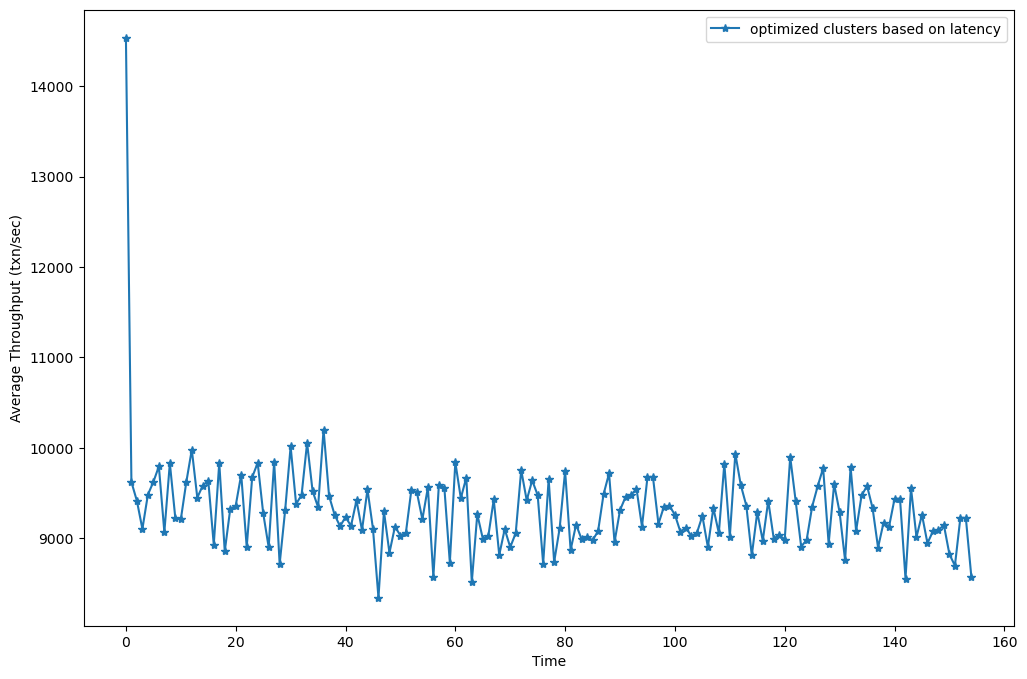

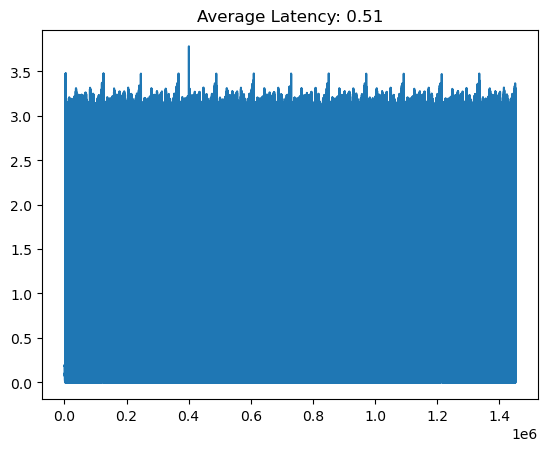

ERROR: (gcloud.compute.instances.delete) Could not fetch resource:
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-00' was not found
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-01' was not found
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-02' was not found
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-03' was not found
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-04' was not found
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-05' was not found
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-06' was not found
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-07' was not found
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/inst

Deleted [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-00].
Deleted [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-01].
Deleted [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-02].
Deleted [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-03].
Deleted [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-04].
Deleted [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-05].
Deleted [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-06].
Deleted [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-07].
Deleted [https://www.googleapis.com/comp

ERROR: gcloud crashed (ConnectionError): HTTPSConnectionPool(host='compute.googleapis.com', port=443): Max retries exceeded with url: /compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b?alt=json (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f103a64dc90>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))

If you would like to report this issue, please run the following command:
  gcloud feedback

To check gcloud for common problems, please run the following command:
  gcloud info --run-diagnostics
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-13].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.



NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-13  us-west1-b  e2-highmem-2               10.138.0.14  35.203.130.62  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-12].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.



NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-12  us-west1-b  e2-highmem-2               10.138.0.4   35.247.89.56  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-17].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-18].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-19].


NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-17  us-west1-b  e2-highmem-2               10.138.0.32  34.168.52.101  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP     STATUS
resdb-18  us-west1-b  e2-highmem-2               10.138.0.13  35.203.130.156  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.



NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP  STATUS
resdb-19  us-west1-b  e2-highmem-2               10.138.0.42  34.83.3.91   RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-16].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-25].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-04].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-00].


NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-16  us-west1-b  e2-highmem-2               10.138.0.11  34.127.127.48  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-06].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.



NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-04  us-west1-b  e2-highmem-2               10.138.0.20  34.83.16.108  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-00  us-west1-b  e2-highmem-2               10.138.0.2   35.233.130.53  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-20].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-09].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-23].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.



NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP     STATUS
resdb-06  us-west1-b  e2-highmem-2               10.138.0.39  104.196.245.88  RUNNING
NAME      ZONE            MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-25  europe-west3-c  e2-highmem-2               10.156.0.19  34.107.53.255  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.



NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP     STATUS
resdb-20  us-west1-b  e2-highmem-2               10.138.0.19  35.233.243.130  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-09  us-west1-b  e2-highmem-2               10.138.0.27  34.127.86.106  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-03].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-07].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-11].


NAME      ZONE            MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-23  europe-west3-c  e2-highmem-2               10.156.0.2   34.141.5.141  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-40].


NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP      STATUS
resdb-03  us-west1-b  e2-highmem-2               10.138.0.25  104.199.127.102  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-07  us-west1-b  e2-highmem-2               10.138.0.40  34.83.141.10  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-11  us-west1-b  e2-highmem-2               10.138.0.37  34.83.240.90  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-36].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/asia-south1-c/instances/resdb-55].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-01].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-28].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-21].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-22].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-

NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP  STATUS
resdb-01  us-west1-b  e2-highmem-2               10.138.0.36  34.127.2.31  RUNNING
NAME      ZONE            MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-40  europe-west3-c  e2-highmem-2               10.156.0.27  34.141.60.168  RUNNING
NAME      ZONE            MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-36  europe-west3-c  e2-highmem-2               10.156.0.35  35.234.98.103  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.



NAME      ZONE            MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP  STATUS
resdb-28  europe-west3-c  e2-highmem-2               10.156.0.56  34.107.86.2  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-41].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-08].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-34].
Created [https://www.googleapis.com/co

NAME      ZONE           MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP     STATUS
resdb-55  asia-south1-c  e2-highmem-2               10.160.0.64  35.200.227.116  RUNNING
NAME      ZONE            MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-24  europe-west3-c  e2-highmem-2               10.156.0.33  34.107.116.20  RUNNING
NAME      ZONE            MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-22  europe-west3-c  e2-highmem-2               10.156.0.16  34.107.46.237  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.



NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-08  us-west1-b  e2-highmem-2               10.138.0.38  34.83.212.108  RUNNING
NAME      ZONE            MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-41  europe-west3-c  e2-highmem-2               10.156.0.34  34.89.194.166  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-29].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-38].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.



NAME      ZONE            MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-34  europe-west3-c  e2-highmem-2               10.156.0.88  34.89.225.48  RUNNING
NAME      ZONE            MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP     STATUS
resdb-21  europe-west3-c  e2-highmem-2               10.156.0.40  34.159.212.202  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-30].


NAME      ZONE           MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-50  asia-south1-c  e2-highmem-2               10.160.0.66  34.93.147.148  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-37].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.



NAME      ZONE            MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-38  europe-west3-c  e2-highmem-2               10.156.0.54  34.159.104.29  RUNNING
NAME      ZONE            MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP  STATUS
resdb-30  europe-west3-c  e2-highmem-2               10.156.0.29  34.107.7.58  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/asia-south1-c/instances/resdb-54].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-32].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-31].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.



NAME      ZONE            MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-29  europe-west3-c  e2-highmem-2               10.156.0.38  35.198.120.98  RUNNING
NAME      ZONE            MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP     STATUS
resdb-32  europe-west3-c  e2-highmem-2               10.156.0.31  35.242.231.214  RUNNING
NAME      ZONE           MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP   EXTERNAL_IP     STATUS
resdb-54  asia-south1-c  e2-highmem-2               10.160.0.103  34.100.185.137  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/asia-south1-c/instances/resdb-53].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-35].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.



NAME      ZONE            MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP   EXTERNAL_IP    STATUS
resdb-31  europe-west3-c  e2-highmem-2               10.156.0.122  35.246.201.96  RUNNING
NAME      ZONE            MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-37  europe-west3-c  e2-highmem-2               10.156.0.36  34.141.85.28  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-27].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-39].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/asia-south1-c/instances/resdb-51].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/asia-south1-c/instances/resdb-43].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggeste

NAME      ZONE            MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-35  europe-west3-c  e2-highmem-2               10.156.0.49  35.246.229.35  RUNNING
NAME      ZONE           MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP     STATUS
resdb-53  asia-south1-c  e2-highmem-2               10.160.0.94  34.100.190.121  RUNNING
NAME      ZONE            MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP     STATUS
resdb-27  europe-west3-c  e2-highmem-2               10.156.0.52  34.107.120.179  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-33].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.



NAME      ZONE           MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP   EXTERNAL_IP    STATUS
resdb-43  asia-south1-c  e2-highmem-2               10.160.0.111  34.93.190.159  RUNNING
NAME      ZONE            MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-33  europe-west3-c  e2-highmem-2               10.156.0.89  34.89.196.126  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/asia-south1-c/instances/resdb-47].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/asia-south1-c/instances/resdb-45].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/asia-south1-c/instances/resdb-49].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/asia-south1-c/instances/resdb-46].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.



NAME      ZONE            MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-39  europe-west3-c  e2-highmem-2               10.156.0.41  34.141.113.89  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.



NAME      ZONE           MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP   EXTERNAL_IP    STATUS
resdb-47  asia-south1-c  e2-highmem-2               10.160.0.102  34.100.190.72  RUNNING
NAME      ZONE           MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP   EXTERNAL_IP   STATUS
resdb-46  asia-south1-c  e2-highmem-2               10.160.0.113  35.244.4.213  RUNNING
NAME      ZONE           MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-51  asia-south1-c  e2-highmem-2               10.160.0.93  34.93.245.181  RUNNING
NAME      ZONE           MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-49  asia-south1-c  e2-highmem-2               10.160.0.90  34.93.30.224  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/asia-south1-c/instances/resdb-52].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-26].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/asia-south1-c/instances/resdb-44].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.



NAME      ZONE            MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-26  europe-west3-c  e2-highmem-2               10.156.0.45  34.89.133.182  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240125'.



NAME      ZONE           MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP   EXTERNAL_IP  STATUS
resdb-45  asia-south1-c  e2-highmem-2               10.160.0.109  35.244.1.43  RUNNING
NAME      ZONE           MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP   EXTERNAL_IP     STATUS
resdb-52  asia-south1-c  e2-highmem-2               10.160.0.112  34.100.181.144  RUNNING
NAME      ZONE           MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP   EXTERNAL_IP     STATUS
resdb-44  asia-south1-c  e2-highmem-2               10.160.0.110  35.200.200.131  RUNNING
10.138.0.2
10.138.0.36
10.138.0.25
10.138.0.20
10.138.0.39
10.138.0.40
10.138.0.38
10.138.0.27
10.138.0.37
10.138.0.4
10.138.0.14
10.138.0.11
10.138.0.32
10.138.0.13
10.138.0.42
10.138.0.19
10.156.0.40
10.156.0.16
10.156.0.2
10.156.0.33
10.156.0.19
10.156.0.45
10.156.0.52
10.156.0.56
10.156.0.38
10.156.0.29
10.156.0.122
10.156.0.31
10.156.0.89
10.156.0.88
10.156.0.49
10.156.0.35
10.156.0.36
10.156.0.54
10.156.0.41
10.156.0.27
10.156.0.34
10.160.0.111
10.160.0.110
1

[sudo] password for tejas: CMake Warning:
  No source or binary directory provided.  Both will be assumed to be the
  same as the current working directory, but note that this warning will
  become a fatal error in future CMake releases.




-- Found OpenSSL: /usr/lib/x86_64-linux-gnu/libcrypto.so (found suitable version "3.0.2", minimum required is "1.1.0")  
-- Found OpenSSL: /usr/lib/x86_64-linux-gnu/libcrypto.so (found version "3.0.2")  
-- Could NOT find Doxygen (missing: DOXYGEN_EXECUTABLE) 
-- Configuring done
-- Generating done
-- Build files have been written to: /home/tejas/work/hotstuffO
[ 21%] Built target libsecp256k1
Consolidate compiler generated dependencies of target hotstuff
Consolidate compiler generated dependencies of target salticidae
[ 48%] Built target salticidae
[ 62%] Built target hotstuff
[ 64%] Built target salticidae_static
[ 67%] Built target salticidae_shared
[ 72%] Built target hotstuff_shared
[ 72%] Built target hotstuff_static
Consolidate compiler generated dependencies of target hotstuff-tls-keygen
Consolidate compiler generated dependencies of target hotstuff-keygen
Consolidate compiler generated dependencies of target test_secp256k1
Consolidate compiler generated dependencies of target 

To github.com:tmane002/hotstuffO.git
   6ebd983..e126400  main -> main


gcloud compute ssh --zone "us-west1-b" "resdb-19" --project "ucr-ursa-major-lesani-lab" --command "sudo apt -y update;sudo apt -y install build-essential; sudo apt -y install autoconf libtool libssl-dev libuv1-dev cmake pkg-config cmake-data make; sudo rm -r hotstuffO; git clone https://github.com/tmane002/hotstuffO.git;"
0
gcloud compute ssh --zone "us-west1-b" "resdb-24" --project "ucr-ursa-major-lesani-lab" --command "cd hotstuffO; sudo nohup sh compile_job.sh >../make_job.out 2>&1 &"
0
gcloud compute ssh --zone "us-west1-b" "resdb-07" --project "ucr-ursa-major-lesani-lab" --command "sudo rm -f nohup.out;"
4 gcloud compute ssh --zone "us-west1-b" "resdb-04" --project "ucr-ursa-major-lesani-lab" --command "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec4.conf >../nohup.out 2>&1 &"
hotstuff-app: no process found
gcloud compute ssh --zone "us-west1-b" "resdb-08" --project "ucr-ursa-major-lesani-lab" --command "sudo apt -y update;sudo apt -y install build-essent

gcloud compute ssh --zone "us-west1-b" "resdb-43" --project "ucr-ursa-major-lesani-lab" --command "sudo apt -y update;sudo apt -y install build-essential; sudo apt -y install autoconf libtool libssl-dev libuv1-dev cmake pkg-config cmake-data make; sudo rm -r hotstuffO; git clone https://github.com/tmane002/hotstuffO.git;"
0
gcloud compute ssh --zone "us-west1-b" "resdb-31" --project "ucr-ursa-major-lesani-lab" --command "cd hotstuffO; sudo nohup sh compile_job.sh >../make_job.out 2>&1 &"
0
gcloud compute ssh --zone "us-west1-b" "resdb-50" --project "ucr-ursa-major-lesani-lab" --command "sudo rm -f nohup.out;"
hotstuff-client: no process found
gcloud compute ssh --zone "us-west1-b" "resdb-21" --project "ucr-ursa-major-lesani-lab" --command "sudo apt -y update;sudo apt -y install build-essential; sudo apt -y install autoconf libtool libssl-dev libuv1-dev cmake pkg-config cmake-data make; sudo rm -r hotstuffO; git clone https://github.com/tmane002/hotstuffO.git;"
0
gcloud compute ssh --zo

gcloud compute ssh --zone "us-west1-b" "resdb-18" --project "ucr-ursa-major-lesani-lab" --command "sudo apt -y update;sudo apt -y install build-essential; sudo apt -y install autoconf libtool libssl-dev libuv1-dev cmake pkg-config cmake-data make; sudo rm -r hotstuffO; git clone https://github.com/tmane002/hotstuffO.git;"
0
gcloud compute ssh --zone "us-west1-b" "resdb-02" --project "ucr-ursa-major-lesani-lab" --command "cd hotstuffO; sudo nohup sh compile_job.sh >../make_job.out 2>&1 &"
0
gcloud compute ssh --zone "us-west1-b" "resdb-17" --project "ucr-ursa-major-lesani-lab" --command "sudo rm -f nohup.out;"
11 gcloud compute ssh --zone "us-west1-b" "resdb-11" --project "ucr-ursa-major-lesani-lab" --command "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec11.conf >../nohup.out 2>&1 &"
hotstuff-app: no process found
gcloud compute ssh --zone "us-west1-b" "resdb-58" --project "ucr-ursa-major-lesani-lab" --command "sudo apt -y update;sudo apt -y install build-esse

gcloud compute ssh --zone "us-west1-b" "resdb-33" --project "ucr-ursa-major-lesani-lab" --command "sudo apt -y update;sudo apt -y install build-essential; sudo apt -y install autoconf libtool libssl-dev libuv1-dev cmake pkg-config cmake-data make; sudo rm -r hotstuffO; git clone https://github.com/tmane002/hotstuffO.git;"
0
gcloud compute ssh --zone "us-west1-b" "resdb-36" --project "ucr-ursa-major-lesani-lab" --command "cd hotstuffO; sudo nohup sh compile_job.sh >../make_job.out 2>&1 &"
0
gcloud compute ssh --zone "us-west1-b" "resdb-56" --project "ucr-ursa-major-lesani-lab" --command "sudo rm -f nohup.out;"
44 gcloud compute ssh --zone "us-west1-b" "resdb-44" --project "ucr-ursa-major-lesani-lab" --command "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec36.conf >../nohup.out 2>&1 &"
gcloud compute ssh --zone "us-west1-b" "resdb-17" --project "ucr-ursa-major-lesani-lab" --command "cd hotstuffO; sudo nohup ./examples/hotstuff-client --idx 1 --iter -1 --max-asyn

gcloud compute ssh --zone "us-west1-b" "resdb-29" --project "ucr-ursa-major-lesani-lab" --command "sudo apt -y update;sudo apt -y install build-essential; sudo apt -y install autoconf libtool libssl-dev libuv1-dev cmake pkg-config cmake-data make; sudo rm -r hotstuffO; git clone https://github.com/tmane002/hotstuffO.git;"
0
gcloud compute ssh --zone "us-west1-b" "resdb-45" --project "ucr-ursa-major-lesani-lab" --command "cd hotstuffO; sudo nohup sh compile_job.sh >../make_job.out 2>&1 &"
0
gcloud compute ssh --zone "us-west1-b" "resdb-45" --project "ucr-ursa-major-lesani-lab" --command "sudo rm -f nohup.out;"
27 gcloud compute ssh --zone "us-west1-b" "resdb-27" --project "ucr-ursa-major-lesani-lab" --command "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec23.conf >../nohup.out 2>&1 &"
gcloud compute ssh --zone "us-west1-b" "resdb-59" --project "ucr-ursa-major-lesani-lab" --command "cd hotstuffO; sudo nohup ./examples/hotstuff-client --idx 11 --iter -1 --max-asy

gcloud compute ssh --zone "us-west1-b" "resdb-35" --project "ucr-ursa-major-lesani-lab" --command "sudo apt -y update;sudo apt -y install build-essential; sudo apt -y install autoconf libtool libssl-dev libuv1-dev cmake pkg-config cmake-data make; sudo rm -r hotstuffO; git clone https://github.com/tmane002/hotstuffO.git;"
0
gcloud compute ssh --zone "us-west1-b" "resdb-47" --project "ucr-ursa-major-lesani-lab" --command "cd hotstuffO; sudo nohup sh compile_job.sh >../make_job.out 2>&1 &"
0
gcloud compute ssh --zone "us-west1-b" "resdb-40" --project "ucr-ursa-major-lesani-lab" --command "sudo rm -f nohup.out;"
40 gcloud compute ssh --zone "us-west1-b" "resdb-40" --project "ucr-ursa-major-lesani-lab" --command "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec32.conf >../nohup.out 2>&1 &"
hotstuff-app: no process found
gcloud compute ssh --zone "us-west1-b" "resdb-38" --project "ucr-ursa-major-lesani-lab" --command "sudo apt -y update;sudo apt -y install build-esse

ERROR: (gcloud.compute.ssh) Could not fetch resource:
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-14' was not found

ERROR: (gcloud.compute.ssh) Could not fetch resource:
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-15' was not found

ERROR: (gcloud.compute.ssh) Could not fetch resource:
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-10' was not found

ERROR: (gcloud.compute.ssh) Could not fetch resource:
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-02' was not found

ERROR: (gcloud.compute.ssh) Could not fetch resource:
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-05' was not found





Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]


Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]


Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]
Get:5 http://us-west1.gce.archive.ubuntu

Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe Translation-en [5124 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 c-n-f Metadata [265 kB]
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe Translation-en [5124 kB]
Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [144 kB]
Get:9 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse Translation-en [104 kB]
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu f

Get:18 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/universe Translation-en [278 kB]
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [2619 kB]
Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 c-n-f Metadata [265 kB]
Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [144 kB]
Get:9 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse Translation-en [104 kB]
Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 c-n-f Metadata [9136 B]
Get:19 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 c-n-f Metadata [25.7 kB]
Get:20 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/multiverse amd64 Packages [26.1 kB]
Get:21 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/multiverse Translation-en [7768 B]
Get:22 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/multiverse amd64 c-n-f Metadata [62

ERROR: (gcloud.compute.ssh) Could not fetch resource:
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/asia-south1-c/instances/resdb-48' was not found

ERROR: (gcloud.compute.ssh) Could not fetch resource:
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/asia-south1-c/instances/resdb-42' was not found



Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 c-n-f Metadata [265 kB]
Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [144 kB]
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted Translation-en [365 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]
Get:9 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse Translation-en [104 kB]
Get:16 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted amd64 c-n-f Metadata [552 B]
Get:17 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1158 kB]
Get:23 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/main amd64 Packages [45.7 kB]
Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 c-n-f Metadata [9136 B]
Get:18 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/universe Translation-en [278 kB]
Get:19 http://us

Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main Translation-en [493 kB]
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 c-n-f Metadata [17.2 kB]
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [2619 kB]
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main Translation-en [493 kB]
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 c-n-f Metadata [17.2 kB]
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3059 kB]
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main Translation-en [493 kB]
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [2619 kB]
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 c-n-f Metadata [17.2 kB]
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [2619 k

Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 c-n-f Metadata [17.2 kB]
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [2619 kB]
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3059 kB]
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted Translation-en [365 kB]
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted Translation-en [365 kB]
Get:16 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted amd64 c-n-f Metadata [552 B]
Get:17 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1158 kB]
Get:16 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted amd64 c-n-f Metadata [552 B]
Get:17 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1158 kB]
Get:18 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/universe T

Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main Translation-en [493 kB]
Get:35 http://security.ubuntu.com/ubuntu focal-security/restricted Translation-en [349 kB]
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 c-n-f Metadata [17.2 kB]
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [2619 kB]
Get:36 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 c-n-f Metadata [552 B]
Get:37 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [933 kB]
Get:38 http://security.ubuntu.com/ubuntu focal-security/universe Translation-en [197 kB]
Get:39 http://security.ubuntu.com/ubuntu focal-security/universe amd64 c-n-f Metadata [19.2 kB]
Get:40 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 Packages [23.9 kB]
Get:41 http://security.ubuntu.com/ubuntu focal-security/multiverse Translation-en [5796 B]
Get:42 http://security.ubuntu.com/ubuntu focal-securit

Hit:1 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:6 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/universe Translation-en [5124 kB]
Get:23 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/main amd64 Packages [45.7 kB]
Get:24 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/main Translation-en [16.3 kB]
Get:25 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/main amd64 c-n-f Metadata [1420 B]
Get:26 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/restricted amd64 c-n-f Metadata [116 B]
Get:27 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/universe amd64 Packages [25.0 kB]
Get:28 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/universe Translation-en [16.3 kB]
Get:29 http://us-west1.gce.archive.

Get:7 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/universe amd64 c-n-f Metadata [265 kB]
Get:8 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [144 kB]
Get:39 http://security.ubuntu.com/ubuntu focal-security/universe amd64 c-n-f Metadata [19.2 kB]
Get:40 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 Packages [23.9 kB]
Get:41 http://security.ubuntu.com/ubuntu focal-security/multiverse Translation-en [5796 B]
Get:42 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 c-n-f Metadata [548 B]
Get:38 http://security.ubuntu.com/ubuntu focal-security/universe Translation-en [197 kB]
Get:38 http://security.ubuntu.com/ubuntu focal-security/universe Translation-en [197 kB]
Get:39 http://security.ubuntu.com/ubuntu focal-security/universe amd64 c-n-f Metadata [19.2 kB]
Get:40 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 Packages [23.9 kB]
Get:41 http://security.ubuntu.com/ubuntu focal-security/multi

Get:5 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]
Get:22 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/multiverse amd64 c-n-f Metadata [620 B]
Get:23 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports/main amd64 Packages [45.7 kB]
Get:24 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports/main Translation-en [16.3 kB]
Get:25 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports/main amd64 c-n-f Metadata [1420 B]
Get:26 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports/restricted amd64 c-n-f Metadata [116 B]
Get:27 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports/universe amd64 Packages [25.0 kB]
Get:28 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports/universe Translation-en [16.3 kB]
Get:29 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports/universe amd64 c-n-f Metadata [880 B]
Get:30 http://europe-west3.gce.archive.ub

Get:32 http://security.ubuntu.com/ubuntu focal-security/main Translation-en [410 kB]
Get:35 http://security.ubuntu.com/ubuntu focal-security/restricted Translation-en [349 kB]
Get:33 http://security.ubuntu.com/ubuntu focal-security/main amd64 c-n-f Metadata [13.2 kB]
Get:34 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [2508 kB]
Get:36 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 c-n-f Metadata [552 B]
Get:37 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [933 kB]
Get:7 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/universe amd64 c-n-f Metadata [265 kB]
Get:38 http://security.ubuntu.com/ubuntu focal-security/universe Translation-en [197 kB]
Get:39 http://security.ubuntu.com/ubuntu focal-security/universe amd64 c-n-f Metadata [19.2 kB]
Get:40 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 Packages [23.9 kB]
Get:8 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/multiverse amd6

Get:24 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports/main Translation-en [16.3 kB]
Get:25 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports/main amd64 c-n-f Metadata [1420 B]
Get:26 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports/restricted amd64 c-n-f Metadata [116 B]
Get:27 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports/universe amd64 Packages [25.0 kB]
Get:28 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports/universe Translation-en [16.3 kB]
Get:29 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports/universe amd64 c-n-f Metadata [880 B]
Get:11 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3059 kB]
Get:30 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports/multiverse amd64 c-n-f Metadata [116 B]
Get:23 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports/main amd64 Packages [45.7 kB]
Get:24 http://europe-west3.gce.arc

Get:41 http://security.ubuntu.com/ubuntu focal-security/multiverse Translation-en [5796 B]
Get:18 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/universe Translation-en [278 kB]
Get:19 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 c-n-f Metadata [25.7 kB]
Get:20 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/multiverse amd64 Packages [26.1 kB]
Get:21 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/multiverse Translation-en [7768 B]
Get:22 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/multiverse amd64 c-n-f Metadata [620 B]
Get:19 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 c-n-f Metadata [25.7 kB]
Hit:1 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:20 http://europe-wes

Get:41 http://security.ubuntu.com/ubuntu focal-security/multiverse Translation-en [5796 B]
Get:42 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 c-n-f Metadata [548 B]
Hit:1 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:5 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]
Get:32 http://security.ubuntu.com/ubuntu focal-security/main Translation-en [410 kB]
Get:33 http://security.ubuntu.com/ubuntu focal-security/main amd64 c-n-f Metadata [13.2 kB]
Get:34 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [2508 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:35 http://security.ubuntu.com/ubuntu focal-security/restricted Translation-en [349 kB]


Get:36 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 c-n-f Metadata [552 B]
Get:37 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [933 kB]
Get:38 http://security.ubuntu.com/ubuntu focal-security/universe Translation-en [197 kB]
Get:39 http://security.ubuntu.com/ubuntu focal-security/universe amd64 c-n-f Metadata [19.2 kB]
Get:40 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 Packages [23.9 kB]
Get:41 http://security.ubuntu.com/ubuntu focal-security/multiverse Translation-en [5796 B]
Get:42 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 c-n-f Metadata [548 B]
Hit:1 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:1 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:32 http://security.ubuntu

Get:8 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [144 kB]
Get:9 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/multiverse Translation-en [104 kB]
Get:10 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 c-n-f Metadata [9136 B]
Get:11 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3059 kB]
Get:5 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]
Get:6 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/universe Translation-en [5124 kB]
Get:12 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main Translation-en [493 kB]
Get:5 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]
Get:13 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 c-n-f Metadata [17.2 kB]
Get:14 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [2619 kB]

Get:8 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [144 kB]
Get:9 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/multiverse Translation-en [104 kB]
Get:10 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 c-n-f Metadata [9136 B]
Get:11 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3059 kB]
Get:5 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]
Get:16 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/restricted amd64 c-n-f Metadata [552 B]
Get:5 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]
Get:17 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1158 kB]
Get:6 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/universe Translation-en [5124 kB]
Get:18 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/universe Translation-en [2

Get:23 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports/main amd64 Packages [45.7 kB]
Get:13 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 c-n-f Metadata [17.2 kB]
Get:14 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [2619 kB]
Get:7 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/universe amd64 c-n-f Metadata [265 kB]
Get:8 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [144 kB]
Get:18 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/universe Translation-en [278 kB]
Get:9 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/multiverse Translation-en [104 kB]
Get:24 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports/main Translation-en [16.3 kB]
Get:25 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports/main amd64 c-n-f Metadata [1420 B]
Get:26 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports/

Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:24 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports/main Translation-en [16.3 kB]
Get:25 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports/main amd64 c-n-f Metadata [1420 B]
Get:26 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports/restricted amd64 c-n-f Metadata [116 B]
Get:27 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports/universe amd64 Packages [25.0 kB]
Get:28 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports/universe Translation-en [16.3 kB]
Get:29 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports/universe amd64 c-n-f Metadata [880 B]
Get:11 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3059 kB]
Get:30 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports/multiverse amd64 c-n-f Metadata [116 B]
Get:4 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-b

Get:24 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports/main Translation-en [16.3 kB]
Get:25 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports/main amd64 c-n-f Metadata [1420 B]
Get:26 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports/restricted amd64 c-n-f Metadata [116 B]
Get:24 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports/main Translation-en [16.3 kB]
Get:25 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports/main amd64 c-n-f Metadata [1420 B]
Get:26 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports/restricted amd64 c-n-f Metadata [116 B]
Get:27 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports/universe amd64 Packages [25.0 kB]
Get:28 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports/universe Translation-en [16.3 kB]
Get:29 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports/universe amd64 c-n-f Metadata [880 B]
Get:30 http://europe-west3.

Get:33 http://security.ubuntu.com/ubuntu focal-security/main amd64 c-n-f Metadata [13.2 kB]
Get:34 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [2508 kB]
Get:36 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports/main Translation-en [16.3 kB]
Get:37 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports/main amd64 c-n-f Metadata [1420 B]
Get:38 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports/restricted amd64 c-n-f Metadata [116 B]
Get:2 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:31 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2678 kB]
Get:39 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports/universe amd64 Packages [25.0 kB]
Get:40 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports/universe Translation-en [16.3 kB]
Get:41 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports/universe amd64 c-n-f Metadata [

Get:31 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2678 kB]
Get:12 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main Translation-en [493 kB]
Get:11 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3059 kB]
Get:32 http://security.ubuntu.com/ubuntu focal-security/main Translation-en [410 kB]
Get:18 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/universe Translation-en [278 kB]
Get:19 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 c-n-f Metadata [25.7 kB]
Get:20 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/multiverse amd64 Packages [26.1 kB]
Get:21 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/multiverse Translation-en [7768 B]
Get:22 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/multiverse amd64 c-n-f Metadata [620 B]
Get:33 http://security.ubuntu.com/ubuntu focal-security/main amd64 c-n-f Metadata [13.2 k

Get:15 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/restricted Translation-en [365 kB]
Get:15 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/restricted Translation-en [365 kB]
Get:16 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/restricted amd64 c-n-f Metadata [552 B]
Get:17 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1158 kB]
Get:16 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/restricted amd64 c-n-f Metadata [552 B]
Get:17 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1158 kB]
Get:18 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/universe Translation-en [278 kB]
Get:19 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 c-n-f Metadata [25.7 kB]
Get:20 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/multiverse amd64 Packages [26.1 kB]
Get:21 http://europe-west3.gce.arc

Get:39 http://security.ubuntu.com/ubuntu focal-security/universe amd64 c-n-f Metadata [19.2 kB]
Get:40 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 Packages [23.9 kB]
Get:35 http://security.ubuntu.com/ubuntu focal-security/restricted Translation-en [349 kB]
Get:20 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 c-n-f Metadata [25.7 kB]
Get:21 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/multiverse amd64 Packages [26.1 kB]
Get:22 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/multiverse Translation-en [7768 B]
Get:23 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/multiverse amd64 c-n-f Metadata [620 B]
Get:24 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports/main amd64 Packages [45.7 kB]
Get:36 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 c-n-f Metadata [552 B]
Get:37 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [933 kB]
Get

Get:32 http://security.ubuntu.com/ubuntu focal-security/main Translation-en [410 kB]
Get:30 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports/universe amd64 c-n-f Metadata [880 B]
Get:31 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports/multiverse amd64 c-n-f Metadata [116 B]
Get:33 http://security.ubuntu.com/ubuntu focal-security/main amd64 c-n-f Metadata [13.2 kB]
Get:34 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [2508 kB]
Get:25 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports/main Translation-en [16.3 kB]
Get:26 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports/main amd64 c-n-f Metadata [1420 B]
Get:27 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports/restricted amd64 c-n-f Metadata [116 B]
Get:28 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports/universe amd64 Packages [25.0 kB]
Get:29 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports/universe T


Building dependency tree...
Reading state information...
90 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists...
Building dependency tree...


Reading state information...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu cpp cpp-9 dpkg-dev
  fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan5 libatomic1
  libbinutils libc-dev-bin libc6 libc6-dev libcc1-0 libcrypt-dev libctf-nobfd0
  libctf0 libdpkg-perl libfakeroot libfile-fcntllock-perl libgcc-9-dev
  libgomp1 libisl22 libitm1 liblsan0 libmpc3 libquadmath0 libstdc++-9-dev
  libtsan0 libubsan1 linux-libc-dev make manp

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Fetched 48.2 MB in 1s (58.7 MB/s)
(Reading database ... 62221 files and directories currently installed.)
Preparing to unpack .../libc6_2.31-0ubuntu9.14_amd64.deb ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Unpacking libc6:amd64 (2.31-0ubuntu9.14) over (2.31-0ubuntu9.9) ...
Setting up libc6:amd64 (2.31-0ubuntu9.14) ...
Fetched 29.9 MB in 6s (5000 kB/s)
Reading package lists...debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Selecting previously unselected package binutils-common:amd64.
(Reading database ... 62221 files and directories currently installed.)
Preparing to unpack .../00-binutils-common_2.34-6ubuntu1.8_amd64.deb ...
Unpacking binutils-common:amd64 (


Building dependency tree...
Building dependency tree...

Reading state information...
Building dependency tree...
Reading state information...
90 packages can be upgraded. Run 'apt list --upgradable' to see them.

Reading state information...
90 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists...Reading package lists...
Building dependency tree...
Building dependency tree...Fetched 29.9 MB in 6s (4768 kB/s)
Reading package lists...
Reading state information...
90 packages can be upgraded. Run 'apt list --upgradable' to see them.
Selecting previously unselected package cpp.
Preparing to unpack .../14-cpp_4%3a9.3.0-1ubuntu2_amd64.deb ...



Reading state information...
Reading package lists...Unpacking cpp (4:9.3.0-1ubuntu2) ...

Building dependency tree...90 packages can be upgraded. Run 'apt list --upgradable' to see them.
Selecting previously unselected package libcc1-0:amd64.
Preparing to unpack .../15-libcc1-0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libcc1-0:amd64 (10.5.0-1ubuntu1~20.04) ...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu cpp cpp-9 dpkg-dev
  fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
 

Selecting previously unselected package libasan5:amd64.
Preparing to unpack .../19-libasan5_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking libasan5:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Need to get 48.2 MB of archives.
After this operation, 203 MB of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc6 amd64 2.31-0ubuntu9.14 [2725 kB]

Reading state information...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu cpp cpp-9 dpkg-dev
  fake

Get:23 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libtsan0 amd64 10.5.0-1ubuntu1~20.04 [2016 kB]
Need to get 48.2 MB of archives.
After this operation, 203 MB of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc6 amd64 2.31-0ubuntu9.14 [2725 kB]
Get:24 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libubsan1 amd64 10.5.0-1ubuntu1~20.04 [785 kB]
Get:25 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libquadmath0 amd64 10.5.0-1ubuntu1~20.04 [146 kB]
Get:26 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libgcc-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [2359 kB]

Reading package lists...
The following NEW packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu build-essential cpp cpp-9
Building dependency tree...  dpkg-dev fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-

Building dependency tree...Get:25 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libquadmath0 amd64 10.5.0-1ubuntu1~20.04 [146 kB]
Get:26 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libgcc-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [2359 kB]
The following NEW packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu build-essential cpp cpp-9
  dpkg-dev fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan5 libatomic1
  libbinutils libc-dev-bin libc6-dev libcc1-0 libcrypt-dev libctf-nobfd0
  libctf0 libdpkg-perl libfakeroot libfile-fcntllock-perl libgcc-9-dev
  libgomp1 libisl22 libitm1 liblsan0 libmpc3 libquadmath0 libstdc++-9-dev
  libtsan0 libubsan1 linux-libc-dev make manpages-dev
The following packages will be upgraded:
  libc6
Reading package lists...
Building dependency tree...Reading package lists...Get:27 http://europe-west3.gce.archive.

Building dependency tree...Building dependency tree...Reading package lists...Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils-common amd64 2.34-6ubuntu1.8 [208 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libbinutils amd64 2.34-6ubuntu1.8 [475 kB]
Get:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libctf-nobfd0 amd64 2.34-6ubuntu1.8 [48.1 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libctf0 amd64 2.34-6ubuntu1.8 [46.7 kB]
Selecting previously unselected package libquadmath0:amd64.

Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils-x86-64-linux-gnu amd64 2.34-6ubuntu1.8 [1614 kB]
Preparing to unpack .../23-libquadmath0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libquadmath0:amd64 (10.5.0-1ubuntu1~20.04) ...
Reading package lists...Building dependency tree...Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-





debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Get:27 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9 amd64 9.4.0-1ubuntu1~20.04.2 [8276 kB]
Reading package lists...
Reading state information...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu cpp cpp-9 dpkg-dev
  fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan5 libatomic1
  libbinutils libc-dev-bin libc6 libc6-dev libcc1-0 libcrypt-dev libctf-nobfd0
  libctf0 libdpkg-perl libfakeroot libfile-

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu cpp cpp-9 dpkg-dev
  fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan5 libatomic1
  libbinutils libc-dev-bin libc6 libc6-dev libcc1-0 libcrypt-dev libctf-nobfd0
  libctf0 libdpkg-perl libfakeroot libfile-fcntllock-perl libgcc-9-de

Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libmpc3 amd64 1.1.0-1 [40.8 kB]
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cpp-9 amd64 9.4.0-1ubuntu1~20.04.2 [7502 kB]
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan5 libatomic1
  libbinutils libc-dev-bin libc6 libc6-dev libcc1-0 libcrypt-dev libctf-nobfd0
  libctf0 libdpkg-perl libfakeroot libfile-fcntllock-perl libgcc-9-dev
  libgomp1 libisl22 libitm1 liblsan0 libmpc3 libquadmath0 libstdc++-9-dev
  libtsan0 libubsan1 linux-libc-dev make manpages-dev
Suggested packages:
  binutils-doc cpp-doc gcc-9-locales debian-keyring g++-multilib
  g++-9-multilib gcc-9-doc gcc-multilib autoconf automake libtool flex bison
  gdb gcc-doc gcc-9-multilib glibc-doc bzr libstdc++-9-doc make-doc
1 upgraded, 41 newly installed, 0 to remove and 89 not upgraded.
Need to get 48.2 MB of archives.
After this operation, 203 MB of additional disk space will be used.
Get:1 http://us-west1.gce.arc

Get:30 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 g++-9 amd64 9.4.0-1ubuntu1~20.04.2 [8421 kB]
Get:9 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 linux-libc-dev amd64 5.4.0-170.188 [1125 kB]
Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libcrypt-dev amd64 1:4.4.10-10ubuntu4 [104 kB]
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc6-dev amd64 2.31-0ubuntu9.14 [2519 kB]
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9-base amd64 9.4.0-1ubuntu1~20.04.2 [18.9 kB]
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libisl22 amd64 0.22.1-1 [592 kB]
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libmpc3 amd64 1.1.0-1 [40.8 kB]
Get:35 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 build-essential amd64 12.8ubuntu1.1 [4664 B]
Get:36 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/ma

Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils amd64 2.34-6ubuntu1.8 [3384 B]
Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc-dev-bin amd64 2.31-0ubuntu9.14 [71.8 kB]
Get:9 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 linux-libc-dev amd64 5.4.0-170.188 [1125 kB]
Get:31 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 g++ amd64 4:9.3.0-1ubuntu2 [1604 B]
Get:32 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 make amd64 4.2.1-1.2 [162 kB]
Get:33 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libdpkg-perl all 1.19.7ubuntu3.2 [231 kB]
Get:34 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 dpkg-dev all 1.19.7ubuntu3.2 [679 kB]
Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libcrypt-dev amd64 1:4.4.10-10ubuntu4 [104 kB]
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 l

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Get:41 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libfile-fcntllock-perl amd64 0.22-3build4 [33.1 kB]
Get:42 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 manpages-dev all 5.05-1 [2266 kB]
Get:25 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libquadmath0 amd64 10.5.0-1ubuntu1~20.04 [146 kB]
Get:26 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libgcc-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [2359 kB]
Fetched 48.2 MB in 1s (35.0 MB/s)
Selecting previously unselected package g++-9.
Preparing to unpack .../28-g++-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking g++-9 (9.4.0-1ubuntu1~20.04.2) ...
Get:30 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 g++-9 amd64 9.4.0-1ubuntu1~20.04.2 [8421 kB]
Selecting previously unselected package libbinutils:amd64.
Preparing to unpack .../01-libbinutils_2.34-6ubuntu1.8_amd64.deb ...
Unpacking libbinutils:amd64 (2.34-6ubuntu1.8) ...
Need to get 48.2 MB

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Get:16 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 cpp amd64 4:9.3.0-1ubuntu2 [27.6 kB]
Get:17 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libcc1-0 amd64 10.5.0-1ubuntu1~20.04 [48.8 kB]
Get:18 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libgomp1 amd64 10.5.0-1ubuntu1~20.04 [102 kB]
Get:19 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libitm1 amd64 10.5.0-1ubuntu1~20.04 [26.2 kB]
Get:17 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libcc1-0 amd64 10.5.0-1ubuntu1~20.04 [48.8 kB]
Get:18 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libgomp1 amd64 10.5.0-1ubuntu1~20.04 [102 kB]
Get:20 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libatomic1 amd64 10.5.0-1ubuntu1~20.04 [9284 B]
Get:21 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libasan5 amd64 9.4.0-1ubuntu1~20.04.2 [2752 kB]
Fetched 48.2 MB in 

Get:26 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libgcc-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [2359 kB]
Preparing to unpack .../06-libc-dev-bin_2.31-0ubuntu9.14_amd64.deb ...
Unpacking libc-dev-bin (2.31-0ubuntu9.14) ...
Selecting previously unselected package binutils-common:amd64.
90 packages can be upgraded. Run 'apt list --upgradable' to see them.
Get:24 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libubsan1 amd64 10.5.0-1ubuntu1~20.04 [785 kB]

Get:22 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 liblsan0 amd64 10.5.0-1ubuntu1~20.04 [835 kB]
Get:27 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9 amd64 9.4.0-1ubuntu1~20.04.2 [8276 kB]
Get:28 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 gcc amd64 4:9.3.0-1ubuntu2 [5208 B]
Get:29 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libstdc++-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [1722 kB]
Get:25 h

Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libcrypt-dev amd64 1:4.4.10-10ubuntu4 [104 kB]
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc6-dev amd64 2.31-0ubuntu9.14 [2519 kB]
Get:22 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 liblsan0 amd64 10.5.0-1ubuntu1~20.04 [835 kB]
90 packages can be upgraded. Run 'apt list --upgradable' to see them.
Get:23 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libtsan0 amd64 10.5.0-1ubuntu1~20.04 [2016 kB]
Selecting previously unselected package libcrypt-dev:amd64.
Preparing to unpack .../08-libcrypt-dev_1%3a4.4.10-10ubuntu4_amd64.deb ...
Unpacking libcrypt-dev:amd64 (1:4.4.10-10ubuntu4) ...
Selecting previously unselected package libctf-nobfd0:amd64.
Preparing to unpack .../02-libctf-nobfd0_2.34-6ubuntu1.8_amd64.deb ...
Get:16 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 cpp amd64 4:9.3.0-1ubuntu2 [27.6 kB]
Get:17 http://u



debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


dpkg-preconfigure: unable to re-open stdin: 


Reading package lists...Fetched 48.2 MB in 1s (37.5 MB/s)
Unpacking libc6:amd64 (2.31-0ubuntu9.14) over (2.31-0ubuntu9.9) ...
Selecting previously unselected package make.
Preparing to unpack .../30-make_4.2.1-1.2_amd64.deb ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline

Unpacking make (4.2.1-1.2) ...
Building dependency tree...Get:28 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 gcc amd64 4:9.3.0-1ubuntu2 [5208 B]
Get:29 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libstdc++-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [1722 kB]
Get:27 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9 amd64 9.4.0-1ubuntu1~20.04.2 [8276 kB]
Get:30 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 g++-9 amd64 9.4.0-1ubuntu1~20.04.2 [8421 kB]
Get:28 http://us-w

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 




Selecting previously unselected package gcc-9-base:amd64.
Preparing to unpack .../10-gcc-9-base_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking gcc-9-base:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Fetched 48.2 MB in 1s (35.5 MB/s)
Get:31 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 g++ amd64 4:9.3.0-1ubuntu2 [1604 B]
Selecting previously unselected package binutils.
Get:41 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libfile-fcntllock-perl amd64 0.22-3build4 [33.1 kB]
Get:42 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 manpages-dev all 5.05-1 [2266 kB]
Get:32 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 make amd64 4.2.1-1.2 [162 kB]
Get:33 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libdpkg-perl all 1.19.7ubuntu3.2 [231 kB]
Reading package lists...Fetched 29.9 MB in 6s (5116 kB/s)
Reading package lists...Get:34 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 dpkg-dev all 1.

1 upgraded, 41 newly installed, 0 to remove and 89 not upgraded.
Selecting previously unselected package libalgorithm-diff-xs-perl.
Preparing to unpack .../37-libalgorithm-diff-xs-perl_0.04-6_amd64.deb ...
Unpacking libalgorithm-diff-xs-perl (0.04-6) ...
Setting up libc6:amd64 (2.31-0ubuntu9.14) ...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu cpp cpp-9 dpkg-dev
  fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan5 libatomic

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to fronten

1 upgraded, 41 newly installed, 0 to remove and 89 not upgraded.
Get:22 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 liblsan0 amd64 10.5.0-1ubuntu1~20.04 [835 kB]
Fetched 48.2 MB in 2s (28.0 MB/s)
Selecting previously unselected package libcrypt-dev:amd64.
Get:23 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libtsan0 amd64 10.5.0-1ubuntu1~20.04 [2016 kB]
Preparing to unpack .../08-libcrypt-dev_1%3a4.4.10-10ubuntu4_amd64.deb ...

(Reading database ... 40%
Get:12 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9-base amd64 9.4.0-1ubuntu1~20.04.2 [18.9 kB]
Get:13 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 libisl22 amd64 0.22.1-1 [592 kB]
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy 

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 




Get:31 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 g++ amd64 4:9.3.0-1ubuntu2 [1604 B]
Get:32 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 make amd64 4.2.1-1.2 [162 kB]
  libc6
1 upgraded, 41 newly installed, 0 to remove and 89 not upgraded.
Get:10 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 libcrypt-dev amd64 1:4.4.10-10ubuntu4 [104 kB]
Get:11 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc6-dev amd64 2.31-0ubuntu9.14 [2519 kB]
Get:33 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libdpkg-perl all 1.19.7ubuntu3.2 [231 kB]


Reading state information...
Get:34 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 dpkg-dev all 1.19.7ubuntu3.2 [679 kB]
Get:35 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 build-essential amd64 12.8ubuntu1.1 [4664 B]
Get:22 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 liblsan

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline


Get:9 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 linux-libc-dev amd64 5.4.0-170.188 [1125 kB]
Setting up libquadmath0:amd64 (10.5.0-1ubuntu1~20.04) ...
Get:10 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 libcrypt-dev amd64 1:4.4.10-10ubuntu4 [104 kB]
Get:11 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc6-dev amd64 2.31-0ubuntu9.14 [2519 kB]
Setting up libc6:amd64 (2.31-0ubuntu9.14) ...

Selecting previously unselected package binutils-x86-64-linux-gnu.
Setting up libatomic1:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../04-binutils-x86-64-linux-gnu_2.34-6ubuntu1.8_amd64.deb ...
Unpacking binutils-x86-64-linux-gnu (2.34-6ubuntu1.8) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Fetched 48.2 MB in 2s (22.9 MB/s)
Selecting previ

debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 








Setting up libasan5:amd64 (9.4.0-1ubuntu1~20.04.2) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Selecting previously unselected package libatomic1:amd64.
Preparing to unpack .../18-libatomic1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Setting up cpp-9 (9.4.0-1ubuntu1~20.04.2) ...
Unpacking libatomic1:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libisl22:amd64.
Fetched 48.2 MB in 2s (21.1 MB/s)
Setting up libc6-dev:amd64 (2.31-0ubuntu9.14) ...
Preparing to unpack .../11-libisl22_0.22.1-1_amd64.deb ...
Get:31 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 g++ amd64 4:9.3.0-1ubuntu2 [1604 B]
Reading package lists...90 packages can be upgraded. Run 'apt list --upgradable' to see them.
Get:32 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 make amd64 4.2.1-1.2 [162

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Setting up libc6:amd64 (2.31-0ubuntu9.14) ...
Fetched 48.2 MB in 1s (54.7 MB/s)
Building dependency tree...Get:22 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 liblsan0 amd64 10.5.0-1ubuntu1~20.04 [835 kB]
(Reading database ... 62221 files and directories currently installed.)
Preparing to unpack .../00-binutils-common_2.34-6ubuntu1.8_amd64.deb ...
Unpacking binutils-common:amd64 (2.34-6ubuntu1.8) ...
Selecting previously unselected package binutils-x86-64-linux-gnu.Setting up libc6:amd64 (2.31-0ubuntu9.14) ...
Get:23 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libtsan0 amd64 10.5.0-1ubuntu1~20.04 [2016 kB]

Preparing to unpack .../04-binutils-x86-64-linux-gnu_2.34-6ubuntu1.8_amd64.deb ...
Unpacking binutils-x86-64-linux-gnu (2.34-6ubuntu1.8) ...
Get:24 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libubsan1 amd64 10.5.0-1ubuntu1~20.04 [785 kB]
Unpacking libc6:amd64 (2.31-0ubuntu9.14) over (2.31-0u

Get:28 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 gcc amd64 4:9.3.0-1ubuntu2 [5208 B]
Get:29 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libstdc++-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [1722 kB]
Unpacking libc6:amd64 (2.31-0ubuntu9.14) over (2.31-0ubuntu9.9) ...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu cpp cpp-9 dpkg-dev
  fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl liba


Preparing to unpack .../libc6_2.31-0ubuntu9.14_amd64.deb ...Get:42 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 manpages-dev all 5.05-1 [2266 kB]
Selecting previously unselected package linux-libc-dev:amd64.

Selecting previously unselected package libisl22:amd64.
Preparing to unpack .../01-libbinutils_2.34-6ubuntu1.8_amd64.deb ...
Unpacking libbinutils:amd64 (2.34-6ubuntu1.8) ...
Preparing to unpack .../07-linux-libc-dev_5.4.0-170.188_amd64.deb ...
Unpacking linux-libc-dev:amd64 (5.4.0-170.188) ...
Preparing to unpack .../11-libisl22_0.22.1-1_amd64.deb ...
Get:10 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 libcrypt-dev amd64 1:4.4.10-10ubuntu4 [104 kB]
Get:11 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc6-dev amd64 2.31-0ubuntu9.14 [2519 kB]
Selecting previously unselected package libgcc-9-dev:amd64.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Preparing to unpack .../04-binutils-x86-64-linux-gnu_2.34-6ubuntu1.8_amd64.deb ...
Get:16 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 cpp amd64 4:9.3.0-1ubuntu2 [27.6 kB]
Get:17 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libcc1-0 amd64 10.5.0-1ubuntu1~20.04 [48.8 kB]
Get:18 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libgomp1 amd64 10.5.0-1ubuntu1~20.04 [102 kB]
Selecting previously unselected package binutils-x86-64-linux-gnu.
Unpacking binutils-x86-64-linux-gnu (2.34-6ubuntu1.8) ...
Get:19 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libitm1 amd64 10.5.0-1ubuntu1~20.04 [26.2 kB]
Get:20 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libatomic1 amd64 10.5.0-1ubuntu1~20.04 [9284 B]
Get:21 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libasan5 amd64 9.4.0-1ubuntu1~20.04.2 [2752 kB]

Selecting previously unselected pac

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 




Selecting previously unselected package libcc1-0:amd64.
Preparing to unpack .../12-libmpc3_1.1.0-1_amd64.deb ...
Unpacking libmpc3:amd64 (1.1.0-1) ...
Get:4 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libctf-nobfd0 amd64 2.34-6ubuntu1.8 [48.1 kB]
Get:5 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libctf0 amd64 2.34-6ubuntu1.8 [46.7 kB]
Get:6 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils-x86-64-linux-gnu amd64 2.34-6ubuntu1.8 [1614 kB]
Preparing to unpack .../15-libcc1-0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libcc1-0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libbinutils:amd64.
Selecting previously unselected package binutils-x86-64-linux-gnu.
Preparing to unpack .../04-binutils-x86-64-linux-gnu_2.34-6ubuntu1.8_amd64.deb ...
Preparing to unpack .../01-libbinutils_2.34-6ubuntu1.8_amd64.deb ...
(Reading database ... 62221 files and directories currently



debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 






Unpacking linux-libc-dev:amd64 (5.4.0-170.188) ...
1 upgraded, 41 newly installed, 0 to remove and 89 not upgraded.
Unpacking libc6-dev:amd64 (2.31-0ubuntu9.14) ...
Selecting previously unselected package libbinutils:amd64.
Selecting previously unselected package linux-libc-dev:amd64.
Fetched 48.2 MB in 3s (18.2 MB/s)
90 packages can be upgraded. Run 'apt list --upgradable' to see them.
Preparing to unpack .../07-linux-libc-dev_5.4.0-170.188_amd64.deb ...
Unpacking linux-libc-dev:amd64 (5.4.0-170.188) ...
Preparing to unpack .../01-libbinutils_2.34-6ubuntu1.8_amd64.deb ...
Unpacking libbinutils:amd64 (2.34-6ubuntu1.8) ...

Get:28 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 gcc amd64 4:9.3.0-1ubuntu2 [5208 B]
Get:29 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libstdc++-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [1722 kB]
Building dependency tree...Get:22 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 liblsan0 amd64


Reading state information...
Selecting previously unselected package gcc-9-base:amd64.

Building dependency tree...Selecting previously unselected package linux-libc-dev:amd64.
Preparing to unpack .../07-linux-libc-dev_5.4.0-170.188_amd64.deb ...

Preparing to unpack .../10-gcc-9-base_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking gcc-9-base:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Unpacking linux-libc-dev:amd64 (5.4.0-170.188) ...
Selecting previously unselected package binutils-x86-64-linux-gnu.
Get:27 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9 amd64 9.4.0-1ubuntu1~20.04.2 [8276 kB]
Preparing to unpack .../04-binutils-x86-64-linux-gnu_2.34-6ubuntu1.8_amd64.deb ...
Unpacking binutils-x86-64-linux-gnu (2.34-6ubuntu1.8) ...
Reading state information...
(Reading database ... 95%
Reading state information...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controll











debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline


Unpacking libc6-dev:amd64 (2.31-0ubuntu9.14) ...
Building dependency tree...Preparing to unpack .../06-libc-dev-bin_2.31-0ubuntu9.14_amd64.deb ...
Unpacking libc-dev-bin (2.31-0ubuntu9.14) ...

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Get:23 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libtsan0 amd64 10.5.0-1ubuntu1~20.04 [2016 kB]

Unpacking libc6:amd64 (2.31-0ubuntu9.14) over (2.31-0ubuntu9.9) ...
Selecting previously unselected package libcrypt-dev:amd64.
Preparing to unpack .../08-libcrypt-dev_1%3a4.4.10-10ubuntu4_amd64.deb ...
Selecting previously unselected package cpp-9.
Unpacking libcrypt-dev:amd64 (1:4.4.10-10ubuntu4) ...
Get:24 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libubsan1 amd64 10.5.0-1ubuntu1~20.04 [785 kB]
Selecting previously unselected p

debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 



Reading state information...
Get:11 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc6-dev amd64 2.31-0ubuntu9.14 [2519 kB]

Reading state information...
Preparing to unpack .../16-libgomp1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libgomp1:amd64 (10.5.0-1ubuntu1~20.04) ...
Unpacking libc6-dev:amd64 (2.31-0ubuntu9.14) ...
Get:25 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libquadmath0 amd64 10.5.0-1ubuntu1~20.04 [146 kB]
Get:26 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libgcc-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [2359 kB]
Selecting previously unselected package libmpc3:amd64.
Get:28 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 gcc amd64 4:9.3.0-1ubuntu2 [5208 B]
Get:29 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libstdc++-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [1722 kB]
Preparing to unpack .../12-libmpc3_1.1.0-1_amd64.deb ...
Selecting previo

Setting up libc6:amd64 (2.31-0ubuntu9.14) ...
Preparing to unpack .../08-libcrypt-dev_1%3a4.4.10-10ubuntu4_amd64.deb ...
1 upgraded, 41 newly installed, 0 to remove and 89 not upgraded.
Unpacking libcrypt-dev:amd64 (1:4.4.10-10ubuntu4) ...
Need to get 48.2 MB of archives.
After this operation, 203 MB of additional disk space will be used.
Get:1 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc6 amd64 2.31-0ubuntu9.14 [2725 kB]
Selecting previously unselected package gcc-9-base:amd64.
Preparing to unpack .../10-gcc-9-base_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Get:31 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 g++ amd64 4:9.3.0-1ubuntu2 [1604 B]
Get:32 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 make amd64 4.2.1-1.2 [162 kB]
Get:33 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libdpkg-perl all 1.19.7ubuntu3.2 [231 kB]
Unpacking gcc-9-base:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previ

Get:12 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9-base amd64 9.4.0-1ubuntu1~20.04.2 [18.9 kB]
Get:13 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 libisl22 amd64 0.22.1-1 [592 kB]
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu cpp cpp-9 dpkg-dev
Selecting previously unselected package libmpc3:amd64.
Get:7 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils amd64 2.34-6ubuntu1.8 [3384 B]
Get:8 http://europe-w

Get:7 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils amd64 2.34-6ubuntu1.8 [3384 B]
Get:8 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc-dev-bin amd64 2.31-0ubuntu9.14 [71.8 kB]
Selecting previously unselected package libgcc-9-dev:amd64.
Get:23 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libtsan0 amd64 10.5.0-1ubuntu1~20.04 [2016 kB]
1 upgraded, 41 newly installed, 0 to remove and 89 not upgraded.
Get:9 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 linux-libc-dev amd64 5.4.0-170.188 [1125 kB]
Get:2 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils-common amd64 2.34-6ubuntu1.8 [208 kB]
Get:3 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libbinutils amd64 2.34-6ubuntu1.8 [475 kB]
Selecting previously unselected package liblsan0:amd64.
Preparing to unpack .../20-liblsan0_10.5.0-1ubuntu1~20.04_amd64.d

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to fro

Selecting previously unselected package libcrypt-dev:amd64.
Preparing to unpack .../08-libcrypt-dev_1%3a4.4.10-10ubuntu4_amd64.deb ...
Unpacking libcrypt-dev:amd64 (1:4.4.10-10ubuntu4) ...
Get:16 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 cpp amd64 4:9.3.0-1ubuntu2 [27.6 kB]
Get:17 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libcc1-0 amd64 10.5.0-1ubuntu1~20.04 [48.8 kB]
Get:18 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libgomp1 amd64 10.5.0-1ubuntu1~20.04 [102 kB]
Get:19 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libitm1 amd64 10.5.0-1ubuntu1~20.04 [26.2 kB]
Get:20 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libatomic1 amd64 10.5.0-1ubuntu1~20.04 [9284 B]
Reading package lists...Get:2 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils-common amd64 2.34-6ubuntu1.8 [208 kB]
Get:3 http://europe-west3.gce.arc

90 packages can be upgraded. Run 'apt list --upgradable' to see them.
Get:22 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 liblsan0 amd64 10.5.0-1ubuntu1~20.04 [835 kB]
Unpacking libctf0:amd64 (2.34-6ubuntu1.8) ...
Selecting previously unselected package build-essential.
Preparing to unpack .../33-build-essential_12.8ubuntu1.1_amd64.deb ...
Selecting previously unselected package cpp-9.
Preparing to unpack .../13-cpp-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking cpp-9 (9.4.0-1ubuntu1~20.04.2) ...
Unpacking build-essential (12.8ubuntu1.1) ...
Setting up libc6:amd64 (2.31-0ubuntu9.14) ...
Get:28 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 gcc amd64 4:9.3.0-1ubuntu2 [5208 B]
Get:29 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libstdc++-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [1722 kB]
Get:22 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 liblsan0 amd64 10.5.0-1ubuntu1~20.04 [835 kB]




debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package linux-libc-dev:amd64.
Get:27 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9 amd64 9.4.0-1ubuntu1~20.04.2 [8276 kB]
Selecting previously unselected package libfile-fcntllock-perl.
Get:28 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 gcc amd64 4:9.3.0-1ubuntu2 [5208 B]
Get:29 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libstdc++-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [1722 kB]
Preparing to unpack .../07-linux-libc-dev_5.4.0-170.188_amd64.deb ...
Unpacking linux-libc-dev:amd64 (5.4.0-170.188) ...
Get:22 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 liblsan0 amd64 10.5.0-1ubuntu1~20.04 [835 kB]
Get:23 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libtsan0 amd64 10.5.0-1ubuntu1~20.04 [2016 kB]
Get:24 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libubsan1 amd64 10.5.0-1ubuntu1~20.04 [78

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Preparing to unpack .../07-linux-libc-dev_5.4.0-170.188_amd64.deb ...
Get:39 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 libalgorithm-diff-xs-perl amd64 0.04-6 [11.3 kB]
Get:40 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 libalgorithm-merge-perl all 0.08-3 [12.0 kB]
Get:41 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 libfile-fcntllock-perl amd64 0.22-3build4 [33.1 kB]
Get:42 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 manpages-dev all 5.05-1 [2266 kB]
Get:14 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 libmpc3 amd64 1.1.0-1 [40.8 kB]
(Reading database ... 75%
Reading state information...Selecting previously unselected package cpp.
Selecting previously unselected package linux-libc-dev:amd64.
Get:15 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cpp-9 amd64 9.4.0-1ubuntu1~20.04.2 [7502 kB]

Unpacking linux-libc-dev:amd64 (5.4.0-170.188) ...
Preparin



debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Setting up fakeroot (1.24-1) ...
Selecting previously unselected package libcc1-0:amd64.
Preparing to unpack .../04-binutils-x86-64-linux-gnu_2.34-6ubuntu1.8_amd64.deb ...
Get:30 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 g++-9 amd64 9.4.0-1ubuntu1~20.04.2 [8421 kB]
Unpacking libcc1-0:amd64 (10.5.0-1ubuntu1~20.04) ...
Unpacking binutils-x86-64-linux-gnu (2.34-6ubuntu1.8) ...
Preparing to unpack .../15-libcc1-0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libcc1-0:amd64 (10.5.0-1ubuntu1~20.04) ...
update-alternatives: using /usr/bin/fakeroot-sysv to provide /usr/bin/fakeroot (fakeroot) in auto mode
Setting up make (4.2.1-1.2) ...
Selecting previously unselected package libatomic1:amd64.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to fronten

Preparing to unpack .../09-libc6-dev_2.31-0ubuntu9.14_amd64.deb ...
Unpacking libc6-dev:amd64 (2.31-0ubuntu9.14) ...
Setting up libasan5:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../10-gcc-9-base_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Fetched 48.2 MB in 1s (46.6 MB/s)
Selecting previously unselected package libgomp1:amd64.
Get:27 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9 amd64 9.4.0-1ubuntu1~20.04.2 [8276 kB]
Unpacking gcc-9-base:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up libc6:amd64 (2.31-0ubuntu9.14) ...
Setting up cpp-9 (9.4.0-1ubuntu1~20.04.2) ...
Get:31 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 g++ amd64 4:9.3.0-1ubuntu2 [1604 B]
Get:32 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 make amd64 4.2.1-1.2 [162 kB]
Get:33 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libdpkg-perl all 1.19.7ubuntu3.2 [231 kB]
Preparing to unpack .../16-libgomp1_10.5.0-1ubuntu1~2

Get:28 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 gcc amd64 4:9.3.0-1ubuntu2 [5208 B]
Get:29 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libstdc++-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [1722 kB]
Get:2 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils-common amd64 2.34-6ubuntu1.8 [208 kB]
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Get:3 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libbinutils amd64 2.34-6ubuntu1.8 [475 kB]
Selecting previously unselected package linux-libc-dev:amd64.
Get:2 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils-common amd64 2.34-6ubuntu1.8 [208 kB]
Get:41 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libfile-fcntllock-perl amd64

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to fronten

Preparing to unpack .../18-libatomic1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Selecting previously unselected package libatomic1:amd64.
Preparing to unpack .../01-libbinutils_2.34-6ubuntu1.8_amd64.deb ...
Unpacking libbinutils:amd64 (2.34-6ubuntu1.8) ...
Unpacking libatomic1:amd64 (10.5.0-1ubuntu1~20.04) ...
Get:10 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libcrypt-dev amd64 1:4.4.10-10ubuntu4 [104 kB]
Selecting previously unselected package libitm1:amd64.
Get:11 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc6-dev amd64 2.31-0ubuntu9.14 [2519 kB]
Preparing to unpack .../18-libatomic1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Preparing to unpack .../17-libitm1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libatomic1:amd64 (10.5.0-1ubuntu1~20.04) ...
Unpacking libitm1:amd64 (10.5.0-1ubuntu1~20.04) ...
Get:16 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 cpp amd64 4:9.3.0-1ubuntu2 [27.6 kB]
Get:17 http://europe-west3.gce.a

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to fronten

Unpacking binutils-x86-64-linux-gnu (2.34-6ubuntu1.8) ...
Selecting previously unselected package g++-9.
Fetched 48.2 MB in 3s (15.1 MB/s)
Preparing to unpack .../28-g++-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking libc6:amd64 (2.31-0ubuntu9.14) over (2.31-0ubuntu9.9) ...
Unpacking g++-9 (9.4.0-1ubuntu1~20.04.2) ...
(Reading database ... 62221 files and directories currently installed.)
Preparing to unpack .../libc6_2.31-0ubuntu9.14_amd64.deb ...
Unpacking libc6:amd64 (2.31-0ubuntu9.14) over (2.31-0ubuntu9.9) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Selecting previously unselected package libbinutils:amd64.
Selecting previously unselected package libtsan0:amd64.
Preparing to unpack .../21-libtsan0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libtsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unsele

Unpacking gcc-9 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package libquadmath0:amd64.
Selecting previously unselected package libctf0:amd64.
Preparing to unpack .../23-libquadmath0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Preparing to unpack .../03-libctf0_2.34-6ubuntu1.8_amd64.deb ...
Unpacking libquadmath0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package gcc-9-base:amd64.
Unpacking libctf0:amd64 (2.34-6ubuntu1.8) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Preparing to unpack .../10-gcc-9-base_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
debconf: unable to initialize frontend: Dia

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 



Preparing to unpack .../00-binutils-common_2.34-6ubuntu1.8_amd64.deb ...
Unpacking binutils-common:amd64 (2.34-6ubuntu1.8) ...
Unpacking binutils (2.34-6ubuntu1.8) ...
Preparing to unpack .../17-libitm1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libitm1:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up libc6:amd64 (2.31-0ubuntu9.14) ...
Preparing to unpack .../20-liblsan0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking liblsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libubsan1:amd64.
Selecting previously unselected package libatomic1:amd64.
Selecting previously unselected package gcc-9.
Preparing to unpack .../22-libubsan1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Preparing to unpack .../25-gcc-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Preparing to unpack .../18-libatomic1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking gcc-9 (9.4.0-1ubuntu1~20.04.2) ...
Unpacking libatomic1:amd64 (10.5.0-1ubuntu1~20.04) ...
Unpacking libubsan1:amd64 (10.5.0-1ubuntu1~20.04) ...
Sele

Unpacking libquadmath0:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../15-libcc1-0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking g++-9 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../02-libctf-nobfd0_2.34-6ubuntu1.8_amd64.deb ...
Unpacking libctf-nobfd0:amd64 (2.34-6ubuntu1.8) ...
Get:28 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 gcc amd64 4:9.3.0-1ubuntu2 [5208 B]
Get:29 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libstdc++-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [1722 kB]
Unpacking libcc1-0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libquadmath0:amd64.
Preparing to unpack .../23-libquadmath0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Get:30 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 g++-9 amd64 9.4.0-1ubuntu1~20.04.2 [8421 kB]
Setting up libc6:amd64 (2.31-0ubuntu9.14) ...
Unpacking libquadmath0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected packag

Unpacking libcc1-0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libctf-nobfd0:amd64.
Preparing to unpack .../02-libctf-nobfd0_2.34-6ubuntu1.8_amd64.deb ...
Unpacking libctf-nobfd0:amd64 (2.34-6ubuntu1.8) ...
Preparing to unpack .../01-libbinutils_2.34-6ubuntu1.8_amd64.deb ...
Selecting previously unselected package libstdc++-9-dev:amd64.
Unpacking libbinutils:amd64 (2.34-6ubuntu1.8) ...Preparing to unpack .../02-libctf-nobfd0_2.34-6ubuntu1.8_amd64.deb ...
Selecting previously unselected package libisl22:amd64.
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Preparing to unpack .../27-libstdc++-9-dev_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Preparing to unpack .../11-libisl22_0.22.1-1_amd64.deb ...
Unpacking libisl22:amd64 (0.22.1-1) ...
Unpacking libctf-nobfd0:amd64 (2.34-6ubuntu1.8) ...
Unpacking libs

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Preparing to unpack .../13-cpp-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Selecting previously unselected package libc-dev-bin.
Selecting previously unselected package binutils.
Preparing to unpack .../06-libc-dev-bin_2.31-0ubuntu9.14_amd64.deb ...
Selecting previously unselected package gcc.
Preparing to unpack .../26-gcc_4%3a9.3.0-1ubuntu2_amd64.deb ...
Unpacking cpp-9 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package gcc-9.
Selecting previously unselected package build-essential.
Unpacking libc-dev-bin (2.31-0ubuntu9.14) ...
Preparing to unpack .../05-binutils_2.34-6ubuntu1.8_amd64.deb ...
Preparing to unpack .../25-gcc-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking binutils (2.34-6ubuntu1.8) ...
Preparing to unpack .../33-build-essential_12.8ubuntu1.1_amd64.deb ...
Selecting previously unselected package binutils-x86-64-linux-gnu.
Unpacking gcc (4:9.3.0-1ubuntu2) ...
Unpacking gcc-9 (9.4.0-1ubuntu1~20.04.2) ...
Unpacking build-essential (12.8ubuntu1.1) ...
Selectin

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Preparing to unpack .../05-binutils_2.34-6ubuntu1.8_amd64.deb ...
Preparing to unpack .../04-binutils-x86-64-linux-gnu_2.34-6ubuntu1.8_amd64.deb ...
Preparing to unpack .../28-g++-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking binutils (2.34-6ubuntu1.8) ...
Unpacking binutils-x86-64-linux-gnu (2.34-6ubuntu1.8) ...
Unpacking g++-9 (9.4.0-1ubuntu1~20.04.2) ...
(Reading database ... 62221 files and directories currently installed.)
Preparing to unpack .../libc6_2.31-0ubuntu9.14_amd64.deb ...
Fetched 48.2 MB in 2s (27.0 MB/s)
Selecting previously unselected package libc-dev-bin.
Preparing to unpack .../06-libc-dev-bin_2.31-0ubuntu9.14_amd64.deb ...
Selecting previously unselected package libalgorithm-diff-xs-perl.
Selecting previously unselected package binutils-x86-64-linux-gnu.
Unpacking libc-dev-bin (2.31-0ubuntu9.14) ...
Preparing to unpack .../04-binutils-x86-64-linux-gnu_2.34-6ubuntu1.8_amd64.deb ...
Selecting previously unselected package linux-libc-dev:amd64.
Preparing to unpack 

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package gcc.
Preparing to unpack .../26-gcc_4%3a9.3.0-1ubuntu2_amd64.deb ...
Unpacking gcc (4:9.3.0-1ubuntu2) ...
Unpacking libgcc-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package libcrypt-dev:amd64.
Preparing to unpack .../08-libcrypt-dev_1%3a4.4.10-10ubuntu4_amd64.deb ...
Unpacking libcrypt-dev:amd64 (1:4.4.10-10ubuntu4) ...
Preparing to unpack .../13-cpp-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking cpp-9 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package libc6-dev:amd64.
Selecting previously unselected package g++.
Selecting previously unselected package gcc-9-base:amd64.
Preparing to unpack .../10-gcc-9-base_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking gcc-9-base:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package libc6-dev:amd64.
Preparing to unpack .../09-libc6-dev_2.31-0ubuntu9.14_amd64.deb ...
Unpacking libc6-dev:amd64 (2.31-0ubuntu9.14) ...
Preparing to unpack .../09-

Setting up libcrypt-dev:amd64 (1:4.4.10-10ubuntu4) ...
Unpacking libgomp1:amd64 (10.5.0-1ubuntu1~20.04) ...
Unpacking libisl22:amd64 (0.22.1-1) ...
Preparing to unpack .../26-gcc_4%3a9.3.0-1ubuntu2_amd64.deb ...
Selecting previously unselected package gcc.
Preparing to unpack .../26-gcc_4%3a9.3.0-1ubuntu2_amd64.deb ...
Unpacking gcc (4:9.3.0-1ubuntu2) ...
Selecting previously unselected package libmpc3:amd64.
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Setting up libisl22:amd64 (0.22.1-1) ...
Setting up libbinutils:amd64 (2.34-6ubuntu1.8) ...
Unpacking gcc (4:9.3.0-1ubuntu2) ...
Selecting previously unselected package fakeroot.
Preparing to unpack .../35-fakeroot_1.24-1_amd64.deb ...
Selecting previously unselected package libubsan1:amd64.
Preparing to unpack .../22-libubsan1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking l

Preparing to unpack .../00-binutils-common_2.34-6ubuntu1.8_amd64.deb ...
Preparing to unpack .../12-libmpc3_1.1.0-1_amd64.deb ...
Unpacking binutils-common:amd64 (2.34-6ubuntu1.8) ...
Selecting previously unselected package make.
Selecting previously unselected package libfile-fcntllock-perl.
Unpacking libmpc3:amd64 (1.1.0-1) ...
Setting up libgcc-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package binutils.
Preparing to unpack .../30-make_4.2.1-1.2_amd64.deb ...
Preparing to unpack .../39-libfile-fcntllock-perl_0.22-3build4_amd64.deb ...
Setting up libc6:amd64 (2.31-0ubuntu9.14) ...
Selecting previously unselected package build-essential.
Selecting previously unselected package gcc-9-base:amd64.
Preparing to unpack .../05-binutils_2.34-6ubuntu1.8_amd64.deb ...
Unpacking libfile-fcntllock-perl (0.22-3build4) ...
Selecting previously unselected package binutils-common:amd64.
Unpacking make (4.2.1-1.2) ...
Unpacking binutils (2.34-6ubuntu1.8) ...
Setting up c

Preparing to unpack .../35-fakeroot_1.24-1_amd64.deb ...
Selecting previously unselected package libgomp1:amd64.
Selecting previously unselected package libquadmath0:amd64.
Preparing to unpack .../16-libgomp1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking fakeroot (1.24-1) ...
Preparing to unpack .../23-libquadmath0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libgomp1:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libcrypt-dev:amd64.
Unpacking libquadmath0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libcrypt-dev:amd64.
Setting up gcc-9-base:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../31-libdpkg-perl_1.19.7ubuntu3.2_all.deb ...
Unpacking libdpkg-perl (1.19.7ubuntu3.2) ...
Selecting previously unselected package cpp-9.
Setting up libalgorithm-merge-perl (0.08-3) ...
Setting up libtsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../08-libcrypt-dev_1%3a4.4.10-10ubuntu4_amd64.deb ...
Unpacking libcrypt-dev:

Unpacking gcc-9 (9.4.0-1ubuntu1~20.04.2) ...
Setting up libalgorithm-merge-perl (0.08-3) ...
Selecting previously unselected package libalgorithm-diff-xs-perl.

Preparing to unpack .../37-libalgorithm-diff-xs-perl_0.04-6_amd64.deb ...
Unpacking libalgorithm-diff-xs-perl (0.04-6) ...
Setting up libtsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package cpp.
Selecting previously unselected package make.
Selecting previously unselected package libctf-nobfd0:amd64.
Selecting previously unselected package libubsan1:amd64.
Preparing to unpack .../30-make_4.2.1-1.2_amd64.deb ...
Setting up libctf0:amd64 (2.34-6ubuntu1.8) ...
Preparing to unpack .../14-cpp_4%3a9.3.0-1ubuntu2_amd64.deb ...
Unpacking make (4.2.1-1.2) ...
Preparing to unpack .../22-libubsan1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Preparing to unpack .../02-libctf-nobfd0_2.34-6ubuntu1.8_amd64.deb ...
Unpacking libctf-nobfd0:amd64 (2.34-6ubuntu1.8) ...
Unpacking libubsan1:amd64 (10.5.0-1ubuntu1~20.04) ...
Unpac

Selecting previously unselected package fakeroot.
Unpacking cpp-9 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../27-libstdc++-9-dev_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Setting up libtsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package binutils.
Unpacking libstdc++-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../35-fakeroot_1.24-1_amd64.deb ...
update-alternatives: using /usr/bin/fakeroot-sysv to provide /usr/bin/fakeroot (fakeroot) in auto mode
Selecting previously unselected package dpkg-dev.
Setting up make (4.2.1-1.2) ...
Selecting previously unselected package liblsan0:amd64.
Setting up libctf0:amd64 (2.34-6ubuntu1.8) ...
Unpacking fakeroot (1.24-1) ...
Preparing to unpack .../05-binutils_2.34-6ubuntu1.8_amd64.deb ...
Unpacking binutils (2.34-6ubuntu1.8) ...
Preparing to unpack .../20-liblsan0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Selecting previously unselected package cpp.
Preparing to unpack .../32-dpkg-dev_1.19.7ubuntu3.2_all.deb

Unpacking fakeroot (1.24-1) ...
Selecting previously unselected package libitm1:amd64.
Setting up g++-9 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package libfile-fcntllock-perl.
Selecting previously unselected package libdpkg-perl.
Setting up libasan5:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../15-libcc1-0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Setting up manpages-dev (5.05-1) ...
Preparing to unpack .../17-libitm1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libcc1-0:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../39-libfile-fcntllock-perl_0.22-3build4_amd64.deb ...
Unpacking libfile-fcntllock-perl (0.22-3build4) ...
Setting up g++ (4:9.3.0-1ubuntu2) ...
Unpacking libitm1:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libdpkg-perl.
Preparing to unpack .../31-libdpkg-perl_1.19.7ubuntu3.2_all.deb ...
Unpacking libdpkg-perl (1.19.7ubuntu3.2) ...
Setting up cpp-9 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../31-li

Selecting previously unselected package fakeroot.
Unpacking fakeroot (1.24-1) ...
Preparing to unpack .../35-fakeroot_1.24-1_amd64.deb ...
Selecting previously unselected package cpp-9.
Preparing to unpack .../20-liblsan0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking liblsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up gcc-9 (9.4.0-1ubuntu1~20.04.2) ...
Unpacking fakeroot (1.24-1) ...
Preparing to unpack .../13-cpp-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Setting up libstdc++-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Unpacking cpp-9 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package gcc.
Preparing to unpack .../26-gcc_4%3a9.3.0-1ubuntu2_amd64.deb ...
Unpacking gcc (4:9.3.0-1ubuntu2) ...
Selecting previously unselected package libalgorithm-diff-perl.
Selecting previously unselected package g++-9.
Preparing to unpack .../28-g++-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking g++-9 (9.4.0-1ubuntu1~20.04.2) ...
Setting up gcc (4:9.3.0-1ubuntu2) ...
Preparing to unpack .../

Selecting previously unselected package cpp-9.
Setting up libctf-nobfd0:amd64 (2.34-6ubuntu1.8) ...Selecting previously unselected package libisl22:amd64.
Setting up libc6-dev:amd64 (2.31-0ubuntu9.14) ...
Setting up binutils-x86-64-linux-gnu (2.34-6ubuntu1.8) ...
Setting up libitm1:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up gcc-9-base:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../38-libalgorithm-merge-perl_0.08-3_all.deb ...
Unpacking libalgorithm-merge-perl (0.08-3) ...
Selecting previously unselected package cpp.
Preparing to unpack .../11-libisl22_0.22.1-1_amd64.deb ...
Unpacking libisl22:amd64 (0.22.1-1) ...
Preparing to unpack .../13-cpp-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking cpp-9 (9.4.0-1ubuntu1~20.04.2) ...
Setting up libalgorithm-merge-perl (0.08-3) ...
Setting up libtsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libubsan1:amd64.
Preparing to unpack .../22-libubsan1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libubsan

Setting up libfakeroot:amd64 (1.24-1) ...
Setting up linux-libc-dev:amd64 (5.4.0-170.188) ...
Setting up libstdc++-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up binutils-x86-64-linux-gnu (2.34-6ubuntu1.8) ...
Setting up libctf-nobfd0:amd64 (2.34-6ubuntu1.8) ...
Setting up gcc (4:9.3.0-1ubuntu2) ...
Selecting previously unselected package libalgorithm-diff-perl.
Setting up fakeroot (1.24-1) ...
update-alternatives: using /usr/bin/fakeroot-sysv to provide /usr/bin/fakeroot (fakeroot) in auto mode
Setting up binutils (2.34-6ubuntu1.8) ...
Preparing to unpack .../36-libalgorithm-diff-perl_1.19.03-2_all.deb ...
Setting up libgomp1:amd64 (10.5.0-1ubuntu1~20.04) ...
Unpacking libalgorithm-diff-perl (1.19.03-2) ...
Selecting previously unselected package libquadmath0:amd64.
Setting up make (4.2.1-1.2) ...
Setting up dpkg-dev (1.19.7ubuntu3.2) ...
Preparing to unpack .../23-libquadmath0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Selecting previously unselected package gcc-9.
Setting up libfakero

Setting up libtsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up g++ (4:9.3.0-1ubuntu2) ...
Selecting previously unselected package libatomic1:amd64.
Setting up gcc-9 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../31-libdpkg-perl_1.19.7ubuntu3.2_all.deb ...
Selecting previously unselected package liblsan0:amd64.
Unpacking libdpkg-perl (1.19.7ubuntu3.2) ...
Selecting previously unselected package libatomic1:amd64.
Setting up g++-9 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package libstdc++-9-dev:amd64.
Setting up libctf0:amd64 (2.34-6ubuntu1.8) ...
Preparing to unpack .../18-libatomic1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Preparing to unpack .../18-libatomic1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libatomic1:amd64 (10.5.0-1ubuntu1~20.04) ...
Unpacking libatomic1:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../27-libstdc++-9-dev_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Preparing to unpack .../20-liblsan0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking l

Setting up libquadmath0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libfile-fcntllock-perl.
Selecting previously unselected package libalgorithm-diff-perl.
Preparing to unpack .../39-libfile-fcntllock-perl_0.22-3build4_amd64.deb ...
Setting up libmpc3:amd64 (1.1.0-1) ...
Preparing to unpack .../36-libalgorithm-diff-perl_1.19.03-2_all.deb ...
Unpacking libfile-fcntllock-perl (0.22-3build4) ...
Selecting previously unselected package libatomic1:amd64.
Setting up libatomic1:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package build-essential.
Unpacking libalgorithm-diff-perl (1.19.03-2) ...
Preparing to unpack .../18-libatomic1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libatomic1:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libgomp1:amd64.
Preparing to unpack .../16-libgomp1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libgomp1:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../33-build-essential_1

Selecting previously unselected package libstdc++-9-dev:amd64.
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Selecting previously unselected package fakeroot.
Preparing to unpack .../27-libstdc++-9-dev_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Preparing to unpack .../35-fakeroot_1.24-1_amd64.deb ...
Unpacking libstdc++-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Unpacking fakeroot (1.24-1) ...
Selecting previously unselected package manpages-dev.
Selecting previously unselected package gcc.
Preparing to unpack .../40-manpages-dev_5.05-1_all.deb ...
Unpacking manpages-dev (5.05-1) ...
Preparing to unpack .../26-gcc_4%3a9.3.0-1ubuntu2_amd64.deb ...
Unpacking gcc (4:9.3.0-1ubuntu2) ...
Selecting previously unselected package libalgorithm-diff-perl.
Preparing to unpack .../36-libalgorithm-diff-perl_1.19.03-2_all.deb ...
Selecting previously unselected package g++.
Unpacking libalgorithm-diff-perl (1.19.03-2) ...
Preparing to unpack .../29-g++_4%3a9.3.0-1ubuntu2_amd64.deb ...
Unpacking g++

Setting up fakeroot (1.24-1) ...
Setting up libstdc++-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up libgomp1:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package g++-9.
Preparing to unpack .../36-libalgorithm-diff-perl_1.19.03-2_all.deb ...
Unpacking libalgorithm-diff-perl (1.19.03-2) ...
Preparing to unpack .../28-g++-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Setting up libfakeroot:amd64 (1.24-1) ...
Setting up gcc (4:9.3.0-1ubuntu2) ...
Selecting previously unselected package g++-9.
Unpacking g++-9 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package libalgorithm-diff-xs-perl.
Preparing to unpack .../28-g++-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Setting up fakeroot (1.24-1) ...
Unpacking g++-9 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package libubsan1:amd64.
Preparing to unpack .../22-libubsan1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Preparing to unpack .../37-libalgorithm-diff-xs-perl_0.04-6_amd64.deb ...
Unpacking libalgorithm

Selecting previously unselected package make.
Preparing to unpack .../32-dpkg-dev_1.19.7ubuntu3.2_all.deb ...
Unpacking dpkg-dev (1.19.7ubuntu3.2) ...
Setting up libisl22:amd64 (0.22.1-1) ...
Setting up libstdc++-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../30-make_4.2.1-1.2_amd64.deb ...
Setting up gcc (4:9.3.0-1ubuntu2) ...
Setting up libbinutils:amd64 (2.34-6ubuntu1.8) ...
Unpacking make (4.2.1-1.2) ...
Setting up g++-9 (9.4.0-1ubuntu1~20.04.2) ...
Setting up libc-dev-bin (2.31-0ubuntu9.14) ...
Setting up g++ (4:9.3.0-1ubuntu2) ...
Setting up libalgorithm-diff-xs-perl (0.04-6) ...
Setting up libcc1-0:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up g++-9 (9.4.0-1ubuntu1~20.04.2) ...
Setting up liblsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up g++ (4:9.3.0-1ubuntu2) ...
Selecting previously unselected package build-essential.
Selecting previously unselected package build-essential.
Setting up libitm1:amd64 (10.5.0-1ubuntu1~20.04) ...
update-alternatives: using /us

Setting up libcrypt-dev:amd64 (1:4.4.10-10ubuntu4) ...
Preparing to unpack .../35-fakeroot_1.24-1_amd64.deb ...
Unpacking make (4.2.1-1.2) ...
Setting up libatomic1:amd64 (10.5.0-1ubuntu1~20.04) ...
Unpacking fakeroot (1.24-1) ...
Selecting previously unselected package manpages-dev.
Setting up libisl22:amd64 (0.22.1-1) ...
Preparing to unpack .../40-manpages-dev_5.05-1_all.deb ...
Setting up libdpkg-perl (1.19.7ubuntu3.2) ...
Unpacking manpages-dev (5.05-1) ...
Setting up libbinutils:amd64 (2.34-6ubuntu1.8) ...
Selecting previously unselected package manpages-dev.
Setting up libubsan1:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package g++.
Setting up libc-dev-bin (2.31-0ubuntu9.14) ...
Preparing to unpack .../40-manpages-dev_5.05-1_all.deb ...
Preparing to unpack .../29-g++_4%3a9.3.0-1ubuntu2_amd64.deb ...
Setting up libcrypt-dev:amd64 (1:4.4.10-10ubuntu4) ...
Unpacking manpages-dev (5.05-1) ...
Unpacking g++ (4:9.3.0-1ubuntu2) ...
Selecting previously unselecte

Unpacking dpkg-dev (1.19.7ubuntu3.2) ...
Selecting previously unselected package libfile-fcntllock-perl.
Preparing to unpack .../37-libalgorithm-diff-xs-perl_0.04-6_amd64.deb ...
Unpacking libalgorithm-diff-xs-perl (0.04-6) ...
Preparing to unpack .../33-build-essential_12.8ubuntu1.1_amd64.deb ...
Unpacking build-essential (12.8ubuntu1.1) ...
Setting up fakeroot (1.24-1) ...Selecting previously unselected package libalgorithm-merge-perl.
Preparing to unpack .../39-libfile-fcntllock-perl_0.22-3build4_amd64.deb ...

Setting up libquadmath0:amd64 (10.5.0-1ubuntu1~20.04) ...
Unpacking libfile-fcntllock-perl (0.22-3build4) ...
Preparing to unpack .../38-libalgorithm-merge-perl_0.08-3_all.deb ...
Unpacking libalgorithm-merge-perl (0.08-3) ...

Preparing to unpack .../31-libdpkg-perl_1.19.7ubuntu3.2_all.deb ...
Unpacking libdpkg-perl (1.19.7ubuntu3.2) ...
Selecting previously unselected package libfakeroot:amd64.
Setting up libmpc3:amd64 (1.1.0-1) ...
update-alternatives: using /usr/bin/faker

Selecting previously unselected package libalgorithm-diff-perl.
Preparing to unpack .../39-libfile-fcntllock-perl_0.22-3build4_amd64.deb ...
Preparing to unpack .../37-libalgorithm-diff-xs-perl_0.04-6_amd64.deb ...
Setting up g++ (4:9.3.0-1ubuntu2) ...
Preparing to unpack .../36-libalgorithm-diff-perl_1.19.03-2_all.deb ...
Setting up cpp-9 (9.4.0-1ubuntu1~20.04.2) ...
Unpacking libalgorithm-diff-perl (1.19.03-2) ...
Setting up g++ (4:9.3.0-1ubuntu2) ...
Unpacking libalgorithm-diff-xs-perl (0.04-6) ...
Unpacking libfile-fcntllock-perl (0.22-3build4) ...
Setting up libc6-dev:amd64 (2.31-0ubuntu9.14) ...
Selecting previously unselected package libfile-fcntllock-perl.
Selecting previously unselected package libfile-fcntllock-perl.
Selecting previously unselected package manpages-dev.
Setting up binutils-x86-64-linux-gnu (2.34-6ubuntu1.8) ...
Preparing to unpack .../39-libfile-fcntllock-perl_0.22-3build4_amd64.deb ...
Unpacking libfile-fcntllock-perl (0.22-3build4) ...
Preparing to unpack .

Setting up libbinutils:amd64 (2.34-6ubuntu1.8) ...
Setting up libfakeroot:amd64 (1.24-1) ...
Setting up manpages-dev (5.05-1) ...
update-alternatives: using /usr/bin/fakeroot-sysv to provide /usr/bin/fakeroot (fakeroot) in auto mode
Preparing to unpack .../32-dpkg-dev_1.19.7ubuntu3.2_all.deb ...
Setting up libctf-nobfd0:amd64 (2.34-6ubuntu1.8) ...
Setting up libgomp1:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up libc-dev-bin (2.31-0ubuntu9.14) ...
Setting up fakeroot (1.24-1) ...
Unpacking dpkg-dev (1.19.7ubuntu3.2) ...
Setting up libfile-fcntllock-perl (0.22-3build4) ...
Setting up libfakeroot:amd64 (1.24-1) ...
Setting up libalgorithm-diff-xs-perl (0.04-6) ...
Setting up libgomp1:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up make (4.2.1-1.2) ...
Preparing to unpack .../31-libdpkg-perl_1.19.7ubuntu3.2_all.deb ...
Unpacking libdpkg-perl (1.19.7ubuntu3.2) ...
Setting up libalgorithm-diff-perl (1.19.03-2) ...
Setting up libquadmath0:amd64 (10.5.0-1ubuntu1~20.04) ...
update-alternatives: us

Setting up cpp (4:9.3.0-1ubuntu2) ...
Selecting previously unselected package make.
Setting up g++-9 (9.4.0-1ubuntu1~20.04.2) ...
Setting up g++ (4:9.3.0-1ubuntu2) ...
Selecting previously unselected package libalgorithm-merge-perl.
Selecting previously unselected package libalgorithm-diff-perl.
Preparing to unpack .../36-libalgorithm-diff-perl_1.19.03-2_all.deb ...
Setting up g++ (4:9.3.0-1ubuntu2) ...
Preparing to unpack .../30-make_4.2.1-1.2_amd64.deb ...
Unpacking libalgorithm-diff-perl (1.19.03-2) ...
Setting up gcc-9 (9.4.0-1ubuntu1~20.04.2) ...
Unpacking make (4.2.1-1.2) ...
Preparing to unpack .../38-libalgorithm-merge-perl_0.08-3_all.deb ...
update-alternatives: using /usr/bin/g++ to provide /usr/bin/c++ (c++) in auto mode
Unpacking libalgorithm-merge-perl (0.08-3) ...
update-alternatives: using /usr/bin/g++ to provide /usr/bin/c++ (c++) in auto mode
update-alternatives: using /usr/bin/g++ to provide /usr/bin/c++ (c++) in auto mode
Setting up build-essential (12.8ubuntu1.1) ..

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Setting up binutils-common:amd64 (2.34-6ubuntu1.8) ...
Selecting previously unselected package libfile-fcntllock-perl.
Preparing to unpack .../39-libfile-fcntllock-perl_0.22-3build4_amd64.deb ...
Unpacking libfile-fcntllock-perl (0.22-3build4) ...
Setting up linux-libc-dev:amd64 (5.4.0-170.188) ...
Setting up libctf-nobfd0:amd64 (2.34-6ubuntu1.8) ...
Setting up libgomp1:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up libfakeroot:amd64 (1.24-1) ...
Selecting previously unselected package manpages-dev.
Setting up fakeroot (1.24-1) ...
Preparing to unpack .../40-manpages-dev_5.05-1_all.deb ...
Unpacking manpages-dev (5.05-1) ...
Selecting previously unselected package dpkg-dev.
Preparing to unpack .../32-dpkg-dev_1.19.7ubuntu3.2_all.deb ...
Unpacking dpkg-dev (1.19.7ubuntu3.2) ...
update-alternatives: using /usr/bin/fakeroot-sysv to provide /usr/bin/fakeroot (fakeroot) in auto mode
Setting up make (4.2.1-1.2) ...
Selecting previously unselected package build-essential.
Preparing to unpack ..

Setting up libgcc-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up fakeroot (1.24-1) ...
Setting up cpp (4:9.3.0-1ubuntu2) ...
Setting up gcc-9 (9.4.0-1ubuntu1~20.04.2) ...
Setting up g++-9 (9.4.0-1ubuntu1~20.04.2) ...
Setting up g++ (4:9.3.0-1ubuntu2) ...
update-alternatives: using /usr/bin/fakeroot-sysv to provide /usr/bin/fakeroot (fakeroot) in auto mode
Setting up libstdc++-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up gcc (4:9.3.0-1ubuntu2) ...
Setting up make (4.2.1-1.2) ...
update-alternatives: using /usr/bin/g++ to provide /usr/bin/c++ (c++) in auto mode
Setting up g++-9 (9.4.0-1ubuntu1~20.04.2) ...
Setting up build-essential (12.8ubuntu1.1) ...
Setting up g++ (4:9.3.0-1ubuntu2) ...
Setting up libquadmath0:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up libmpc3:amd64 (1.1.0-1) ...
Setting up libatomic1:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up libdpkg-perl (1.19.7ubuntu3.2) ...
Processing triggers for man-db (2.9.1-1) ...
Setting up libubsan1:amd64 (10.5.0-1ubuntu1~20.

Reading package lists...
Building dependency tree...Selecting previously unselected package libtool.
Preparing to unpack .../12-libtool_2.4.6-14_all.deb ...
Unpacking libtool (2.4.6-14) ...
Selecting previously unselected package libuv1-dev:amd64.
Preparing to unpack .../13-libuv1-dev_1.34.2-1ubuntu1.3_amd64.deb ...
Unpacking libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Selecting previously unselected package pkg-config.
Preparing to unpack .../14-pkg-config_0.29.1-0ubuntu4_amd64.deb ...
Unpacking pkg-config (0.29.1-0ubuntu4) ...
Setting up libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Setting up libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.20) ...

Reading state information...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Setting up m4 (1.4.18-4) ...
Setting up autotools-dev (20180224.1) ...


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Fetched 10.3 MB in 0s (28.7 MB/s)
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Processing triggers for install-info (6.7.0.dfsg.2-5) ...
Selecting previously unselected package m4.
Preparing to unpack .../01-m4_1.4.18-4_amd64.deb ...
Unpacking m4 (1.4.18-4) ...
Selecting previously unselected package autoconf.
Preparing to unpack .../02-autoconf_2.69-11.1_all.deb ...
Unpacking autoconf (2.69-11.1) ...
Selecting previously unselected package autotools-dev.
Preparing to unpack .../03-autotools-dev_20180224.1_all.deb ...
Unpacking autotools-dev (20180224.1) ...
Selecting previously unselected package automake.
Preparing to unpack .../04-automake_1%3a1.16.1-4ubuntu6_all.deb ...
Unpacking automake (1:1.16.1-4ubuntu6) ...
Selecting previously unselected package cmake-data.
Preparing to unpack .../05-cmake-data_3.16.3-1ub

rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Selecting previously unselected package libltdl-dev:amd64.
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Selecting previously unselected package libssl-dev:amd64.
Preparing to unpack .../11-libssl-dev_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Selecting previously unselected package libtool.
Preparing to unpack .../12-libtool_2.4.6-14_all.deb ...
Unpacking libtool (2.4.6-14) ...
Selecting previously unselected package libuv1-dev:amd64.
Preparing to unpack .../13-libuv1-dev_1.34.2-1ubuntu1.3_amd64.deb ...
Unpacking libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Selecting previously unselected package pkg-config.
Preparing to unpack .../14-pkg-config_0.29.1-0ubuntu4_amd64.deb ...
Unpacking pkg-config (0.29.1-0ubuntu4) ...
Setting up libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Setting up libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.20) ...
debconf: unable to

rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...


Reading package lists...
Building dependency tree...Processing triggers for libc-bin (2.31-0ubuntu9.9) ...

Reading state information...
make is already the newest version (4.2.1-1.2).
make set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  automake autotools-dev libarchive13 libjsoncpp1 libltdl-dev librhash0
  libssl1.1 m4
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc gettext cmake-doc ninja-build
  lrzip libtool-doc libssl-doc gfortran | fortran95-compiler gcj-jdk m4-doc
The following NEW packages will 

Reading package lists...Processing triggers for libc-bin (2.31-0ubuntu9.9) ...

Building dependency tree...Processing triggers for libc-bin (2.31-0ubuntu9.9) ...

Reading state information...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Fetched 10.3 MB in 0s (60.8 MB/s)


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


(Reading database ... 95%
Reading state information...
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
make is already the newest version (4.2.1-1.2).
make set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  automake autotools-dev libarchive13 libjsoncpp1 libltdl-dev librhash0
  libssl1.1 m4
Suggested pa

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Fetched 10.3 MB in 0s (59.7 MB/s)
(Reading database ... 85%Reading database ... 5%
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Fetched 10.3 MB in 0s (60.5 MB/s)
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Selecting previously unselected package m4.
Preparing to unpack .../01-m4_1.4.18-4_amd64.deb ...
Unpacking m4 (1.4.18-4) ...

Reading state information...
Selecting previously unselected package autoconf.
Preparing to unpack .../02-autoconf_2.69-11.1_all.deb ...
Unpacking autoconf (2.69-11.1) ...
Selecting previously unselected package m4.
Preparing to unpack .../01-m4_1.4.18-4_amd64.deb ...
Unpacking m4 (1.4.18-4) ...
Selecting previously u

Selecting previously unselected package librhash0:amd64.
Reading package lists...Preparing to unpack .../08-librhash0_1.3.9-1_amd64.deb ...
The following NEW packages will be installed:
  autoconf automake autotools-dev cmake cmake-data libarchive13 libjsoncpp1
  libltdl-dev librhash0 libssl-dev libtool libuv1-dev m4 pkg-config
Unpacking librhash0:amd64 (1.3.9-1) ...
The following packages will be upgraded:
  libssl1.1

Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Building dependency tree...Selecting previously unselected package cmake-data.
Preparing to unpack .../05-cmake-data_3.16.3-1ubuntu1.20.04.1_all.deb ...
Unpacking cmake-data (3.16.3-1ubuntu1.20.04.1) ...
1 upgraded, 14 newly installed, 0 to remove and 88 not upgraded.
Selecting previously unselected package cmake.
Preparing to unpack .../09-cmake_3.16.3-1ubuntu1.20.04.1_amd64.deb ...
Reading package lists...Unpacking cmake (3.16.3-1ubuntu1.20.04.1) ...

Building dependency tree...Reading package lists...Need to get 

Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libltdl-dev amd64 2.4.6-14 [162 kB]
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl-dev amd64 1.1.1f-1ubuntu2.20 [1584 kB]
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libtool all 2.4.6-14 [161 kB]
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libuv1-dev amd64 1.34.2-1ubuntu1.3 [103 kB]
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 pkg-config amd64 0.29.1-0ubuntu4 [45.5 kB]

Reading state information...

Reading state information...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...




debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Reading package lists...
Reading state information...

make is already the newest version (4.2.1-1.2).
make set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
Building dependency tree...  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  automake autotools-dev libarchive13 libjsoncpp1 libltdl-dev librhash0
  libssl1.1 m4
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc gettext cmake-doc ninja-build
  lrzip libtool-doc libssl-doc gfortran | fortran95-compiler gcj-jdk m4-doc
make is already the newest version (4.2.1-1.2).
make set to manually installed.
The fol

Preparing to unpack .../09-cmake_3.16.3-1ubuntu1.20.04.1_amd64.deb ...
The following NEW packages will be installed:
Unpacking cmake (3.16.3-1ubuntu1.20.04.1) ...
  autoconf automake autotools-dev cmake cmake-data libarchive13 libjsoncpp1
  libltdl-dev librhash0 libssl-dev libtool libuv1-dev m4 pkg-config
The following packages will be upgraded:
  libssl1.1
Need to get 10.3 MB of archives.
After this operation, 44.1 MB of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl1.1 amd64 1.1.1f-1ubuntu2.20 [1321 kB]
Selecting previously unselected package m4.
Get:11 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 libltdl-dev amd64 2.4.6-14 [162 kB]
Preparing to unpack .../01-m4_1.4.18-4_amd64.deb ...
Get:12 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl-dev amd64 1.1.1f-1ubuntu2.20 [1584 kB]
Unpacking m4 (1.4.18-4) ...
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu f

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
debconf: unable to initialize fro

(Reading database ... 67840 files and directories currently installed.)
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc gettext cmake-doc ninja-build
  lrzip libtool-doc libssl-doc gfortran | fortran95-compiler gcj-jdk m4-doc
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Fetched 10.3 MB in 0s (62.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
The following NEW packages will be installed:
  autoconf automake autotools-dev cmake cmake-data libarchive13 libjsoncpp1
  libltdl-dev librhash0 libssl-dev libtool libuv1-dev m4 pkg-config
Selecting previously unselected package libltdl-dev:amd64.
The follow

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 




Selecting previously unselected package libltdl-dev:amd64.
Selecting previously unselected package m4.
Need to get 10.3 MB of archives.
After this operation, 44.1 MB of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl1.1 amd64 1.1.1f-1ubuntu2.20 [1321 kB]
Preparing to unpack .../01-m4_1.4.18-4_amd64.deb ...
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Setting up autoconf (2.69-11.1) ...
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Unpacking m4 (1.4.18-4) ...
Setting up librhash0:amd64 (1.3.9-1) ...
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 m4 amd64 1.4.18-4 [199 kB]
Selecting previously unselected package autoconf.
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 autoconf all 2.69-11.1 [321 kB]
Get:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 autotools-dev all 20180224.1 [39.6 kB]


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 








Selecting previously unselected package cmake-data.
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Selecting previously unselected package libjsoncpp1:amd64.
Preparing to unpack .../05-cmake-data_3.16.3-1ubuntu1.20.04.1_all.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Preparing to unpack .../07-libjsoncpp1_1.7.4-3.1ubuntu2_amd64.deb ...
Unpacking cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Unpacking libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Setting up m4 (1.4.18-4) ...
Setting up autotools-dev (20180224.1) ...
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Setting up pkg-config (0.29.1-0ubuntu4) ...
Selecting previously unselected package librhash0:amd64.
Preparing to unpack .../08-librhash0_1.3.9-1_amd64.deb ...
Unpacking librhash0:amd64 (1.3.9-1) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debcon



debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline


debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Reading package lists...make is already the newest version (4.2.1-1.2).
make set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  automake autotools-dev libarchive13 libjsoncpp1 libltdl-dev librhash0
  libssl1.1 m4
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc gettext cmake-doc ninja-build
  lrzip libtool-doc libssl-doc gfortran | fortran95-compiler gcj-jdk m4-doc
Selecting previously unselected package libjsoncpp1:amd64.

The following NEW packages will be installed:
  autoconf automake autotools-dev cmake

Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cmake-data all 3.16.3-1ubuntu1.20.04.1 [1613 kB]
Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libarchive13 amd64 3.4.0-2ubuntu1.2 [327 kB]
Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libjsoncpp1 amd64 1.7.4-3.1ubuntu2 [75.6 kB]
Get:9 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 librhash0 amd64 1.3.9-1 [113 kB]
Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cmake amd64 3.16.3-1ubuntu1.20.04.1 [3668 kB]
Selecting previously unselected package libuv1-dev:amd64.
Preparing to unpack .../13-libuv1-dev_1.34.2-1ubuntu1.3_amd64.deb ...
Unpacking libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Selecting previously unselected package libltdl-dev:amd64.
Selecting previously unselected package m4.
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libltdl-dev amd64 2.4.6-14 [162 kB]
Preparing to unpack .../



debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
dpkg-preconfigure: unable to re-open stdin: 




Setting up libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.20) ...
Selecting previously unselected package libltdl-dev:amd64.

Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Selecting previously unselected package autotools-dev.
Building dependency tree...Preparing to unpack .../03-autotools-dev_20180224.1_all.deb ...
Unpacking autotools-dev (20180224.1) ...
Fetched 10.3 MB in 0s (59.7 MB/s)
make is already the newest version (4.2.1-1.2).
make set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to rem

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 




Unpacking libtool (2.4.6-14) ...
Setting up m4 (1.4.18-4) ...
Preparing to unpack .../07-libjsoncpp1_1.7.4-3.1ubuntu2_amd64.deb ...
Unpacking libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Selecting previously unselected package cmake-data.
The following packages will be upgraded:
  libssl1.1
1 upgraded, 14 newly installed, 0 to remove and 88 not upgraded.
Setting up autotools-dev (20180224.1) ...
Preparing to unpack .../05-cmake-data_3.16.3-1ubuntu1.20.04.1_all.deb ...
Unpacking cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Setting up pkg-config (0.29.1-0ubuntu4) ...
Selecting previously unselected package libltdl-dev:amd64.
Need to get 10.3 MB of archives.
After this operation, 44.1 MB of additional disk space will be used.
Get:1 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl1.1 amd64 1.1.1f-1ubuntu2.20 [1321 kB]
Fetched 10.3 MB in 0s (60.0 MB/s)
Selecting previously unselected package libuv1-dev:amd64.
Prep

  libssl1.1 m4
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc gettext cmake-doc ninja-build
  lrzip libtool-doc libssl-doc gfortran | fortran95-compiler gcj-jdk m4-doc
Selecting previously unselected package libtool.
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.20) ...
Setting up cmake (3.16.3-1ubuntu1.20.04.1) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Preparing to unpack .../12-libtool_2.4.6-14_all.deb ...
Selecting previously unselected package libuv1-dev:amd64.
Selecting previously unselected package autoconf.
Preparing to unpack .../13-libuv1-dev_1.34.2-1ubuntu1.3_amd64.deb ...
Unpacking libtool (2.4.6-14) ...
Preparing to unpack .../02-autoconf_2.69-11.1_all.deb ...
Unpacking libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Unpacking autoconf (2.69-11.1) ...
Reading package lists...Selecting previously unselected package libtool.

Reading state information...
Selecting previously unselected package autoconf.
Processing triggers for man-db (2.9.1-1) ...



make is already the newest version (4.2.1-1.2).
make set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
Preparing to unpack .../04-automake_1%3a1.16.1-4ubuntu6_all.deb ...
Setting up m4 (1.4.18-4) ...
The following additional packages will be installed:
  automake autotools-dev libarchive13 libjsoncpp1 libltdl-dev librhash0
  libssl1.1 m4
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc gettext cmake-doc ninja-build
  lrzip libtool-doc libssl-doc gfortran | fortran95-compiler gcj-jdk m4-doc
Unpacking automake (1:1.16.1-4ubuntu6) ...
Setting up autotools-dev (201

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 






Setting up libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Unpacking libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Need to get 10.3 MB of archives.
After this operation, 44.1 MB of additional disk space will be used.
Get:1 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl1.1 amd64 1.1.1f-1ubuntu2.20 [1321 kB]
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Setting up pkg-config (0.29.1-0ubuntu4) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
1 upgraded, 14 newly installed, 0 to remove and 88 not upgraded.
Setting up automake (1:1.16.1-4ubuntu6) ...
update-alternatives: using /usr/bin/automake-1.16 to provide /usr/bin/automake (automake) in auto mode
Setting up libtool (2.4.6-14) ...
Processing triggers for man-db (2.9.1-1) ...
make is already the newest version (4.2.1-1.2).
make set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 




Selecting previously unselected package libtool.
Unpacking m4 (1.4.18-4) ...
Get:7 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libarchive13 amd64 3.4.0-2ubuntu1.2 [327 kB]
Get:8 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 libjsoncpp1 amd64 1.7.4-3.1ubuntu2 [75.6 kB]
Get:9 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 librhash0 amd64 1.3.9-1 [113 kB]
Get:10 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cmake amd64 3.16.3-1ubuntu1.20.04.1 [3668 kB]
Preparing to unpack .../12-libtool_2.4.6-14_all.deb ...
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libtool (2.4.6-14) ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Reading package lists...Need to get 10.3 MB of archives.
After this operation, 44.1 MB of additional disk space will be used.
Get:1 http:

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

dpkg-preconfigure: unable to re-open stdin: 





Building dependency tree...Setting up m4 (1.4.18-4) ...
Selecting previously unselected package autotools-dev.
Preparing to unpack .../03-autotools-dev_20180224.1_all.deb ...
Unpacking autotools-dev (20180224.1) ...
Selecting previously unselected package libltdl-dev:amd64.
Setting up autotools-dev (20180224.1) ...
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
make is already the newest version (4.2.1-1.2).
make set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
Setting up pkg-config (0.29.1-0ubuntu4) ...
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
  usb-modeswitch usb-modeswitch-data
Use 

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package libjsoncpp1:amd64.

Reading state information...
Preparing to unpack .../05-cmake-data_3.16.3-1ubuntu1.20.04.1_all.deb ...
Get:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 autotools-dev all 20180224.1 [39.6 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 automake all 1:1.16.1-4ubuntu6 [522 kB]
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Preparing to unpack .../07-libjsoncpp1_1.7.4-3.1ubuntu2_amd64.deb ...
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cmake-data all 3.16.3-1ubuntu1.20.04.1 [1613 kB]
Unpacking cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Unpacking libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Get:2 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 m4 amd64 1.4.18-4 [199 kB]
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Get:3 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 auto







debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Unpacking automake (1:1.16.1-4ubuntu6) ...
Selecting previously unselected package libuv1-dev:amd64.
Preparing to unpack .../13-libuv1-dev_1.34.2-1ubuntu1.3_amd64.deb ...
Unpacking libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Selecting previously unselected package autotools-dev.
Preparing to unpack .../03-autotools-dev_20180224.1_all.deb ...
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 pkg-config amd64 0.29.1-0ubuntu4 [45.5 kB]
Selecting previously unselected package m4.
Preparing to unpack .../01-m4_1.4.18-4_amd64.deb ...
Unpacking m4 (1.4.18-4) ...
Unpacking autotools-dev (20180224.1) ...
Reading package lists...Reading package lists...make is already the newest version (4.2.1-1.2).
make set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy l

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 




Unpacking cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Get:7 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libarchive13 amd64 3.4.0-2ubuntu1.2 [327 kB]
Get:8 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libjsoncpp1 amd64 1.7.4-3.1ubuntu2 [75.6 kB]
Get:9 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 librhash0 amd64 1.3.9-1 [113 kB]
Selecting previously unselected package libjsoncpp1:amd64.

Reading state information...
Get:11 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 libltdl-dev amd64 2.4.6-14 [162 kB]
Get:12 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl-dev amd64 1.1.1f-1ubuntu2.20 [1584 kB]
Preparing to unpack .../07-libjsoncpp1_1.7.4-3.1ubuntu2_amd64.deb ...
Need to get 10.3 MB of archives.
After this operation, 44.1 MB of additional disk space will be used.
Get:1 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl1.1 amd64 1.1.1f

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...



The following NEW packages will be installed:
  autoconf automake autotools-dev cmake cmake-data libarchive13 libjsoncpp1
  libltdl-dev librhash0 libssl-dev libtool libuv1-dev m4 pkg-config
The following packages will be upgraded:
  libssl1.1
Selecting previously unselected package autoconf.
Selecting previously unselected package libjsoncpp1:amd64.
Preparing to unpack .../02-autoconf_2.69-11.1_all.deb ...
Unpacking autoconf (2.69-11.1) ...
Get:11 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libltdl-dev amd64 2.4.6-14 [162 kB]
Get:12 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl-dev amd64 1.1.1f-1ubuntu2.20 [1584 kB]
Preparing to unpack .../07-libjsoncpp1_1.7.4-3.1ubuntu2_amd64.deb ...
Selecting previously unselected package libuv1-dev:amd64.
Unpacking libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
1 upgraded, 14 newly installed, 0 to remove and 88 not upgraded.
Selecting previously unselected package librhash0:amd64.
Preparing to unpa



debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Preparing to unpack .../06-libarchive13_3.4.0-2ubuntu1.2_amd64.deb ...Get:4 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 autotools-dev all 20180224.1 [39.6 kB]
Get:5 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 automake all 1:1.16.1-4ubuntu6 [522 kB]
Preparing to unpack .../04-automake_1%3a1.16.1-4ubuntu6_all.deb ...
Unpacking automake (1:1.16.1-4ubuntu6) ...
Selecting previously unselected package automake.
Preparing to unpack .../04-automake_1%3a1.16.1-4ubuntu6_all.deb ...
Unpacking automake (1:1.16.1-4ubuntu6) ...

Unpacking libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Selecting previously unselected package libjsoncpp1:amd64.
Preparing to unpack .../07-libjsoncpp1_1.7.4-3.1ubuntu2_amd64.deb ...
Unpacking libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Selecting previously unselected package cmake-data.
Fetched 10.3 MB in 0s (46.6 MB/s)
(Reading database ... 67840 files and directories currently installed.)
Get:6 http://europe-west3.gce.archive.ubun

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
rm: cannot remove 'hotstuffO': No such file or directory
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Cloning into 'hotstuffO'...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
rm: cannot remove 'hotstuffO': No such file or directory
debconf: unable to initialize frontend: Dialog
debconf: 

Preparing to unpack .../11-libssl-dev_1.1.1f-1ubuntu2.20_amd64.deb ...
Setting up autoconf (2.69-11.1) ...
Selecting previously unselected package cmake-data.
update-alternatives: using /usr/bin/automake-1.16 to provide /usr/bin/automake (automake) in auto mode
Selecting previously unselected package libarchive13:amd64.
Unpacking libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Setting up libtool (2.4.6-14) ...
Preparing to unpack .../05-cmake-data_3.16.3-1ubuntu1.20.04.1_all.deb ...
Unpacking cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Fetched 10.3 MB in 0s (22.7 MB/s)
Preparing to unpack .../06-libarchive13_3.4.0-2ubuntu1.2_amd64.deb ...
Unpacking libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Get:11 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 libltdl-dev amd64 2.4.6-14 [162 kB]
Get:12 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl-dev amd64 1.1.1f-1ubuntu2.20 [1584 kB]
Get:13 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd6



debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package librhash0:amd64.
Selecting previously unselected package libssl-dev:amd64.
Get:11 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 libltdl-dev amd64 2.4.6-14 [162 kB]
Get:12 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl-dev amd64 1.1.1f-1ubuntu2.20 [1584 kB]
Get:13 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 libtool all 2.4.6-14 [161 kB]
Get:14 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libuv1-dev amd64 1.34.2-1ubuntu1.3 [103 kB]
Unpacking librhash0:amd64 (1.3.9-1) ...
Selecting previously unselected package cmake.
Preparing to unpack .../08-librhash0_1.3.9-1_amd64.deb ...
Preparing to unpack .../11-libssl-dev_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Get:15 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 pkg-config amd64 0.29.1-0ubuntu4 [45.5 kB]
Setting up autoconf (2.69-11.1)

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package autoconf.
Preparing to unpack .../02-autoconf_2.69-11.1_all.deb ...
Unpacking autoconf (2.69-11.1) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.20) ...
Selecting previously unselected package libltdl-dev:amd64.
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Fetched 10.3 MB in 0s (44.9 MB/s)
Processing triggers for install-info (6.7.0.dfsg.2-5) ...
Selecting previously unselected package automake.
Selecting previously unselected package autotools-dev.
The following NEW packages will be installed:
  autoconf automake autotools-dev cmake cmake-data libarchive13 libjsoncpp1
  libltdl-dev librhash0 libssl-dev libtool libuv1-dev m4 pkg-config
The following packages will be upgraded:
  libssl1.1
Selecting previously unselected package autotools-dev.
Preparing to unpack .../03-autotools-dev_20180224.1_all.deb ...
Unpacking autotools-dev (20180224.1) ...
Selecting previously unselected package l

Setting up librhash0:amd64 (1.3.9-1) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Selecting previously unselected package librhash0:amd64.
Selecting previously unselected package m4.
Selecting previously unselected package libltdl-dev:amd64.
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Selecting previously unselected package libtool.
Preparing to unpack .../08-librhash0_1.3.9-1_amd64.deb ...
Setting up cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Unpacking librhash0:amd64 (1.3.9-1) ...
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Preparing to unpack .../01-m4_1.4.18-4_amd64.deb ...
Selecting previously unselected package pkg-config.
Unpacking m4 (1.4.18-4) ...
Selecting previously unselected package cmake.
Preparing to unpack .../12-libtool_2.4.6-14_all.deb ...
Selecting previously unselected package autotool

Reading package lists...
Building dependency tree...Selecting previously unselected package pkg-config.
Preparing to unpack .../14-pkg-config_0.29.1-0ubuntu4_amd64.deb ...
Unpacking pkg-config (0.29.1-0ubuntu4) ...

Reading state information...
Unpacking autoconf (2.69-11.1) ...
Selecting previously unselected package autotools-dev.
Preparing to unpack .../03-autotools-dev_20180224.1_all.deb ...
Unpacking autotools-dev (20180224.1) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.20) ...
Preparing to unpack .../01-m4_1.4.18-4_amd64.deb ...
Unpacking m4 (1.4.18-4) ...
Selecting previously unselected package autoconf.
Preparing to unpack .../02-autoconf_2.69-11.1_all.deb ...
Unpacking autoconf (2.69-11.1) ...
Selecting previously unselected package cmake-data.
Preparing to unpack .../05-cmake-data_3.16.3-1ubuntu1.20.04.1_all.deb ...
Unpacking cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Unpacking automake (1:1.16.1-4ubuntu6) ...
Selecting previously unselected package cmake-data.
Need to get 

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 




Preparing to unpack .../06-libarchive13_3.4.0-2ubuntu1.2_amd64.deb ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Selecting previously unselected package libjsoncpp1:amd64.
Unpacking libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Selecting previously unselected package libssl-dev:amd64.
Preparing to unpack .../07-libjsoncpp1_1.7.4-3.1ubuntu2_amd64.deb ...
Fetched 10.3 MB in 0s (47.1 MB/s)
Preparing to unpack .../11-libssl-dev_1.1.1f-1ubuntu2.20_amd64.deb ...
Setting up m4 (1.4.18-4) ...
Unpacking libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Processing triggers for man-db (2.9.1-1) ...
Unpacking libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Setting up autotools-dev (20180224.1) ...
Selecting previously unselected package libssl-dev:amd64.
Reading package lists...The following NEW packages will be installed:
  autoconf automake autotools-dev cmake cmake-data libarchive13 libjsoncpp1
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Setting up pkg-config (0.29.1-0ubuntu4) ...
  libltdl-

rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Unpacking libtool (2.4.6-14) ...
Setting up cmake (3.16.3-1ubuntu1.20.04.1) ...
Preparing to unpack .../09-cmake_3.16.3-1ubuntu1.20.04.1_amd64.deb ...
Unpacking libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Preparing to unpack .../09-cmake_3.16.3-1ubuntu1.20.04.1_amd64.deb ...
Unpacking cmake (3.16.3-1ubuntu1.20.04.1) ...
Setting up autotools-dev (20180224.1) ...
Unpacking cmake (3.16.3-1ubuntu1.20.04.1) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
The following NEW packages will be installed:
  autoconf automake autotools-dev cmake cmake-data libarchive13 libjsoncpp1
  libltdl-dev librhash0 libssl-dev libtool libuv1-dev m4 pkg-config
The following packages will be upgraded:
Selecting previously unselected package libltdl-dev:amd64.
Setting up pkg-config (0.29.1-0ubuntu4) ...
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Processing triggers for man-db (2.9.1-1) ...
Get:7 http://asia-south1.gce.archive.ubuntu

Preparing to unpack .../07-libjsoncpp1_1.7.4-3.1ubuntu2_amd64.deb ...
make is already the newest version (4.2.1-1.2).
make set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  automake autotools-dev libarchive13 libjsoncpp1 libltdl-dev librhash0
Unpacking libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
  libssl1.1 m4
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc gettext cmake-doc ninja-build
  lrzip libtool-doc libssl-doc gfortran | fortran95-compiler gcj-jdk m4-doc
Selecting previously unselected package libuv1-d

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
rm: cannot remove 'hotstuffO': No such file or directory
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Cloning into 'hotstuffO'...
debconf: unable to initializ

Unpacking libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Setting up autoconf (2.69-11.1) ...
Setting up automake (1:1.16.1-4ubuntu6) ...
Setting up libltdl-dev:amd64 (2.4.6-14) ...
Setting up cmake (3.16.3-1ubuntu1.20.04.1) ...
Selecting previously unselected package libssl-dev:amd64.
update-alternatives: using /usr/bin/automake-1.16 to provide /usr/bin/automake (automake) in auto mode
Setting up librhash0:amd64 (1.3.9-1) ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Preparing to unpack .../11-libssl-dev_1.1.1f-1ubuntu2.20_amd64.deb ...
Setting up libtool (2.4.6-14) ...
Unpacking libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Setting up libltdl-dev:amd64 (2.4.6-14) ...
Setting up cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Selecting previously unselected package pkg-config.
Processing triggers for man-db (2.9.1-1) ...
Setting up cmake (3.16.

rm: cannot remove 'hotstuffO': No such file or directory
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
Cloning into 'hotstuffO'...
dpkg-preconfigure: unable to re-open stdin: 


Setting up pkg-config (0.29.1-0ubuntu4) ...
Selecting previously unselected package m4.
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Preparing to unpack .../01-m4_1.4.18-4_amd64.deb ...
Unpacking m4 (1.4.18-4) ...
Selecting previously unselected package libltdl-dev:amd64.
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Selecting previously unselected package libtool.
Preparing to unpack .../12-libtool_2.4.6-14_all.deb ...
Unpacking libtool (2.4.6-14) ...
Setting up autoconf (2.69-11.1) ...
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Selecting previously unselected package libtool.
Preparing to unpack .../12-libtool_2.4.6-14_all.deb ...
Unpacking libtool (2.4.6-14) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or wit

rm: cannot remove 'hotstuffO': No such file or directory


Cloning into 'hotstuffO'...


Selecting previously unselected package autoconf.

Reading state information...
Selecting previously unselected package pkg-config.
Setting up autoconf (2.69-11.1) ...
Preparing to unpack .../02-autoconf_2.69-11.1_all.deb ...
Unpacking autoconf (2.69-11.1) ...
Setting up librhash0:amd64 (1.3.9-1) ...
Setting up cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Selecting previously unselected package libtool.
Preparing to unpack .../12-libtool_2.4.6-14_all.deb ...
Unpacking libtool (2.4.6-14) ...
Selecting previously unselected package libltdl-dev:amd64.
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Preparing to unpack .../14-pkg-config_0.29.1-0ubuntu4_amd64.deb ...
Unpacking pkg-config (0.29.1-0ubuntu4) ...
Selecting previously unselected package m4.
Preparing to unpack .../01-m4_1.4.18-4_amd64.deb ...
Unpacking m4 (1.4.18-4) ...
Selecting previously unselected package automake.
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Setting up libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Prepar

Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.20) ...
Setting up libltdl-dev:amd64 (2.4.6-14) ...
Setting up librhash0:amd64 (1.3.9-1) ...
Preparing to unpack .../09-cmake_3.16.3-1ubuntu1.20.04.1_amd64.deb ...
  libssl1.1 m4
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc gettext cmake-doc ninja-build
  lrzip libtool-doc libssl-doc gfortran | fortran95-compiler gcj-jdk m4-doc
Setting up automake (1:1.16.1-4ubuntu6) ...
Unpacking cmake (3.16.3-1ubuntu1.20.04.1) ...
Setting up cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Setting up cmake (3.16.3-1ubuntu1.20.04.1) ...
Selecting previously unselected package libuv1-dev:amd64.update-alternatives: using /usr/bin/automake-1.16 to provide /usr/bin/automake (automake) in auto mode

Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Setting up libtool (2.4.6-14) ...
Preparing to unpack .../13-libuv1-dev_1.34.2-1ubuntu1.3_amd64.deb ...
Setting up libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Unpacking libuv1-dev:amd64 (1.34.2-1ubuntu1.

rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Get:13 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 libtool all 2.4.6-14 [161 kB]
Get:14 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libuv1-dev amd64 1.34.2-1ubuntu1.3 [103 kB]
Get:15 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 pkg-config amd64 0.29.1-0ubuntu4 [45.5 kB]
Processing triggers for install-info (6.7.0.dfsg.2-5) ...
Processing triggers for man-db (2.9.1-1) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Setting up autoconf (2.69-11.1) ...
Setting up librhash0:amd64 (1.3.9-1) ...
Setting up cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Setting up libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Selecting previously unselected package libarchive13:amd64.
Setting up automake (1:1.16.1-4ubuntu6) ...


rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Unpacking libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Setting up autoconf (2.69-11.1) ...
Setting up librhash0:amd64 (1.3.9-1) ...
Selecting previously unselected package librhash0:amd64.
Setting up cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Preparing to unpack .../08-librhash0_1.3.9-1_amd64.deb ...
Unpacking librhash0:amd64 (1.3.9-1) ...
Setting up libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Selecting previously unselected package libarchive13:amd64.
Selecting previously unselected package libjsoncpp1:amd64.
Get:2 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 m4 amd64 1.4.18-4 [199 kB]
Get:3 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 autoconf all 2.69-11.1 [321 kB]
Preparing to unpack .../07-libjsoncpp1_1.7.4-3.1ubuntu2_amd64.deb ...
Unpacking libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Get:4 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 autotools-dev all 20180224.1 [39.6 kB]
Get:5 http://europe-west3.gce.archive.ubuntu.com/ubunt

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package libltdl-dev:amd64.
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Selecting previously unselected package autotools-dev.
Preparing to unpack .../03-autotools-dev_20180224.1_all.deb ...
Unpacking autotools-dev (20180224.1) ...
Processing triggers for install-info (6.7.0.dfsg.2-5) ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Processing triggers for install-info (6.7.0.dfsg.2-5) ...
Setting up m4 (1.4.18-4) ...
Setting up autotools-dev (20180224.1) ...
Selecting previously unselected package libssl-dev:amd64.
Fetched 10.3 MB in 2s (5539 kB/s)
Selecting previously unselected package automake.
Preparing to unpack .../04-automake_1%3a1.16.1-4ubuntu6_all.deb ...
Preparing to unpack .../11-libssl-dev_1.1.1f-1ubuntu2.20_amd

rm: cannot remove 'hotstuffO': No such file or directory
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
Cloning into 'hotstuffO'...


Setting up libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Setting up automake (1:1.16.1-4ubuntu6) ...
Selecting previously unselected package libltdl-dev:amd64.
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
update-alternatives: using /usr/bin/automake-1.16 to provide /usr/bin/automake (automake) in auto mode
Setting up libtool (2.4.6-14) ...
Selecting previously unselected package cmake-data.
Preparing to unpack .../05-cmake-data_3.16.3-1ubuntu1.20.04.1_all.deb ...
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Unpacking cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Setting up libltdl-dev:amd64 (2.4.6-14) ...
Selecting previously unselected package m4.
Setting up cmake (3.16.3-1ubuntu1.20.04.1) ...
Preparing to unpack .../01-m4_1.4.18-4_amd64.deb ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Unpacking m4 (1.4.18-4) ...
67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1

rm: cannot remove 'hotstuffO': No such file or directory
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
Cloning into 'hotstuffO'...


Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Selecting previously unselected package libjsoncpp1:amd64.
Preparing to unpack .../07-libjsoncpp1_1.7.4-3.1ubuntu2_amd64.deb ...
Unpacking libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Processing triggers for man-db (2.9.1-1) ...
Setting up pkg-config (0.29.1-0ubuntu4) ...
Setting up m4 (1.4.18-4) ...
Setting up autotools-dev (20180224.1) ...
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Setting up pkg-config (0.29.1-0ubuntu4) ...
Selecting previously unselected package librhash0:amd64.
Preparing to unpack .../08-librhash0_1.3.9-1_amd64.deb ...
Unpacking librhash0:amd64 (1.3.9-1) ...
Setting up autoconf (2.69-11.1) ...
Setting up librhash0:amd64 (1.3.9-1) ...
Setting up cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Selecting previously unselected package cmake.
Setting up autoconf (2.69-11.1) ...
Setting up libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Preparing to unpack .../09-cmake_3.

rm: cannot remove 'hotstuffO': No such file or directory
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory


Selecting previously unselected package libjsoncpp1:amd64.
Preparing to unpack .../07-libjsoncpp1_1.7.4-3.1ubuntu2_amd64.deb ...
Unpacking libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Selecting previously unselected package libarchive13:amd64.
Preparing to unpack .../06-libarchive13_3.4.0-2ubuntu1.2_amd64.deb ...
Unpacking libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Selecting previously unselected package librhash0:amd64.
Preparing to unpack .../08-librhash0_1.3.9-1_amd64.deb ...
Unpacking librhash0:amd64 (1.3.9-1) ...
Selecting previously unselected package libjsoncpp1:amd64.
Selecting previously unselected package cmake.
Preparing to unpack .../07-libjsoncpp1_1.7.4-3.1ubuntu2_amd64.deb ...
Unpacking libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Preparing to unpack .../09-cmake_3.16.3-1ubuntu1.20.04.1_amd64.deb ...
Unpacking cmake (3.16.3-1ubuntu1.20.04.1) ...


Cloning into 'hotstuffO'...


Selecting previously unselected package librhash0:amd64.
Preparing to unpack .../08-librhash0_1.3.9-1_amd64.deb ...
Unpacking librhash0:amd64 (1.3.9-1) ...
Selecting previously unselected package libltdl-dev:amd64.
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Selecting previously unselected package cmake.
Preparing to unpack .../09-cmake_3.16.3-1ubuntu1.20.04.1_amd64.deb ...
Unpacking cmake (3.16.3-1ubuntu1.20.04.1) ...
Selecting previously unselected package libssl-dev:amd64.
Preparing to unpack .../11-libssl-dev_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Selecting previously unselected package libtool.
Preparing to unpack .../12-libtool_2.4.6-14_all.deb ...
Unpacking libtool (2.4.6-14) ...
Processing triggers for install-info (6.7.0.dfsg.2-5) ...
Selecting previously unselected package libuv1-dev:amd64.
Preparing to unpack .../13-libuv1-dev_1.34.2-1ubuntu1.3_amd64.deb ...
Unpacking l

rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Selecting previously unselected package libltdl-dev:amd64.
Processing triggers for install-info (6.7.0.dfsg.2-5) ...
Setting up libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Setting up libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.20) ...
Selecting previously unselected package libssl-dev:amd64.
Preparing to unpack .../11-libssl-dev_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Processing triggers for install-info (6.7.0.dfsg.2-5) ...
Selecting previously unselected package libtool.
Setting up m4 (1.4.18-4) ...
Preparing to unpack .../12-libtool_2.4.6-14_all.deb ...
Processing triggers for install-info (

rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Preparing to unpack .../13-libuv1-dev_1.34.2-1ubuntu1.3_amd64.deb ...


rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Processing triggers for man-db (2.9.1-1) ...
Unpacking libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Selecting previously unselected package pkg-config.
Preparing to unpack .../14-pkg-config_0.29.1-0ubuntu4_amd64.deb ...
Unpacking pkg-config (0.29.1-0ubuntu4) ...
Setting up libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Setting up libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.20) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Setting up m4 (1.4.18-4) ...
Setting up autotools-dev (20180224.1) ...
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...


rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Setting up libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Setting up libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.20) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Setting up m4 (1.4.18-4) ...
Setting up autotools-dev (20180224.1) ...
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Setting up pkg-config (0.29.1-0ubuntu4) ...
Setting up autoconf (2.69-11.1) ...
Setting up librhash0:amd64 (1.3.9-1) ...
Setting up cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Setting up libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Setting up automake (1:1.16.1-4ubuntu6) ...
Processing triggers for install-info (6.7.0.dfsg.2-5) ...
update-alternatives: using /usr/bin/automake-1.16 to provide /usr/bin/automake (automake) in auto mode
Setting up libtool (2.4.6-14) ...
Setting up libltdl-dev:amd64 (2.4.6-14) ...
S

rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
Deleted [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-21].
Deleted [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-22].
Deleted [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-l

In [ ]:
for cfig in config_list:   
    try:

        os.system('rm node_info.csv')
        os.system('cp node_setup/'+cfig+'.csv node_info.csv')


        df =pd.read_csv('node_info.csv')

        node_info_dict = df.to_dict()

        node_info_dict

        lines  = []



        for node_id in node_info_dict['node_id'].keys():
        #     print(node_id, node_info_dict['node_id'][node_id], node_info_dict['region'][node_id])

            lim = node_info_dict['node_id'][node_id]
            reg = node_info_dict['region'][node_id].strip().replace('\'', '')

        #     print(reg)

            cmd = 'gcloud compute instances create resdb-'+f"{lim:02}"+' --project=ucr-ursa-major-lesani-lab --zone='+reg+' --machine-type=e2-highmem-2 --network-interface=network-tier=PREMIUM,stack-type=IPV4_ONLY,subnet=default --can-ip-forward --maintenance-policy=MIGRATE --provisioning-model=STANDARD --service-account=961693926925-compute@developer.gserviceaccount.com --scopes=https://www.googleapis.com/auth/devstorage.read_only,https://www.googleapis.com/auth/logging.write,https://www.googleapis.com/auth/monitoring.write,https://www.googleapis.com/auth/servicecontrol,https://www.googleapis.com/auth/service.management.readonly,https://www.googleapis.com/auth/trace.append --tags=http-server,https-server --create-disk=auto-delete=yes,boot=yes,device-name=instance-3,image=projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831,mode=rw,size=10,type=projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/diskTypes/pd-balanced --no-shielded-secure-boot --shielded-vtpm --shielded-integrity-monitoring --labels=goog-ec-src=vm_add-gcloud --reservation-affinity=any'
        #     cmd = 'gcloud compute instances create resdb-'+f"{lim:02}"+' --project=ucr-ursa-major-lesani-lab --zone='+reg+' --machine-type=e2-small --network-interface=network-tier=PREMIUM,stack-type=IPV4_ONLY,subnet=default --can-ip-forward --maintenance-policy=MIGRATE --provisioning-model=STANDARD --service-account=961693926925-compute@developer.gserviceaccount.com --scopes=https://www.googleapis.com/auth/devstorage.read_only,https://www.googleapis.com/auth/logging.write,https://www.googleapis.com/auth/monitoring.write,https://www.googleapis.com/auth/servicecontrol,https://www.googleapis.com/auth/service.management.readonly,https://www.googleapis.com/auth/trace.append --tags=http-server,https-server --create-disk=auto-delete=yes,boot=yes,device-name=instance-3,image=projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831,mode=rw,size=10,type=projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/diskTypes/pd-balanced --no-shielded-secure-boot --shielded-vtpm --shielded-integrity-monitoring --labels=goog-ec-src=vm_add-gcloud --reservation-affinity=any'

            lines.append(cmd)


        lines


        def run_command(command):
            subprocess.call(command, shell=True)

        commands = lines

        # Create a ThreadPoolExecutor or ProcessPoolExecutor, depending on your needs
        with concurrent.futures.ThreadPoolExecutor(max_workers=len(commands)) as executor:
            # Submit each command to the executor for parallel execution
            futures = [executor.submit(run_command, command) for command in commands]

            # Wait for all tasks to complete
            concurrent.futures.wait(futures)


        instance_type = 'e2-small'


        redirect = '>'
        os.system('gcloud compute instances list  --format="value(networkInterfaces[0].networkIP)" '+\
                  redirect+' all_internal_ips')



        os.system('gcloud compute instances list --format="value(networkInterfaces[0].networkIP)" '+\
              redirect+' all_external_ips')





        !cat all_internal_ips
        ! echo " " 
        # !cat all_external_ips



        f = open('all_external_ips', "r")
        data1 = [line.strip() for line in f.readlines()]

        data1 = [x for x in data1 if x!='None']

        f = open('all_internal_ips', "r")
        data2 = [line.strip() for line in f.readlines()]

        data2 = [x for x in data2 if x!='None']

        data1, data2

        data2, len(data2)

        data = []

        # for i in range(len(data1)):
        #     if data1[i]!='None':
        # #         data.append(data1[i] + '    ' + data2[i])
        #         data.append('127.0.0.1'+ '    ' + '127.0.0.1')


        skip_instances = 0

        for i in range(skip_instances, len(data1)):
            if data1[i]!='None':
                data.append(data1[i] + '    ' + data2[i])
        #         data.append('127.0.0.1'+ '    ' + '127.0.0.1')

        data, len(data)

        for index, item in enumerate(data1):
            if 'publicIP' not in node_info_dict.keys():
                node_info_dict['publicIP'] = {}


            node_info_dict['publicIP'][index] = item 


        for index, item in enumerate(data2):
            if 'privateIP' not in node_info_dict.keys():
                node_info_dict['privateIP'] = {}

            node_info_dict['privateIP'][index] = item 



        for index, item in enumerate(data):
            if 'publicAndprivateIP' not in node_info_dict.keys():
                node_info_dict['publicAndprivateIP'] = {}

            node_info_dict['publicAndprivateIP'][index] = item 

        node_info_dict

        for item in node_info_dict['publicAndprivateIP']:
            print(node_info_dict['publicAndprivateIP'][item])

        with open('replicas.txt', 'w') as f:

            for item in node_info_dict['publicAndprivateIP']:

                if (node_info_dict['ServerOrClientregion'][item] ==0):
                    f.write("%s\n" % node_info_dict['publicAndprivateIP'][item])


        node_info_dict['ServerOrClientregion']

        ! cat replicas.txt

        with open('clients.txt', 'w') as f:

            for item in node_info_dict['publicIP']:

                if (node_info_dict['ServerOrClientregion'][item] ==1):
                    f.write("%s\n" % node_info_dict['publicIP'][item])

        os.system('cat clients.txt')

        node_info_dict

        # def run_server_node_remote(i):
        #     ip = lines[i]
        # #     if ip!='None' and( ip in nodeIps[:-3]):
        #     if ip!='None' and( ip in nodeIps):


        #         current = (ip.split('.'))
        #         command = './examples/hotstuff-app --conf hotstuff.gen-sec'+str(nodeIps.index(ip))+'.conf '

        #         print(i,command)



        # for i in range(len(lines)):
        #     print(i)
        #     run_server_node_remote(i)




        # def run_client_node_remote(i):
        #     ip = lines[i]
        #     if ip!='None' and( ip in clientIps):

        #         current = (ip.split('.'))
        #         command = './examples/hotstuff-client --idx 0 --iter -1 --max-async 5 >../nohup.out 2>&1 &"'

        #         print(command)

        # for i in range(len(lines)):
        #     print(i)
        #     run_client_node_remote(i)


        # # # os.system('echo 3108 | sudo -S ls')/FinalKeys.pem

        # # experiment = 'exp_f1'

        # # os.system('echo 3108 | sudo -S sh job_mini1.sh '+experiment)

        # # os.system('./run_cli.sh new '+experiment+'_cli;')
        # # os.system('sleep 30;')
        # # kill_nodes(3)

        # # # run_server_node(3)

        # # os.system('sleep 30;')

        # # os.system('./run_cli.sh stop '+experiment+'_cli;')
        # # os.system('./run.sh stop '+experiment+';')
        # # os.system('./run_cli.sh fetch '+experiment+'_cli;')
        # # os.system('cat '+experiment+'_cli/remote/*/log/stderr | python3 ../thr_hist.py --plot')



        # def run_server_node(i):
        #     ip = lines[i]
        # #     if ip!='None' and( ip in nodeIps[:-3]):
        #     if ip!='None':

        #         current = (ip.split('.'))
        #         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/MAKWest.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
        #               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd /home/ubuntu/testbed/'+experiment+'/0/conf/; sudo nohup ../../../../libhotstuff/examples/hotstuff-app --conf '+'/home/ubuntu/testbed/'+experiment+'/0/conf/'+'hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'

        #         print(command)
        #         os.system(command)


        # def run_node(i):
        #     ip = lines[i]
        # #     if ip!='None' and( ip in nodeIps[:-3]):
        #     if ip!='None' and ip in lines[:nnodes]:

        #         current = (ip.split('.'))
        #         command = 'echo 1234 | sudo -S nohup ../../examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf > ../temp/nohup_'+str(i)+'.out 2>&1 &'

        #         print(command)
        #         os.system(command)


        # def run_client(i):
        #     ip = lines[i]
        #     client_no = i - nnodes
        #     if ip!='None' and( ip in lines[nnodes:]):

        #         current = (ip.split('.'))
        #         command = 'echo 1234 | sudo -S nohup ../../examples/hotstuff-client --idx '+str(client_no)+' --iter -1 --max-async 4 > ../temp/nohup_client_'+str(i)+'.out 2>&1 &'

        #         print(command)
        #         os.system(command)



        # def run_client2(i):
        #     ip = lines[i]
        #     client_no = i - nnodes
        #     if ip!='None' and( ip in lines[nnodes:]):

        #         current = (ip.split('.'))
        #         command = 'echo 1234 | sudo -S nohup ../../examples/hotstuff-client --idx '+str(client_no)+' --iter -1 --max-async 4 > ../temp/nohup_client_'+str(i)+'_2.out 2>&1 &'

        #         print(command)
        #         os.system(command)



        # # def run_join_node(i):
        # #     ip = lines[i]
        # #     if ip!='None':

        # #         current = (ip.split('.'))
        # #         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/MAKWest.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
        # #               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf '+'/home/ubuntu/testbed/'
        # #         +experiment+'/0/conf/'+'hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'

        # #         print(command)
        # #         os.system(command)




        # # def kill_nodes(i):
        # #     ip = lines[i]

        # #     if ip!='None':
        # #         current = (ip.split('.'))
        # #         command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Downloads/MAKWest.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
        # #               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd hotstuffO; sudo killall hotstuff-app; sudo killall hotstuff-client;"'

        # #         output = subprocess.getoutput(command)
        # #         print(output)





        # # # run_server_node(3)

        # # # current



        # # os.system('cat exp_4c5n_cli/remote/*/log/stderr | python3 ../thr_hist.py --plot')


        def setup_remote(i):

            ip = node_info_dict['publicIP'][i] 
            if ip!='None':
                command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "sudo apt -y update;sudo apt -y install build-essential; sudo apt -y install autoconf libtool libssl-dev libuv1-dev cmake pkg-config cmake-data make; sudo rm -r hotstuffO; git clone https://github.com/tmane002/hotstuffO.git;"'

                print(command)

                output = os.system(command)
                print(output)


        def setup_remote2(i):

            ip = node_info_dict['publicIP'][i] 
            if ip!='None':
                current = (ip.split('.'))



                command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd hotstuffO; git pull;"'

                print(command)

                output = os.system(command)
                print(output)


        def git_pull_remote(i):

            ip = node_info_dict['publicIP'][i] 
            if ip!='None':
                current = (ip.split('.'))
                command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
                              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hotstuffO; sudo git pull;"'


                output = subprocess.getoutput(command)
                print(output)



        # def run_join_node_remote(i):
        #     ip = node_info_dict['publicIP'][i] 
        #     if ip!='None' and( ip == nodeIps[-1]):

        #         current = (ip.split('.'))
        #         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
        #               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'

        #         print(command)
        #         os.system(command)



        # def run_join_node1_remote(i):
        #     ip = node_info_dict['publicIP'][i] 
        #     if ip!='None' and( ip == nodeIps[-1]):

        #         current = (ip.split('.'))
        #         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
        #               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'

        #         print(command)
        #         os.system(command)

        # def run_join_node2_remote(i):
        #     ip = node_info_dict['publicIP'][i] 
        #     if ip!='None' and( ip == nodeIps[-2]):

        #         current = (ip.split('.'))
        #         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
        #               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'

        #         print(command)
        #         os.system(command)

        # def run_join_node3_remote(i):
        #     ip = node_info_dict['publicIP'][i] 
        #     if ip!='None' and( ip == nodeIps[-3]):

        #         current = (ip.split('.'))
        #         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
        #               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'

        #         print(command)
        #         os.system(command)




        def kill_nodes_remote(i):
            ip = node_info_dict['publicIP'][i] 

            if ip!='None':
                current = (ip.split('.'))

                command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd hotstuffO; sudo killall hotstuff-app; sudo killall hotstuff-client;"'


                output = subprocess.getoutput(command)
                print(output)



        def clean_nodes_remote(i):
            ip = node_info_dict['publicIP'][i] 

            if ip!='None':
                current = (ip.split('.'))

                command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "sudo rm -f nohup.out;"'


                print(command)
                os.system(command)








        experiment = 'test'
        os.system('rm hotstuff.gen*')
        os.system('echo 3108 | sudo -S sh job_mini.sh '+ experiment)

        os.system('cp hotstuff.gen* ../../')

        import os
        os.system('cd ../../; git add .; git commit -m "Testing"; git push -f')


        # # def setup_remote3(i):

        # #     ip = node_info_dict['publicIP'][i] 
        # #     if ip!='None':
        # #         current = (ip.split('.'))
        # #         command = 'echo 3108 | sudo -S ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
        # #                       +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "sudo rm -r hotstuffO; git clone https://github.com/tmane002/hotstuffO.git;"'
        # #         print(command)

        # #         output = os.system(command)
        # #         print(output)


        # results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(setup_remote)(i)\
        #                                                                        for i in [9])#node_info_dict['node_id'])


        # print(results)  

        time.sleep(60)


        results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(setup_remote)(i)\
                                                                               for i in node_info_dict['node_id'])


        print(results)  



        # for i in node_info_dict['publicIP']:
        #     print(i)
        #     setup_remote2(i)

        # compile_remote(0)



        def compile_remote(i):

            ip = node_info_dict['publicIP'][i] 
            if ip!='None':
                current = (ip.split('.'))


                command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd hotstuffO; sudo nohup sh compile_job.sh >../make_job.out 2>&1 &"'


                print(command)
                output = os.system(command)
                print(output)






        results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(compile_remote)(i)\
                                                                               for i in list(node_info_dict['node_id'].keys()))


        print(results)  

        time.sleep(200)

        # def compile_remote(i):

        #     ip = node_info_dict['publicIP'][i] 
        #     if ip!='None':
        #         current = (ip.split('.'))
        #         command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
        #                       +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hotstuffO; sudo nohup sh compile_job.sh >../make_job.out 2>&1 &"'


        # #         output = os.system(command)
        #         print(command)


        # for i in range(60):
        #     compile_remote(i)

        # time.sleep(420)




        results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(clean_nodes_remote)(i)\
                                                                               for i in node_info_dict['node_id'])


        print(results)  


        # node_info_dict

        def run_server_node_remote(i):
            ip = node_info_dict['publicIP'][i] 
        #     if ip!='None' and( ip in nodeIps[:-3]):

            if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:

                current = (ip.split('.'))


                command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(node_info_dict['ServerID'][i])+'.conf >../nohup.out 2>&1 &"'

                print(i,command)
                os.system(command)


        results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(run_server_node_remote)(i)\
                                                                               for i in node_info_dict['node_id'])

        print(results)  
        time.sleep(45)


        # for i in node_info_dict['publicIP']:
        #     kill_nodes_remote(i)

        # def run_client_node_remote_print(i):
        #     ip = node_info_dict['publicIP'][i] 

        #     if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:

        #         current = (ip.split('.'))
        #         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
        #               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hotstuffO; sudo nohup ./examples/hotstuff-client --idx '+str(node_info_dict['clientID'][i])+' --iter -1 --max-async 5 >../nohup.out 2>&1 &"'

        #         print(command)

        # for i in node_info_dict['publicIP']:
        #     run_client_node_remote_print(i)

        # def run_server_node_remote(i):
        #     ip = node_info_dict['publicIP'][i] 
        # #     if ip!='None' and( ip in nodeIps[:-3]):

        #     if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:

        #         current = (ip.split('.'))
        #         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
        #               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com  -T "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(node_info_dict['ServerID'][i])+'.conf >../nohup.out 2>&1 &"'

        #         print(i,command)
        # #         os.system(command)

        # f



        def run_client_node_remote(i):
            ip = node_info_dict['publicIP'][i] 

            if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:

                current = (ip.split('.'))


                command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd hotstuffO; sudo nohup ./examples/hotstuff-client --idx '+str(node_info_dict['clientID'][i])+' --iter -1 --max-async 400 >../nohup.out 2>&1 &"'


                print(command)
                os.system(command)




        results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(run_client_node_remote)(i)\
                                                                               for i in node_info_dict['node_id'])

        print(results)  


        # for i in node_info_dict['publicIP']:
        #     run_client_node_remote(i)

        time.sleep(150)

        results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(kill_nodes_remote)(i)\
                                                                               for i in node_info_dict['publicIP'])


        os.system('cd ../../../dump_files; echo 3108 | sudo -S  rm *')

        for i in node_info_dict['publicIP']:
            ip = node_info_dict['publicIP'][i] 

            if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
                current = (ip.split('.'))
                command = 'gcloud compute scp --zone "'+str(node_info_dict['region'][i].strip()[1:-1]) +'"'+' resdb-'+f"{i:02}"+':/home/tejas/nohup.out ../../../dump_files/nohup_client_'+str(node_info_dict['clientID'][i])+'.out'
                print(command)
                os.system(command)



        for i in node_info_dict['publicIP']:
            ip = node_info_dict['publicIP'][i] 

            if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:
                current = (ip.split('.'))
                command = 'gcloud compute scp --zone "'+str(node_info_dict['region'][i].strip()[1:-1]) +'"'+' resdb-'+f"{i:02}"+':/home/tejas/nohup.out ../../../dump_files/nohup_server_'+str(node_info_dict['ServerID'][i])+'.out'
                print(command)
                os.system(command)
                break

        # result = subprocess.check_output('cat ../'+experiment+'/nohup_client_*', shell=True)


        # result = result.decode("utf-8") 

        # lines = result.split('\n')

        # #     commit_pat = re.compile('([^[].*) \[hotstuff info\] ([0-9.]*)$')
        # commit_pat = re.compile('([^[].*) \[hotstuff info\] got*')

        # Times = []
        # lats = []

        # for line in lines:
        #     m = commit_pat.match(line)
        #     if m:
        # #             try:

        #             time_item = float((line.split(' ')[1]).split(':')[0])*3600 + float((line.split(' ')[1]).split(':')[1])*60 + \
        #             float((line.split(' ')[1]).split(':')[2])
        #             Times.append(time_item)        

        #             lats.append(float(m.group(2)))
        #             print(lats[-1])
        # #             except:

        # lines


        # def getThroughput(experiment):

        #     result = subprocess.check_output('cat ../'+experiment+'/nohup_client_*', shell=True)


        #     result = result.decode("utf-8") 

        #     lines = result.split('\n')

        #     commit_pat = re.compile('([^[].*) \[hotstuff info\] ([0-9.]*)$')
        # #     commit_pat = re.compile('([^[].*) \[hotstuff info\] got*')

        #     Times = []
        #     lats = []

        #     for line in lines:
        #         m = commit_pat.match(line)
        #         if m:
        #             try:

        #                 time_item = float((line.split(' ')[1]).split(':')[0])*3600 + float((line.split(' ')[1]).split(':')[1])*60 + \
        #                 float((line.split(' ')[1]).split(':')[2])
        #                 Times.append(time_item)        

        #                 lats.append(float(m.group(2)))
        # #                 print(lats[-1])
        #             except:
        #                 continue


        #     begin_time = None
        #     values = []
        #     interval = 1
        #     cnt = 0
        #     Times.sort()
        #     for timestamp in Times:
        #         if begin_time is None:
        #             begin_time = timestamp
        #             next_begin_time = timestamp +interval

        #         while timestamp >= next_begin_time:
        #             begin_time = next_begin_time
        #             next_begin_time += interval
        #             values.append(cnt)
        #             cnt = 0
        #         cnt += 1
        #     values.append(cnt)

        # #     lats, _ = remove_outliers(lats)
        # #     print(len(values))


        #     return np.arange(len(values))*interval,np.array(values)/interval, lats

        experiment = '../../dump_files'
        X,Y, lats = getThroughput(experiment)


        print(np.sum(Y)/len(Y), np.average(lats))

        lats

        lats

        np.sum(Y)

        s1, s2 = X[:-2],Y[:-2]

        np.average(s2[10:40]),np.average(lats[-33:-3])

        lats


        experiment = cfig

        if not os.path.exists('../../../Experiments/ho_'+experiment):
            os.mkdir('../../../Experiments/ho_'+experiment)

        os.system('cp -r ../../../dump_files ../../../Experiments/ho_'+experiment)    


        fig = pl.figure(figsize = (12, 8))
        fig.patch.set_facecolor('white')
        pl.plot(s1,s2, '-*', label = 'optimized clusters based on latency')
        pl.legend()
        pl.xlabel('Time')
        pl.ylabel('Average Throughput (txn/sec)')
        # pl.title('HotStuff Multicluster: Throughput in Optimized Vs Non-Optimized Clusters')

        # pl.ylim(0,10000)
        pl.savefig('../../../Experiments/ho_'+experiment+ '/thput.png', dpi =150, bbox_inches = 0 )
        pl.show()
        pl.clf()

        pl.plot(lats)
        pl.title('Average Latency: '+str( np.round(np.average(lats),2) ))
    #     pl.ylim(0,1)
        pl.savefig('../../../Experiments/ho_'+experiment+ '/lats.png', dpi =150, bbox_inches = 0 )
        pl.show()
        pl.clf()





        os.system('gcloud compute instances delete --zone=europe-west3-c --quiet $(gcloud compute instances list --format="value(name)")')
        os.system('gcloud compute instances delete --zone=asia-south1-c --quiet $(gcloud compute instances list --format="value(name)")')
        os.system('gcloud compute instances delete --zone=us-west1-b --quiet $(gcloud compute instances list --format="value(name)")')   

    except:
        
        os.system('gcloud compute instances delete --zone=europe-west3-c --quiet $(gcloud compute instances list --format="value(name)")')
        os.system('gcloud compute instances delete --zone=asia-south1-c --quiet $(gcloud compute instances list --format="value(name)")')
        os.system('gcloud compute instances delete --zone=us-west1-b --quiet $(gcloud compute instances list --format="value(name)")')
        continue


# lats

# os.system('grep -n -r "LatencyPlot: new node sending join request message" ../../../dump_files/')

# os.system('grep -n -r "LatencyPlot: Received first message with new node info" ../../../dump_files/')

# os.system('grep -n -r "LatencyPlot: Leader received with tentative sets from all peer nodes" ../../../dump_files/')        

# 1000*(32.776365 - 32.768622)

# os.system('grep -n -r "LatencyPlot: Received second join message" ../../../dump_files/')        

# os.system('grep -n -r "LatencyPlot: Received initial join message" ../../../dump_files/')        

# os.system('grep -n -r "Sending Join Init message with height" ../../../dump_files/')        

# 1000*(17.534818-17.534437)

# os.system('grep -n -r "LatencyPlot: Sent response to  initial join message" ../../../dump_files/')        


    
# os.system('grep -n -r "LatencyPlot: Received second join message" ../../../dump_files/')        

# 17.536482

In [ ]:
# os.system('cp -r ../../../dump_files ../../../Experiments/ho_'+experiment)    


In [ ]:
#         pl.plot(lats)


In [ ]:
# os.system('grep -n -r "LatencyPlot: Received 1st MC message" ../../../dump_files/')

In [ ]:
# os.system('grep -n -r "LatencyPlot: before sending first mc message" ../../../dump_files/')

In [ ]:
# 1000*(32.676090-32.612236)

In [ ]:
# os.system('grep -n -r "LatencyPlot: going to execute based on 2nd MC message" ../../../dump_files/')


# os.system('grep -n -r "LatencyPlot: Finished execution" ../../../dump_files/')

# os.system('grep -n -r "LatencyPlot: Processing message from client" ../../../dump_files/')    

In [ ]:
# os.system('grep -n -r "LatencyPlot: before initial join message" ../../../dump_files/')    

In [ ]:
# # os.system('grep -n -r "LatencyPlot: " ../../../dump_files/')

# 1000*(11.479877-11.479442), 1000*(11.484887-11.479877),1000*(56.048590-56.046569), 1000*(56.050021 - 56.048590)

# # exec, # first mc, #second mc

# 1000*(56.050377 - 56.050181), 1000*(56.049389-56.049025), 1000*(56.050875-56.049389), 1000*(56.046557-56.038591) 


# # with open('opt1.npy', 'wb') as f:
# #     np.save(f, s1)
# #     np.save(f, s2)
    

    
# # with open('opt1.npy', 'rb') as f:
# #     opt1 = np.load(f)
# #     opt2 = np.load(f)
  
    








# # with open('equiCluster1.npy', 'wb') as f:
# #     np.save(f, s1)
# #     np.save(f, s2)
    

    
# # with open('equiCluster1.npy', 'rb') as f:
# #     eq1 = np.load(f)
# #     eq2 = np.load(f)
  
    
    
    
# # with open('equiCluster.npy', 'rb') as f:
# #     eq1 = np.load(f)
# #     eq2 = np.load(f)

    
# # with open('lat.npy', 'rb') as f:
# #     lat1 = np.load(f)
# #     lat2 = np.load(f)

    
    
# # with open('opt.npy', 'rb') as f:
# #     opt1 = np.load(f)
# #     opt2 = np.load(f)


# fig = pl.figure(figsize = (12, 8))
# fig.patch.set_facecolor('white')
# pl.plot(s1,s2, '-*', label = 'optimized clusters based on latency')

# # pl.plot(eq1,eq2, '-*', label = 'optimized clusters: equal clusters (7 (R1),7 (R2)')
# # pl.plot(lat1,lat2, '-*', label = 'optimized clusters: latency (9 (R1),5 (R2))')
# # pl.plot(opt1,opt2, '-*', label = 'optimized clusters: latency and heterogeneity (4 (R1),5 (R1), 5 (R2))')
# pl.legend()
# pl.xlabel('Time')
# pl.ylabel('Average Throughput (txn/sec)')
# # pl.title('HotStuff Multicluster: Throughput in Optimized Vs Non-Optimized Clusters')

# # pl.ylim(0,350)
# # pl.savefig('/home/tejas/Desktop/OptClusters.png', dpi =150, bbox_inches = 0 )
# pl.show()
# pl.clf()

## Single Non-Leader Failure

experiment = 'test'
os.system('rm hotstuff.gen*')
os.system('sh job_mini.sh '+ experiment)

os.system('cp hotstuff.gen* ../../')

os.system('cd ../../; git add .; git commit -m "testing rvc on server"; git push -f')

    
results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(setup_remote2)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results)  

results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(compile_remote)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results)  

results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(clean_nodes_remote)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results) 

def run_server_node_remote(i):
    ip = node_info_dict['publicIP'][i] 
#     if ip!='None' and( ip in nodeIps[:-3]):

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com  -T "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(node_info_dict['ServerID'][i])+'.conf >../nohup.out 2>&1 &"'
        
        print(i,command)
        os.system(command)
        
        
    
for i in node_info_dict['publicIP']:
    run_server_node_remote(i)
    
    
time.sleep(20)



def run_client_node_remote(i):
    ip = node_info_dict['publicIP'][i] 

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hotstuffO; sudo nohup ./examples/hotstuff-client --idx '+str(node_info_dict['clientID'][i])+' --iter -1 --max-async 40 >../nohup.out 2>&1 &"'
        
        print(command)
        os.system(command)




    
results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(run_client_node_remote)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results)  

    
# for i in node_info_dict['publicIP']:
#     run_client_node_remote(i)

time.sleep(40)

for i in node_info_dict['publicIP']:
    if i==3:
        print(i)
        kill_nodes_remote(i)

time.sleep(45)

for i in node_info_dict['publicIP']:
    kill_nodes_remote(i)


for i in node_info_dict['publicIP']:
    ip = node_info_dict['publicIP'][i] 

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        current = (ip.split('.'))
        command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com:/home/ubuntu/nohup.out ../../../dump_files/nohup_client_'+str(node_info_dict['clientID'][i])+'.out'
        print(command)
        os.system(command)

experiment = '../../dump_files'
X,Y, lats = getThroughput(experiment)
print(np.sum(Y)/len(Y), np.average(lats))

fig = pl.figure(figsize = (12, 8))
fig.patch.set_facecolor('white')
pl.plot(X[:-2],Y[:-2], '-*')
pl.axvline(x=40, ls='--', color = 'red')
pl.xlabel('Time')
pl.ylabel('Average Throughput (txn/sec)')
pl.title('HotStuff Multicluster: Single Non-Leader Failure')

# pl.ylim(0,1000)
pl.savefig('/home/tejas/Desktop/NodeFailure.png', dpi =150, bbox_inches = 0 )
pl.show()
pl.clf()

## Single Leave

## Multiple Non Leader Failure

experiment = 'test'
os.system('rm hotstuff.gen*')
os.system('sh job_mini.sh '+ experiment)

os.system('cp hotstuff.gen* ../../')

os.system('cd ../../; git add .; git commit -m "testing rvc on server"; git push -f')

    
results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(setup_remote2)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results)  

results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(compile_remote)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results)  

results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(clean_nodes_remote)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results) 

def run_server_node_remote(i):
    ip = node_info_dict['publicIP'][i] 
#     if ip!='None' and( ip in nodeIps[:-3]):

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com  -T "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(node_info_dict['ServerID'][i])+'.conf >../nohup.out 2>&1 &"'
        
        print(i,command)
        os.system(command)
        
        
    
for i in node_info_dict['publicIP']:
    run_server_node_remote(i)
    
    
time.sleep(20)



def run_client_node_remote(i):
    ip = node_info_dict['publicIP'][i] 

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hotstuffO; sudo nohup ./examples/hotstuff-client --idx '+str(node_info_dict['clientID'][i])+' --iter -1 --max-async 40 >../nohup.out 2>&1 &"'
        
        print(command)
        os.system(command)




    
results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(run_client_node_remote)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results)  

    
# for i in node_info_dict['publicIP']:
#     run_client_node_remote(i)

time.sleep(40)

for i in node_info_dict['publicIP']:
    if i==3:
        print(i)
        kill_nodes_remote(i)
        
time.sleep(20)

for i in node_info_dict['publicIP']:
    if i==7:
        print(i)
        kill_nodes_remote(i)
        
time.sleep(20)

for i in node_info_dict['publicIP']:
    if i==11:
        print(i)
        kill_nodes_remote(i)

time.sleep(45)

for i in node_info_dict['publicIP']:
    kill_nodes_remote(i)


for i in node_info_dict['publicIP']:
    ip = node_info_dict['publicIP'][i] 

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        current = (ip.split('.'))
        command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com:/home/ubuntu/nohup.out ../../../dump_files/nohup_client_'+str(node_info_dict['clientID'][i])+'.out'
        print(command)
        os.system(command)

experiment = '../../dump_files'
X,Y, lats = getThroughput(experiment)
print(np.sum(Y)/len(Y), np.average(lats))

fig = pl.figure(figsize = (12, 8))
fig.patch.set_facecolor('white')
pl.plot(X[:-2],Y[:-2], '-*')
pl.axvline(x=40, ls='--', color = 'red')
pl.axvline(x=60, ls='--', color = 'green')
pl.axvline(x=80, ls='--', color = 'blue')

pl.xlabel('Time')
pl.ylabel('Average Throughput (txn/sec)')
pl.title('HotStuff Multicluster: Multiple Non-Leader Failure')

# pl.ylim(0,1000)
pl.savefig('/home/tejas/Desktop/MultiNodeFailure.png', dpi =150, bbox_inches = 0 )
pl.show()
pl.clf()

## Single Leave